<a href="https://colab.research.google.com/github/Shifath472533/All-Image-captioning-models-and-links-for-data-sets-in-Bangla/blob/master/ResNet_Bangla_(Machine_Translated)_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Mounting <b>google drive</b></h3>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Setting up <b>dependencies</b></h3>

In [2]:
!pip install --upgrade pip
!pip install pycocotools
!pip install git+https://github.com/salaniz/pycocoevalcap          #this is for pycocoevalcap library to calulate metrics
!pip install git+https://github.com/Maluuba/nlg-eval.git@master    #this is for nlgeval library to calulate metrics
!nlg-eval --setup

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.0.2)
  Cloning https://github.com/salaniz/pycocoevalcap to /tmp/pip-req-build-5avs5zem
  Running command git clone -q https://github.com/salaniz/pycocoevalcap /tmp/pip-req-build-5avs5zem
  Created wheel for pycocoevalcap: filename=pycocoevalcap-1.1-py3-none-any.whl size=104310172 sha256=b60188dfb4f59eb045824e4a8d6f4159163fc951d6c5ffe16fa4ec086b924c1b
  Stored in directory: /tmp/pip-ephem-wheel-cache-8l3jmr8u/wheels/df/74/69/758b2491ca93bf681a1509671df34df9cf5ff605edf6e112ed
Successfully built pycocoevalcap
  Cloning https://github.com/Maluuba/nlg-eval.git (to revision master) to /tmp/pip-req-build-f7p_yzrd
  Running command git clone -q https://github.com/Maluuba/nlg-eval.git /tmp/pip-req-build-f7p_yzrd
  Created wheel for nlg-eval: filename=nlg_eval-2.3-py3-none-any.whl size=68175137 sha256=c6bc4b74d83dec60006502b523e546ec82ee681cf1cbbf4bb6b65645b6fdf55b
  Stored in directory: /tmp/pip-ephem-wheel-cache-

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing <b>Libraries</b></h3>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from keras.applications import vgg16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from keras.applications.resnet50 import ResNet50
from keras.models import Model
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import SmoothingFunction
from numpy import array
import pickle
import numpy as np
import os
import cv2

Using TensorFlow backend.


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing Libraries for <b>pycocoevalcap</b></h3>

In [0]:
from pycocoevalcap.tokenizer.ptbtokenizer import PTBTokenizer
from pycocoevalcap.bleu.bleu import Bleu
from pycocoevalcap.meteor.meteor import Meteor
from pycocoevalcap.rouge.rouge import Rouge
from pycocoevalcap.cider.cider import Cider
from pycocoevalcap.spice.spice import Spice

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing Libraries for <b>nlgeval</b></h3>

In [0]:
from __future__ import unicode_literals
import os
import unittest
import nlgeval
from nlgeval import NLGEval

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Loading **image directory** and counting the <b>No. of images</b></h3>

In [0]:
cap_per_img = {}
defected_cap = {}

In [7]:
cnt_img = 0
#image directory
img_dir = "/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flicker8k_Dataset"

for filename in os.listdir(img_dir):
  cap_per_img[filename] = []
  defected_cap[filename] = []
  cnt_img+=1
    
print("Number of images : " , cnt_img)
print("Number of captions should be : " , cnt_img*5)

Number of images :  8091
Number of captions should be :  40455


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Checking If captions are defected and print if it is with Image names</h3>

In [8]:
token_dir = "/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flickr8k_bangla.token.txt"

cnt_cap = 0

with open (token_dir, "r",encoding="utf-16") as fileHandler:
        for line in fileHandler:
            sentence = line.strip()
            sentences = sentence.split("\t")
            ans = sentences[0]
            ans1 = ans.split("#")
            # print(ans1[0] , " : ",ans1[1])
            if ans1[0] in cap_per_img:
              cap_per_img[ans1[0]].append(ans1[1])
              cnt_cap+=1
            else:
              defected_cap[ans1[0]].append(ans1[1])

if(cnt_img*5 == cnt_cap):
  print("All captions are okay.")
elif(len(defected_cap) > 0):
  print("Defected captions : ")
  for img_nm in defected_cap:
    print("Image Name : ",img_nm,"  Number : ",defected_cap[img_nm])          


All captions are okay.


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Loading the directories of **token.csv** , **train.txt** , **test.txt** and **validation.txt** files and converting them to pandas &nbsp;&nbsp;dataframe</h3>

In [0]:
image_tokens=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flickr8k_bangla.token.txt", encoding = "utf-16",sep='\t',names=["img_id","img_caption"])
train_image_names=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flickr_8k.trainImages.txt",encoding = "utf-16",names=["img_id"])
test_image_names=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flickr_8k.testImages.txt",encoding = "utf-16",names=["img_id"])
val_image_names=pd.read_csv("/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/Flickr_8k.devImages.txt",encoding = "utf-16",names=["img_id"])

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>image_tokens</b></h3>

In [10]:
image_tokens.head(5)

,img_id,img_caption
0,1000268201_693b08cb0e.jpg#0,গোলাপী পোশাকে একটি শিশু প্রবেশের পথে সিঁড়ির এ...
1,1000268201_693b08cb0e.jpg#1,একটি মেয়ে কাঠের ভবনে .ুকছে।
2,1000268201_693b08cb0e.jpg#2,একটি ছোট্ট মেয়ে কাঠের প্লে হাউসে উঠছে।
3,1000268201_693b08cb0e.jpg#3,একটি ছোট্ট মেয়ে সিঁড়ি বেয়ে তার প্লে হাউসে উ...
4,1000268201_693b08cb0e.jpg#4,গোলাপী পোশাকের একটি ছোট্ট মেয়ে কাঠের কেবিনে ....


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>train image names</b></h3>

In [11]:
train_image_names.head(5)

,img_id
0,2513260012_03d33305cf.jpg
1,2903617548_d3e38d7f88.jpg
2,3338291921_fe7ae0c8f8.jpg
3,488416045_1c6d903fe0.jpg
4,2644326817_8f45080b87.jpg


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing one of the <b>train images</b></h3>

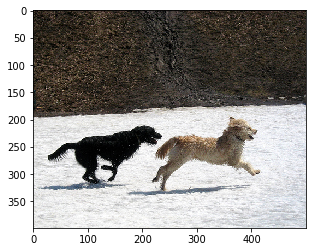

In [12]:
img=cv2.imread(img_dir+ "/" +train_image_names.img_id[0])
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Removing the #0 , #1 #2 , #3 , #4 from the <b>image ids</b></h3>

In [0]:
image_tokens["img_id"]=image_tokens["img_id"].map(lambda x: x[:len(x)-2])

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>image_tokens</b> again</h3>

In [14]:
image_tokens.head(5)

,img_id,img_caption
0,1000268201_693b08cb0e.jpg,গোলাপী পোশাকে একটি শিশু প্রবেশের পথে সিঁড়ির এ...
1,1000268201_693b08cb0e.jpg,একটি মেয়ে কাঠের ভবনে .ুকছে।
2,1000268201_693b08cb0e.jpg,একটি ছোট্ট মেয়ে কাঠের প্লে হাউসে উঠছে।
3,1000268201_693b08cb0e.jpg,একটি ছোট্ট মেয়ে সিঁড়ি বেয়ে তার প্লে হাউসে উ...
4,1000268201_693b08cb0e.jpg,গোলাপী পোশাকের একটি ছোট্ট মেয়ে কাঠের কেবিনে ....


In [0]:
image_tokens["img_caption"]=image_tokens["img_caption"].map(lambda x: str(x))

In [0]:
image_tokens["img_caption"]=image_tokens["img_caption"].map(lambda x: "<start> " + x.strip() + " <end>")

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Visualizing the <b>image_tokens</b> again with <b>`<start>`</b> and <b>`<end>`</b> </h3>

In [17]:
image_tokens.head()

,img_id,img_caption
0,1000268201_693b08cb0e.jpg,<start> গোলাপী পোশাকে একটি শিশু প্রবেশের পথে স...
1,1000268201_693b08cb0e.jpg,<start> একটি মেয়ে কাঠের ভবনে .ুকছে। <end>
2,1000268201_693b08cb0e.jpg,<start> একটি ছোট্ট মেয়ে কাঠের প্লে হাউসে উঠছে...
3,1000268201_693b08cb0e.jpg,<start> একটি ছোট্ট মেয়ে সিঁড়ি বেয়ে তার প্লে...
4,1000268201_693b08cb0e.jpg,<start> গোলাপী পোশাকের একটি ছোট্ট মেয়ে কাঠের ...


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating **train dictionary** having key as the image id and value as a list of its captions</h3>

In [18]:
train_captions={}
for i in tqdm(range(len(train_image_names))):
  l=[caption for caption in(image_tokens[image_tokens["img_id"]==train_image_names["img_id"].iloc[i]].img_caption)]
  train_captions[train_image_names["img_id"].iloc[i]]=l

100%|██████████| 6000/6000 [00:19<00:00, 310.23it/s]


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating **test dictionary** having key as the image id and value as a list of its captions</h3>

In [19]:
test_captions={}
for i in tqdm(range(len(test_image_names))):
  l=[caption for caption in(image_tokens[image_tokens["img_id"]==test_image_names["img_id"].iloc[i]].img_caption)]
  test_captions[test_image_names["img_id"].iloc[i]]=l

100%|██████████| 1000/1000 [00:03<00:00, 305.24it/s]


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating **validation dictionary** having key as the image id and value as a list of its captions</h3>

In [20]:
validation_captions={}
for i in tqdm(range(len(val_image_names))):
  l=[caption for caption in(image_tokens[image_tokens["img_id"]==val_image_names["img_id"].iloc[i]].img_caption)]
  validation_captions[val_image_names["img_id"].iloc[i]]=l

100%|██████████| 1000/1000 [00:03<00:00, 316.27it/s]


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing the **ResNet50** model and printing the <b>summary</b></h3>

In [21]:
model=ResNet50(include_top=False, weights='imagenet',pooling='avg',input_shape=(224,224,3))
model.summary()













Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
_______________________________________________________________________________

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining the path to save the <b>pickle file</b></h3>

In [0]:
pickle_path = "/content/drive/My Drive/Automatic Image Captioning - 350 (2016331001,2016331011)/Flickr8k/"

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Extracting image encodings(features) from **ResNet50** and forming dict **train_features** and encoding as a <b>pkl</b> &nbsp;&nbsp;file</h3>

In [23]:
path=img_dir+"/"
train_features={}
c=0
for image_name in tqdm(train_captions):
  img_path=path+image_name
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  train_features[image_name]=features.squeeze()

100%|██████████| 6000/6000 [56:37<00:00,  1.90it/s]


In [24]:
print("After Extracting Features length of train_features : ")
print(len(train_features))

After Extracting Features length of train_features : 
6000


In [0]:
with open( pickle_path+"encoded_train_images_machine_translated.pkl", "wb" ) as pickle_f:
    pickle.dump(train_features, pickle_f )

In [0]:
train_features = {}
pickle_in = open(pickle_path + "encoded_train_images_machine_translated.pkl","rb")
train_features = pickle.load(pickle_in)

In [24]:
print("After Extracting from pkl file length of train_features : ")
print(len(train_features))

After Extracting from pkl file length of train_features : 
6000


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Extracting image encodings(features) from **ResNet50** and forming dict <b>test_features</b> and encoding as a <b>pkl</b> &nbsp;&nbsp;file</h3>

In [0]:
path=img_dir+"/"
test_features={}
c=0
for image_name in tqdm(test_captions):
  img_path=path+image_name
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  test_features[image_name]=features.squeeze()

 79%|███████▉  | 788/1000 [07:51<02:12,  1.60it/s]

In [0]:
with open( pickle_path+"encoded_test_images_machine_translated.pkl", "wb" ) as pickle_f1:
    pickle.dump(test_features, pickle_f1 )

In [0]:
test_features = {}
pickle_in = open(pickle_path + "encoded_test_images_machine_translated.pkl","rb")
test_features = pickle.load(pickle_in)

In [26]:
print("After Extracting from pkl file length of test_features : ")
print(len(test_features))

After Extracting from pkl file length of test_features : 
1000


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Extracting image encodings(features) from **ResNet50** and forming dict <b>validation_features</b> and encoding as a <b>&nbsp;&nbsp;pkl</b> file</h3>

In [0]:
path=img_dir+"/"
validation_features={}
c=0
for image_name in tqdm(validation_captions):
  img_path=path+image_name
  img=image.load_img(img_path,target_size=(224,224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)
  features = model.predict(x)
  validation_features[image_name]=features.squeeze()

In [0]:
with open( pickle_path+"encoded_validation_images_machine_translated.pkl", "wb" ) as pickle_f2:
    pickle.dump(validation_features, pickle_f2 )

In [0]:
validation_features = {}
pickle_in = open(pickle_path + "encoded_validation_images_machine_translated.pkl","rb")
validation_features = pickle.load(pickle_in)

In [28]:
print("After Extracting from pkl file length of validation_features : ")
print(len(validation_features))

After Extracting from pkl file length of validation_features : 
1000


In [29]:
print(train_captions)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [30]:
all_captions=[]
for img_id in tqdm(train_captions):
  for captions in train_captions[img_id]:
    all_captions.append(str(captions))

all_words=" ".join(all_captions)
print()
print(len(all_words))
unique_words=list(set(all_words.strip().split(" ")))
print(len(unique_words))

100%|██████████| 6000/6000 [00:00<00:00, 175887.61it/s]


2060241
14017


In [31]:
x = all_captions[14381]
print(x)

<start> মাঠের খেলাধুলা করছে একদল যুবক। <end>


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining **max_length** and **vocabulary size**</h3>

In [0]:
vocab_size=len(unique_words)+1
max_length=40

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Forming dictionaries containg mapping of **words to indices** and <b>indices to words</b></h3>

In [0]:
words_to_indices={val:index+1 for index, val in enumerate(unique_words)}
indices_to_words = { index+1:val for index, val in enumerate(unique_words)}
words_to_indices["Unk"]=0
indices_to_words[0]="Unk"

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Forming dictionary having <b>encoded captions</b></h3>

In [34]:
train_encoded_captions={}
for img_id in tqdm(train_captions):
  train_encoded_captions[img_id]=[]
  for i in range(5):
    print(img_id)
    train_encoded_captions[img_id].append([words_to_indices[s] for s in train_captions[img_id][i].split(" ")])

  0%|          | 0/6000 [00:00<?, ?it/s]

2513260012_03d33305cf.jpg
2513260012_03d33305cf.jpg
2513260012_03d33305cf.jpg
2513260012_03d33305cf.jpg
2513260012_03d33305cf.jpg
2903617548_d3e38d7f88.jpg
2903617548_d3e38d7f88.jpg
2903617548_d3e38d7f88.jpg
2903617548_d3e38d7f88.jpg
2903617548_d3e38d7f88.jpg
3338291921_fe7ae0c8f8.jpg
3338291921_fe7ae0c8f8.jpg
3338291921_fe7ae0c8f8.jpg
3338291921_fe7ae0c8f8.jpg
3338291921_fe7ae0c8f8.jpg
488416045_1c6d903fe0.jpg
488416045_1c6d903fe0.jpg
488416045_1c6d903fe0.jpg
488416045_1c6d903fe0.jpg
488416045_1c6d903fe0.jpg
2644326817_8f45080b87.jpg
2644326817_8f45080b87.jpg
2644326817_8f45080b87.jpg
2644326817_8f45080b87.jpg
2644326817_8f45080b87.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
218342358_1755a9cce1.jpg
2501968935_02f2cd8079.jpg
2501968935_02f2cd8079.jpg
2501968935_02f2cd8079.jpg
2501968935_02f2cd8079.jpg
2501968935_02f2cd8079.jpg
2699342860_5288e203ea.jpg
2699342860_5288e203ea.jpg
2699342860_5288e203ea.jpg
2699342860_5288e203ea.

  2%|▏         | 126/6000 [00:00<00:04, 1257.95it/s]


2638369467_8fc251595b.jpg
2638369467_8fc251595b.jpg
2638369467_8fc251595b.jpg
2638369467_8fc251595b.jpg
2926786902_815a99a154.jpg
2926786902_815a99a154.jpg
2926786902_815a99a154.jpg
2926786902_815a99a154.jpg
2926786902_815a99a154.jpg
2851304910_b5721199bc.jpg
2851304910_b5721199bc.jpg
2851304910_b5721199bc.jpg
2851304910_b5721199bc.jpg
2851304910_b5721199bc.jpg
3423802527_94bd2b23b0.jpg
3423802527_94bd2b23b0.jpg
3423802527_94bd2b23b0.jpg
3423802527_94bd2b23b0.jpg
3423802527_94bd2b23b0.jpg
3356369156_074750c6cc.jpg
3356369156_074750c6cc.jpg
3356369156_074750c6cc.jpg
3356369156_074750c6cc.jpg
3356369156_074750c6cc.jpg
2294598473_40637b5c04.jpg
2294598473_40637b5c04.jpg
2294598473_40637b5c04.jpg
2294598473_40637b5c04.jpg
2294598473_40637b5c04.jpg
1191338263_a4fa073154.jpg
1191338263_a4fa073154.jpg
1191338263_a4fa073154.jpg
1191338263_a4fa073154.jpg
1191338263_a4fa073154.jpg
2380765956_6313d8cae3.jpg
2380765956_6313d8cae3.jpg
2380765956_6313d8cae3.jpg
2380765956_6313d8cae3.jpg
2380765956_

  5%|▍         | 275/6000 [00:00<00:04, 1316.89it/s]

2876994989_a4ebbd8491.jpg
2876994989_a4ebbd8491.jpg
2876994989_a4ebbd8491.jpg
2876994989_a4ebbd8491.jpg
2876994989_a4ebbd8491.jpg
2339516180_12493e8ecf.jpg
2339516180_12493e8ecf.jpg
2339516180_12493e8ecf.jpg
2339516180_12493e8ecf.jpg
2339516180_12493e8ecf.jpg
3301438465_10121a2412.jpg
3301438465_10121a2412.jpg
3301438465_10121a2412.jpg
3301438465_10121a2412.jpg
3301438465_10121a2412.jpg
101669240_b2d3e7f17b.jpg
101669240_b2d3e7f17b.jpg
101669240_b2d3e7f17b.jpg
101669240_b2d3e7f17b.jpg
101669240_b2d3e7f17b.jpg
300500054_56653bf217.jpg
300500054_56653bf217.jpg
300500054_56653bf217.jpg
300500054_56653bf217.jpg
300500054_56653bf217.jpg
1956678973_223cb1b847.jpg
1956678973_223cb1b847.jpg
1956678973_223cb1b847.jpg
1956678973_223cb1b847.jpg
1956678973_223cb1b847.jpg
1213336750_2269b51397.jpg
1213336750_2269b51397.jpg
1213336750_2269b51397.jpg
1213336750_2269b51397.jpg
1213336750_2269b51397.jpg
478750151_e0adb5030a.jpg
478750151_e0adb5030a.jpg
478750151_e0adb5030a.jpg
478750151_e0adb5030a.jpg


  6%|▌         | 365/6000 [00:00<00:04, 1151.04it/s]


3368207495_1e2dbd6d3f.jpg
3368207495_1e2dbd6d3f.jpg
3725814794_30db172f67.jpg
3725814794_30db172f67.jpg
3725814794_30db172f67.jpg
3725814794_30db172f67.jpg
3725814794_30db172f67.jpg
746787916_ceb103069f.jpg
746787916_ceb103069f.jpg
746787916_ceb103069f.jpg
746787916_ceb103069f.jpg
746787916_ceb103069f.jpg
2584487952_f70e5aa9bf.jpg
2584487952_f70e5aa9bf.jpg
2584487952_f70e5aa9bf.jpg
2584487952_f70e5aa9bf.jpg
2584487952_f70e5aa9bf.jpg
3211453055_05cbfe37cd.jpg
3211453055_05cbfe37cd.jpg
3211453055_05cbfe37cd.jpg
3211453055_05cbfe37cd.jpg
3211453055_05cbfe37cd.jpg
1012212859_01547e3f17.jpg
1012212859_01547e3f17.jpg
1012212859_01547e3f17.jpg
1012212859_01547e3f17.jpg
1012212859_01547e3f17.jpg
3406116788_c8f62e32d1.jpg
3406116788_c8f62e32d1.jpg
3406116788_c8f62e32d1.jpg
3406116788_c8f62e32d1.jpg
3406116788_c8f62e32d1.jpg
3583704941_611353857e.jpg
3583704941_611353857e.jpg
3583704941_611353857e.jpg
3583704941_611353857e.jpg
3583704941_611353857e.jpg
3259229498_2b5708c0c6.jpg
3259229498_2b570

  8%|▊         | 475/6000 [00:00<00:05, 1101.79it/s]

3404870997_7b0cd755de.jpg
3404870997_7b0cd755de.jpg
2565350330_c7f305e7f7.jpg
2565350330_c7f305e7f7.jpg
2565350330_c7f305e7f7.jpg
2565350330_c7f305e7f7.jpg
2565350330_c7f305e7f7.jpg
2587017287_888c811b5a.jpg
2587017287_888c811b5a.jpg
2587017287_888c811b5a.jpg
2587017287_888c811b5a.jpg
2587017287_888c811b5a.jpg
3262760716_1e9734f5ba.jpg
3262760716_1e9734f5ba.jpg
3262760716_1e9734f5ba.jpg
3262760716_1e9734f5ba.jpg
3262760716_1e9734f5ba.jpg
487071033_27e460a1b9.jpg
487071033_27e460a1b9.jpg
487071033_27e460a1b9.jpg
487071033_27e460a1b9.jpg
487071033_27e460a1b9.jpg
3566111626_9a35a7b2c0.jpg
3566111626_9a35a7b2c0.jpg
3566111626_9a35a7b2c0.jpg
3566111626_9a35a7b2c0.jpg
3566111626_9a35a7b2c0.jpg
2310108346_e82d209ccd.jpg
2310108346_e82d209ccd.jpg
2310108346_e82d209ccd.jpg
2310108346_e82d209ccd.jpg
2310108346_e82d209ccd.jpg
3172369593_eb4d787ffb.jpg
3172369593_eb4d787ffb.jpg
3172369593_eb4d787ffb.jpg
3172369593_eb4d787ffb.jpg
3172369593_eb4d787ffb.jpg
2384401298_e389c01abc.jpg
2384401298_e389c0

 10%|▉         | 598/6000 [00:00<00:04, 1132.26it/s]


3765374230_cb1bbee0cb.jpg
3765374230_cb1bbee0cb.jpg
3584603849_6cfd9af7dd.jpg
3584603849_6cfd9af7dd.jpg
3584603849_6cfd9af7dd.jpg
3584603849_6cfd9af7dd.jpg
3584603849_6cfd9af7dd.jpg
2987576188_f82304f394.jpg
2987576188_f82304f394.jpg
2987576188_f82304f394.jpg
2987576188_f82304f394.jpg
2987576188_f82304f394.jpg
2039457436_fc30f5e1ce.jpg
2039457436_fc30f5e1ce.jpg
2039457436_fc30f5e1ce.jpg
2039457436_fc30f5e1ce.jpg
2039457436_fc30f5e1ce.jpg
2040941056_7f5fd50794.jpg
2040941056_7f5fd50794.jpg
2040941056_7f5fd50794.jpg
2040941056_7f5fd50794.jpg
2040941056_7f5fd50794.jpg
2126950128_74a4882658.jpg
2126950128_74a4882658.jpg
2126950128_74a4882658.jpg
2126950128_74a4882658.jpg
2126950128_74a4882658.jpg
3579842996_3a62ec1bc7.jpg
3579842996_3a62ec1bc7.jpg
3579842996_3a62ec1bc7.jpg
3579842996_3a62ec1bc7.jpg
3579842996_3a62ec1bc7.jpg
3240090389_97a8c5d386.jpg
3240090389_97a8c5d386.jpg
3240090389_97a8c5d386.jpg
3240090389_97a8c5d386.jpg
3240090389_97a8c5d386.jpg
291952021_f111b0fb3d.jpg
291952021_f1

 12%|█▏        | 693/6000 [00:00<00:05, 940.50it/s] 

641893280_36fd6e886a.jpg
641893280_36fd6e886a.jpg
641893280_36fd6e886a.jpg
3346614841_698f9aa486.jpg
3346614841_698f9aa486.jpg
3346614841_698f9aa486.jpg
3346614841_698f9aa486.jpg
3346614841_698f9aa486.jpg
2766765386_4c0beb939d.jpg
2766765386_4c0beb939d.jpg
2766765386_4c0beb939d.jpg
2766765386_4c0beb939d.jpg
2766765386_4c0beb939d.jpg
1676601498_7d59327523.jpg
1676601498_7d59327523.jpg
1676601498_7d59327523.jpg
1676601498_7d59327523.jpg
1676601498_7d59327523.jpg
3547647914_4dd56a8c1b.jpg
3547647914_4dd56a8c1b.jpg
3547647914_4dd56a8c1b.jpg
3547647914_4dd56a8c1b.jpg
3547647914_4dd56a8c1b.jpg
2533076864_d799996433.jpg
2533076864_d799996433.jpg
2533076864_d799996433.jpg
2533076864_d799996433.jpg
2533076864_d799996433.jpg
2245348304_08bc5642f1.jpg
2245348304_08bc5642f1.jpg
2245348304_08bc5642f1.jpg
2245348304_08bc5642f1.jpg
2245348304_08bc5642f1.jpg
3079917032_3cfacb2fd7.jpg
3079917032_3cfacb2fd7.jpg
3079917032_3cfacb2fd7.jpg
3079917032_3cfacb2fd7.jpg
3079917032_3cfacb2fd7.jpg
3476709230_6439

 13%|█▎        | 791/6000 [00:00<00:05, 915.37it/s]


1290894194_8a4ffdc7eb.jpg
374103966_2987706be1.jpg
374103966_2987706be1.jpg
374103966_2987706be1.jpg
374103966_2987706be1.jpg
374103966_2987706be1.jpg
150582765_bad8dec237.jpg
150582765_bad8dec237.jpg
150582765_bad8dec237.jpg
150582765_bad8dec237.jpg
150582765_bad8dec237.jpg
2686432878_0697dbc048.jpg
2686432878_0697dbc048.jpg
2686432878_0697dbc048.jpg
2686432878_0697dbc048.jpg
2686432878_0697dbc048.jpg
2685139184_4ff45e0f76.jpg
2685139184_4ff45e0f76.jpg
2685139184_4ff45e0f76.jpg
2685139184_4ff45e0f76.jpg
2685139184_4ff45e0f76.jpg
359173181_a75c950aeb.jpg
359173181_a75c950aeb.jpg
359173181_a75c950aeb.jpg
359173181_a75c950aeb.jpg
359173181_a75c950aeb.jpg
241109594_3cb90fe2a3.jpg
241109594_3cb90fe2a3.jpg
241109594_3cb90fe2a3.jpg
241109594_3cb90fe2a3.jpg
241109594_3cb90fe2a3.jpg
3673035152_da7ed916d9.jpg
3673035152_da7ed916d9.jpg
3673035152_da7ed916d9.jpg
3673035152_da7ed916d9.jpg
3673035152_da7ed916d9.jpg
3558796959_fc4450be56.jpg
3558796959_fc4450be56.jpg
3558796959_fc4450be56.jpg
35587

 15%|█▍        | 878/6000 [00:00<00:05, 880.72it/s]


3454988449_1de1ef4f20.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2127207912_9298824e66.jpg
2508249781_36e9282423.jpg
2508249781_36e9282423.jpg
2508249781_36e9282423.jpg
2508249781_36e9282423.jpg
2508249781_36e9282423.jpg
2443229844_277cded27d.jpg
2443229844_277cded27d.jpg
2443229844_277cded27d.jpg
2443229844_277cded27d.jpg
2443229844_277cded27d.jpg
895502702_5170ada2ee.jpg
895502702_5170ada2ee.jpg
895502702_5170ada2ee.jpg
895502702_5170ada2ee.jpg
895502702_5170ada2ee.jpg
345284642_77dded0907.jpg
345284642_77dded0907.jpg
345284642_77dded0907.jpg
345284642_77dded0907.jpg
345284642_77dded0907.jpg
3131632154_098f86f4cb.jpg
3131632154_098f86f4cb.jpg
3131632154_098f86f4cb.jpg
3131632154_098f86f4cb.jpg
3131632154_098f86f4cb.jpg
327997381_55f90dc834.jpg
327997381_55f90dc834.jpg
327997381_55f90dc834.jpg
327997381_55f90dc834.jpg
327997381_55f90dc834.jpg
2713897716_c8cd610360.jpg
2713897716_c8cd610360.jpg
2713897716_c8cd610360.jpg


 16%|█▋        | 987/6000 [00:00<00:05, 913.10it/s]


428483413_b9370baf72.jpg
428483413_b9370baf72.jpg
428483413_b9370baf72.jpg
428483413_b9370baf72.jpg
428483413_b9370baf72.jpg
2266901263_4324af1f03.jpg
2266901263_4324af1f03.jpg
2266901263_4324af1f03.jpg
2266901263_4324af1f03.jpg
2266901263_4324af1f03.jpg
3249738122_decde6c117.jpg
3249738122_decde6c117.jpg
3249738122_decde6c117.jpg
3249738122_decde6c117.jpg
3249738122_decde6c117.jpg
405961988_fcfe97f31e.jpg
405961988_fcfe97f31e.jpg
405961988_fcfe97f31e.jpg
405961988_fcfe97f31e.jpg
405961988_fcfe97f31e.jpg
3295671644_0e10891b6d.jpg
3295671644_0e10891b6d.jpg
3295671644_0e10891b6d.jpg
3295671644_0e10891b6d.jpg
3295671644_0e10891b6d.jpg
2856524322_1d04452a21.jpg
2856524322_1d04452a21.jpg
2856524322_1d04452a21.jpg
2856524322_1d04452a21.jpg
2856524322_1d04452a21.jpg
537628742_146f2c24f8.jpg
537628742_146f2c24f8.jpg
537628742_146f2c24f8.jpg
537628742_146f2c24f8.jpg
537628742_146f2c24f8.jpg
360723732_23199af4bf.jpg
360723732_23199af4bf.jpg
360723732_23199af4bf.jpg
360723732_23199af4bf.jpg
3607

 18%|█▊        | 1077/6000 [00:01<00:05, 860.26it/s]

1449625950_fc9a8d02d9.jpg
2836808985_b26e4ca09e.jpg
2836808985_b26e4ca09e.jpg
2836808985_b26e4ca09e.jpg
2836808985_b26e4ca09e.jpg
2836808985_b26e4ca09e.jpg
506412121_67ecc7ec05.jpg
506412121_67ecc7ec05.jpg
506412121_67ecc7ec05.jpg
506412121_67ecc7ec05.jpg
506412121_67ecc7ec05.jpg
944788251_a0bcd4b960.jpg
944788251_a0bcd4b960.jpg
944788251_a0bcd4b960.jpg
944788251_a0bcd4b960.jpg
944788251_a0bcd4b960.jpg
2714878018_1593c38d69.jpg
2714878018_1593c38d69.jpg
2714878018_1593c38d69.jpg
2714878018_1593c38d69.jpg
2714878018_1593c38d69.jpg
3050606344_af711c726c.jpg
3050606344_af711c726c.jpg
3050606344_af711c726c.jpg
3050606344_af711c726c.jpg
3050606344_af711c726c.jpg
2488795251_c108c77b13.jpg
2488795251_c108c77b13.jpg
2488795251_c108c77b13.jpg
2488795251_c108c77b13.jpg
2488795251_c108c77b13.jpg
2613920405_e91e6ebd7a.jpg
2613920405_e91e6ebd7a.jpg
2613920405_e91e6ebd7a.jpg
2613920405_e91e6ebd7a.jpg
2613920405_e91e6ebd7a.jpg
109823397_e35154645f.jpg
109823397_e35154645f.jpg
109823397_e35154645f.jpg

 19%|█▉        | 1163/6000 [00:01<00:06, 799.55it/s]

2390369143_6523253a73.jpg
2390369143_6523253a73.jpg
2390369143_6523253a73.jpg
2390369143_6523253a73.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
1015584366_dfcec3c85a.jpg
2455528149_6c3477fd33.jpg
2455528149_6c3477fd33.jpg
2455528149_6c3477fd33.jpg
2455528149_6c3477fd33.jpg
2455528149_6c3477fd33.jpg
2347921097_f2e35753c0.jpg
2347921097_f2e35753c0.jpg
2347921097_f2e35753c0.jpg
2347921097_f2e35753c0.jpg
2347921097_f2e35753c0.jpg
3171188674_717eee0183.jpg
3171188674_717eee0183.jpg
3171188674_717eee0183.jpg
3171188674_717eee0183.jpg
3171188674_717eee0183.jpg
2090386465_b6ebb7df2c.jpg
2090386465_b6ebb7df2c.jpg
2090386465_b6ebb7df2c.jpg
2090386465_b6ebb7df2c.jpg
2090386465_b6ebb7df2c.jpg
3364797223_1f0b2f98ed.jpg
3364797223_1f0b2f98ed.jpg
3364797223_1f0b2f98ed.jpg
3364797223_1f0b2f98ed.jpg
3364797223_1f0b2f98ed.jpg
3726170067_094cc1b7e5.jpg
3726170067_094cc1b7e5.jpg
3726170067_094cc1b7e5.jpg
3726170067_094cc1b7e5.jpg
3726170067_0

 21%|██        | 1248/6000 [00:01<00:05, 806.86it/s]


532999240_1409d073be.jpg
3597924257_d0da3c5fe6.jpg
3597924257_d0da3c5fe6.jpg
3597924257_d0da3c5fe6.jpg
3597924257_d0da3c5fe6.jpg
3597924257_d0da3c5fe6.jpg
2822891602_ff61df2ece.jpg
2822891602_ff61df2ece.jpg
2822891602_ff61df2ece.jpg
2822891602_ff61df2ece.jpg
2822891602_ff61df2ece.jpg
2875583266_4da13ae12d.jpg
2875583266_4da13ae12d.jpg
2875583266_4da13ae12d.jpg
2875583266_4da13ae12d.jpg
2875583266_4da13ae12d.jpg
3342487512_fd33971dea.jpg
3342487512_fd33971dea.jpg
3342487512_fd33971dea.jpg
3342487512_fd33971dea.jpg
3342487512_fd33971dea.jpg
566446626_9793890f95.jpg
566446626_9793890f95.jpg
566446626_9793890f95.jpg
566446626_9793890f95.jpg
566446626_9793890f95.jpg
2432038587_5e4148e277.jpg
2432038587_5e4148e277.jpg
2432038587_5e4148e277.jpg
2432038587_5e4148e277.jpg
2432038587_5e4148e277.jpg
3202255152_08973fa3d7.jpg
3202255152_08973fa3d7.jpg
3202255152_08973fa3d7.jpg
3202255152_08973fa3d7.jpg
3202255152_08973fa3d7.jpg
2774362575_7543b8bf19.jpg
2774362575_7543b8bf19.jpg
2774362575_7543b8

 22%|██▏       | 1329/6000 [00:01<00:06, 770.80it/s]


3027365101_3818be6e16.jpg
3027365101_3818be6e16.jpg
3027365101_3818be6e16.jpg
2247138288_7355861203.jpg
2247138288_7355861203.jpg
2247138288_7355861203.jpg
2247138288_7355861203.jpg
2247138288_7355861203.jpg
2205336881_d9ee4179d3.jpg
2205336881_d9ee4179d3.jpg
2205336881_d9ee4179d3.jpg
2205336881_d9ee4179d3.jpg
2205336881_d9ee4179d3.jpg
3640104986_5d8c9a9948.jpg
3640104986_5d8c9a9948.jpg
3640104986_5d8c9a9948.jpg
3640104986_5d8c9a9948.jpg
3640104986_5d8c9a9948.jpg
3493479159_609ebe1b35.jpg
3493479159_609ebe1b35.jpg
3493479159_609ebe1b35.jpg
3493479159_609ebe1b35.jpg
3493479159_609ebe1b35.jpg
3671262694_29fbeb9d95.jpg
3671262694_29fbeb9d95.jpg
3671262694_29fbeb9d95.jpg
3671262694_29fbeb9d95.jpg
3671262694_29fbeb9d95.jpg
2426215757_e008a91fcb.jpg
2426215757_e008a91fcb.jpg
2426215757_e008a91fcb.jpg
2426215757_e008a91fcb.jpg
2426215757_e008a91fcb.jpg
3638992163_a085cc0c24.jpg
3638992163_a085cc0c24.jpg
3638992163_a085cc0c24.jpg
3638992163_a085cc0c24.jpg
3638992163_a085cc0c24.jpg
2729147877_

 24%|██▍       | 1429/6000 [00:01<00:05, 815.42it/s]

1500853305_0150615ce9.jpg
1500853305_0150615ce9.jpg
1500853305_0150615ce9.jpg
1500853305_0150615ce9.jpg
3532761259_14026c1e96.jpg
3532761259_14026c1e96.jpg
3532761259_14026c1e96.jpg
3532761259_14026c1e96.jpg
3532761259_14026c1e96.jpg
3722507770_0d6cb7420e.jpg
3722507770_0d6cb7420e.jpg
3722507770_0d6cb7420e.jpg
3722507770_0d6cb7420e.jpg
3722507770_0d6cb7420e.jpg
3428038648_993a453f9e.jpg
3428038648_993a453f9e.jpg
3428038648_993a453f9e.jpg
3428038648_993a453f9e.jpg
3428038648_993a453f9e.jpg
494221578_027f51cdf4.jpg
494221578_027f51cdf4.jpg
494221578_027f51cdf4.jpg
494221578_027f51cdf4.jpg
494221578_027f51cdf4.jpg
3360876049_9047edeab9.jpg
3360876049_9047edeab9.jpg
3360876049_9047edeab9.jpg
3360876049_9047edeab9.jpg
3360876049_9047edeab9.jpg
3166578139_33500f7e8a.jpg
3166578139_33500f7e8a.jpg
3166578139_33500f7e8a.jpg
3166578139_33500f7e8a.jpg
3166578139_33500f7e8a.jpg
2056377805_e9a9b3bcf0.jpg
2056377805_e9a9b3bcf0.jpg
2056377805_e9a9b3bcf0.jpg
2056377805_e9a9b3bcf0.jpg
2056377805_e9a9b3

 26%|██▌       | 1538/6000 [00:01<00:05, 869.41it/s]


3264464625_c711cc40c6.jpg
3264464625_c711cc40c6.jpg
3264464625_c711cc40c6.jpg
3264464625_c711cc40c6.jpg
2929272606_2a5923b38e.jpg
2929272606_2a5923b38e.jpg
2929272606_2a5923b38e.jpg
2929272606_2a5923b38e.jpg
2929272606_2a5923b38e.jpg
539744890_85e63f5854.jpg
539744890_85e63f5854.jpg
539744890_85e63f5854.jpg
539744890_85e63f5854.jpg
539744890_85e63f5854.jpg
3459419203_cd7c68ce4d.jpg
3459419203_cd7c68ce4d.jpg
3459419203_cd7c68ce4d.jpg
3459419203_cd7c68ce4d.jpg
3459419203_cd7c68ce4d.jpg
518610439_b64ab21c02.jpg
518610439_b64ab21c02.jpg
518610439_b64ab21c02.jpg
518610439_b64ab21c02.jpg
518610439_b64ab21c02.jpg
2165459064_5b81ff23eb.jpg
2165459064_5b81ff23eb.jpg
2165459064_5b81ff23eb.jpg
2165459064_5b81ff23eb.jpg
2165459064_5b81ff23eb.jpg
2271667421_7b21fc23b8.jpg
2271667421_7b21fc23b8.jpg
2271667421_7b21fc23b8.jpg
2271667421_7b21fc23b8.jpg
2271667421_7b21fc23b8.jpg
241345596_91e0e2daf5.jpg
241345596_91e0e2daf5.jpg
241345596_91e0e2daf5.jpg
241345596_91e0e2daf5.jpg
241345596_91e0e2daf5.jpg


 28%|██▊       | 1653/6000 [00:01<00:04, 938.05it/s]


2676651833_3bb42bbb32.jpg
2676651833_3bb42bbb32.jpg
1398873613_7e3174dd6c.jpg
1398873613_7e3174dd6c.jpg
1398873613_7e3174dd6c.jpg
1398873613_7e3174dd6c.jpg
1398873613_7e3174dd6c.jpg
3109124656_626b596d5e.jpg
3109124656_626b596d5e.jpg
3109124656_626b596d5e.jpg
3109124656_626b596d5e.jpg
3109124656_626b596d5e.jpg
3476237185_9389c536a3.jpg
3476237185_9389c536a3.jpg
3476237185_9389c536a3.jpg
3476237185_9389c536a3.jpg
3476237185_9389c536a3.jpg
3259992722_4c5e895734.jpg
3259992722_4c5e895734.jpg
3259992722_4c5e895734.jpg
3259992722_4c5e895734.jpg
3259992722_4c5e895734.jpg
1396703063_e8c3687afe.jpg
1396703063_e8c3687afe.jpg
1396703063_e8c3687afe.jpg
1396703063_e8c3687afe.jpg
1396703063_e8c3687afe.jpg
2578395598_6982734d46.jpg
2578395598_6982734d46.jpg
2578395598_6982734d46.jpg
2578395598_6982734d46.jpg
2578395598_6982734d46.jpg
3288274849_07ff76ee93.jpg
3288274849_07ff76ee93.jpg
3288274849_07ff76ee93.jpg
3288274849_07ff76ee93.jpg
3288274849_07ff76ee93.jpg
2186367337_0ce9ce2104.jpg
2186367337_

 29%|██▉       | 1767/6000 [00:01<00:04, 989.33it/s]


2885111681_dc328ecfff.jpg
2885111681_dc328ecfff.jpg
2885111681_dc328ecfff.jpg
2885111681_dc328ecfff.jpg
2885111681_dc328ecfff.jpg
3132006797_04822b5866.jpg
3132006797_04822b5866.jpg
3132006797_04822b5866.jpg
3132006797_04822b5866.jpg
3132006797_04822b5866.jpg
684375286_09cc1aa778.jpg
684375286_09cc1aa778.jpg
684375286_09cc1aa778.jpg
684375286_09cc1aa778.jpg
684375286_09cc1aa778.jpg
2092419948_eea8001d0f.jpg
2092419948_eea8001d0f.jpg
2092419948_eea8001d0f.jpg
2092419948_eea8001d0f.jpg
2092419948_eea8001d0f.jpg
3561314880_ea9a7e245f.jpg
3561314880_ea9a7e245f.jpg
3561314880_ea9a7e245f.jpg
3561314880_ea9a7e245f.jpg
3561314880_ea9a7e245f.jpg
2690538407_7ca157be85.jpg
2690538407_7ca157be85.jpg
2690538407_7ca157be85.jpg
2690538407_7ca157be85.jpg
2690538407_7ca157be85.jpg
2584412512_6767593f24.jpg
2584412512_6767593f24.jpg
2584412512_6767593f24.jpg
2584412512_6767593f24.jpg
2584412512_6767593f24.jpg
2923497185_c64004ff2d.jpg
2923497185_c64004ff2d.jpg
2923497185_c64004ff2d.jpg
2923497185_c6400

 32%|███▏      | 1910/6000 [00:01<00:03, 1078.14it/s]


186348874_75b2cf1ec5.jpg
186348874_75b2cf1ec5.jpg
186348874_75b2cf1ec5.jpg
186348874_75b2cf1ec5.jpg
186348874_75b2cf1ec5.jpg
508958120_afe274f726.jpg
508958120_afe274f726.jpg
508958120_afe274f726.jpg
508958120_afe274f726.jpg
508958120_afe274f726.jpg
3301935788_2bb7bbc515.jpg
3301935788_2bb7bbc515.jpg
3301935788_2bb7bbc515.jpg
3301935788_2bb7bbc515.jpg
3301935788_2bb7bbc515.jpg
894928353_002a3d5f06.jpg
894928353_002a3d5f06.jpg
894928353_002a3d5f06.jpg
894928353_002a3d5f06.jpg
894928353_002a3d5f06.jpg
515335111_c4afd5b903.jpg
515335111_c4afd5b903.jpg
515335111_c4afd5b903.jpg
515335111_c4afd5b903.jpg
515335111_c4afd5b903.jpg
3501313414_ae865b6fdf.jpg
3501313414_ae865b6fdf.jpg
3501313414_ae865b6fdf.jpg
3501313414_ae865b6fdf.jpg
3501313414_ae865b6fdf.jpg
2716251485_d6113f4c8a.jpg
2716251485_d6113f4c8a.jpg
2716251485_d6113f4c8a.jpg
2716251485_d6113f4c8a.jpg
2716251485_d6113f4c8a.jpg
3621649810_cca783b777.jpg
3621649810_cca783b777.jpg
3621649810_cca783b777.jpg
3621649810_cca783b777.jpg
36216

 35%|███▍      | 2085/6000 [00:02<00:03, 1199.35it/s]


3374384485_751f719be4.jpg
3374384485_751f719be4.jpg
2067362863_59577f9d4d.jpg
2067362863_59577f9d4d.jpg
2067362863_59577f9d4d.jpg
2067362863_59577f9d4d.jpg
2067362863_59577f9d4d.jpg
3680031186_c3c6698f9d.jpg
3680031186_c3c6698f9d.jpg
3680031186_c3c6698f9d.jpg
3680031186_c3c6698f9d.jpg
3680031186_c3c6698f9d.jpg
1303550623_cb43ac044a.jpg
1303550623_cb43ac044a.jpg
1303550623_cb43ac044a.jpg
1303550623_cb43ac044a.jpg
1303550623_cb43ac044a.jpg
3196995975_3e38eabf01.jpg
3196995975_3e38eabf01.jpg
3196995975_3e38eabf01.jpg
3196995975_3e38eabf01.jpg
3196995975_3e38eabf01.jpg
1351764581_4d4fb1b40f.jpg
1351764581_4d4fb1b40f.jpg
1351764581_4d4fb1b40f.jpg
1351764581_4d4fb1b40f.jpg
1351764581_4d4fb1b40f.jpg
2054308369_f9c6ec7815.jpg
2054308369_f9c6ec7815.jpg
2054308369_f9c6ec7815.jpg
2054308369_f9c6ec7815.jpg
2054308369_f9c6ec7815.jpg
2102030040_2e8f4738f7.jpg
2102030040_2e8f4738f7.jpg
2102030040_2e8f4738f7.jpg
2102030040_2e8f4738f7.jpg
2102030040_2e8f4738f7.jpg
2837127816_24441e5f7c.jpg
2837127816_

 38%|███▊      | 2267/6000 [00:02<00:02, 1326.77it/s]


172097783_292c5413d8.jpg
172097783_292c5413d8.jpg
172097783_292c5413d8.jpg
1095980313_3c94799968.jpg
1095980313_3c94799968.jpg
1095980313_3c94799968.jpg
1095980313_3c94799968.jpg
1095980313_3c94799968.jpg
2460477085_088e25f857.jpg
2460477085_088e25f857.jpg
2460477085_088e25f857.jpg
2460477085_088e25f857.jpg
2460477085_088e25f857.jpg
2752331711_cb18abba5a.jpg
2752331711_cb18abba5a.jpg
2752331711_cb18abba5a.jpg
2752331711_cb18abba5a.jpg
2752331711_cb18abba5a.jpg
3558251719_3af5ae2d02.jpg
3558251719_3af5ae2d02.jpg
3558251719_3af5ae2d02.jpg
3558251719_3af5ae2d02.jpg
3558251719_3af5ae2d02.jpg
2649705487_4605e879e9.jpg
2649705487_4605e879e9.jpg
2649705487_4605e879e9.jpg
2649705487_4605e879e9.jpg
2649705487_4605e879e9.jpg
510510783_b2cf5d57bb.jpg
510510783_b2cf5d57bb.jpg
510510783_b2cf5d57bb.jpg
510510783_b2cf5d57bb.jpg
510510783_b2cf5d57bb.jpg
2378127945_8dc9da82d7.jpg
2378127945_8dc9da82d7.jpg
2378127945_8dc9da82d7.jpg
2378127945_8dc9da82d7.jpg
2378127945_8dc9da82d7.jpg
2447972568_1e9b2876

 41%|████      | 2432/6000 [00:02<00:02, 1362.41it/s]


3481884992_45770ec698.jpg
3481884992_45770ec698.jpg
3481884992_45770ec698.jpg
3481884992_45770ec698.jpg
2887103049_a867e74358.jpg
2887103049_a867e74358.jpg
2887103049_a867e74358.jpg
2887103049_a867e74358.jpg
2887103049_a867e74358.jpg
2774705720_1cb85812dc.jpg
2774705720_1cb85812dc.jpg
2774705720_1cb85812dc.jpg
2774705720_1cb85812dc.jpg
2774705720_1cb85812dc.jpg
3286620180_4b00e93e8e.jpg
3286620180_4b00e93e8e.jpg
3286620180_4b00e93e8e.jpg
3286620180_4b00e93e8e.jpg
3286620180_4b00e93e8e.jpg
3485816074_363cab4bff.jpg
3485816074_363cab4bff.jpg
3485816074_363cab4bff.jpg
3485816074_363cab4bff.jpg
3485816074_363cab4bff.jpg
689359034_4a64c24ca4.jpg
689359034_4a64c24ca4.jpg
689359034_4a64c24ca4.jpg
689359034_4a64c24ca4.jpg
689359034_4a64c24ca4.jpg
2470493181_2efbbf17bd.jpg
2470493181_2efbbf17bd.jpg
2470493181_2efbbf17bd.jpg
2470493181_2efbbf17bd.jpg
2470493181_2efbbf17bd.jpg
1479028910_3dab3448c8.jpg
1479028910_3dab3448c8.jpg
1479028910_3dab3448c8.jpg
1479028910_3dab3448c8.jpg
1479028910_3dab3

 43%|████▎     | 2599/6000 [00:02<00:02, 1419.34it/s]


3282634762_2650d0088a.jpg
3282634762_2650d0088a.jpg
3282634762_2650d0088a.jpg
2929405404_1dff5ab847.jpg
2929405404_1dff5ab847.jpg
2929405404_1dff5ab847.jpg
2929405404_1dff5ab847.jpg
2929405404_1dff5ab847.jpg
3110614694_fecc23ca65.jpg
3110614694_fecc23ca65.jpg
3110614694_fecc23ca65.jpg
3110614694_fecc23ca65.jpg
3110614694_fecc23ca65.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
185057637_e8ada37343.jpg
169490297_b6ff13632a.jpg
169490297_b6ff13632a.jpg
169490297_b6ff13632a.jpg
169490297_b6ff13632a.jpg
169490297_b6ff13632a.jpg
2399114095_c3196ff456.jpg
2399114095_c3196ff456.jpg
2399114095_c3196ff456.jpg
2399114095_c3196ff456.jpg
2399114095_c3196ff456.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
1067675215_7336a694d6.jpg
2957071266_1b40ec7d96.jpg
2957071266_1b40ec7d96.jpg
2957071266_1b40ec7d96.jpg
2957071266_1b40ec7d96.jpg
2957071266_1b40ec7d96.jpg
2384147448_c1869070d3

 46%|████▌     | 2751/6000 [00:02<00:02, 1444.85it/s]


3368819708_0bfa0808f8.jpg
1082252566_8c79beef93.jpg
1082252566_8c79beef93.jpg
1082252566_8c79beef93.jpg
1082252566_8c79beef93.jpg
1082252566_8c79beef93.jpg
195962284_e57178054a.jpg
195962284_e57178054a.jpg
195962284_e57178054a.jpg
195962284_e57178054a.jpg
195962284_e57178054a.jpg
3432586199_e50b0d6cb7.jpg
3432586199_e50b0d6cb7.jpg
3432586199_e50b0d6cb7.jpg
3432586199_e50b0d6cb7.jpg
3432586199_e50b0d6cb7.jpg
3632842482_482f29e712.jpg
3632842482_482f29e712.jpg
3632842482_482f29e712.jpg
3632842482_482f29e712.jpg
3632842482_482f29e712.jpg
3712008738_1e1fa728da.jpg
3712008738_1e1fa728da.jpg
3712008738_1e1fa728da.jpg
3712008738_1e1fa728da.jpg
3712008738_1e1fa728da.jpg
508432819_3d055f395d.jpg
508432819_3d055f395d.jpg
508432819_3d055f395d.jpg
508432819_3d055f395d.jpg
508432819_3d055f395d.jpg
393987665_91d28f0ed0.jpg
393987665_91d28f0ed0.jpg
393987665_91d28f0ed0.jpg
393987665_91d28f0ed0.jpg
393987665_91d28f0ed0.jpg
1928319708_ccf1f4ee72.jpg
1928319708_ccf1f4ee72.jpg
1928319708_ccf1f4ee72.jpg


 48%|████▊     | 2903/6000 [00:02<00:02, 1452.16it/s]


3171347658_f0d5469c56.jpg
3171347658_f0d5469c56.jpg
2438085746_588dce8724.jpg
2438085746_588dce8724.jpg
2438085746_588dce8724.jpg
2438085746_588dce8724.jpg
2438085746_588dce8724.jpg
3526150930_580908dab6.jpg
3526150930_580908dab6.jpg
3526150930_580908dab6.jpg
3526150930_580908dab6.jpg
3526150930_580908dab6.jpg
3476451861_5b9c9ce191.jpg
3476451861_5b9c9ce191.jpg
3476451861_5b9c9ce191.jpg
3476451861_5b9c9ce191.jpg
3476451861_5b9c9ce191.jpg
3351667846_ac43118ae5.jpg
3351667846_ac43118ae5.jpg
3351667846_ac43118ae5.jpg
3351667846_ac43118ae5.jpg
3351667846_ac43118ae5.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
2269021076_cefc9af989.jpg
255091930_aa2b5c0eb9.jpg
255091930_aa2b5c0eb9.jpg
255091930_aa2b5c0eb9.jpg
255091930_aa2b5c0eb9.jpg
255091930_aa2b5c0eb9.jpg
2825540754_5e0c13e6b8.jpg
2825540754_5e0c13e6b8.jpg
2825540754_5e0c13e6b8.jpg
2825540754_5e0c13e6b8.jpg
2825540754_5e0c13e6b8.jpg
2369248869_0266760c4a.jpg
2369248869_02667

 52%|█████▏    | 3094/6000 [00:02<00:01, 1559.30it/s]


1003163366_44323f5815.jpg
3626998066_3ae11ee278.jpg
3626998066_3ae11ee278.jpg
3626998066_3ae11ee278.jpg
3626998066_3ae11ee278.jpg
3626998066_3ae11ee278.jpg
742073622_1206be8f7f.jpg
742073622_1206be8f7f.jpg
742073622_1206be8f7f.jpg
742073622_1206be8f7f.jpg
742073622_1206be8f7f.jpg
2754898893_95239c1f19.jpg
2754898893_95239c1f19.jpg
2754898893_95239c1f19.jpg
2754898893_95239c1f19.jpg
2754898893_95239c1f19.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2255685792_f70474c6db.jpg
2624044128_641b38c0cf.jpg
2624044128_641b38c0cf.jpg
2624044128_641b38c0cf.jpg
2624044128_641b38c0cf.jpg
2624044128_641b38c0cf.jpg
3355827928_c96c0c3e88.jpg
3355827928_c96c0c3e88.jpg
3355827928_c96c0c3e88.jpg
3355827928_c96c0c3e88.jpg
3355827928_c96c0c3e88.jpg
808245064_8a7971fc5b.jpg
808245064_8a7971fc5b.jpg
808245064_8a7971fc5b.jpg
808245064_8a7971fc5b.jpg
808245064_8a7971fc5b.jpg
3177298173_78cea31d64.jpg
3177298173_78cea31d64.jpg
3177298173_78cea31d64

 54%|█████▍    | 3262/6000 [00:02<00:01, 1542.90it/s]


1198194316_543cc7b945.jpg
1198194316_543cc7b945.jpg
755326139_ee344ece7b.jpg
755326139_ee344ece7b.jpg
755326139_ee344ece7b.jpg
755326139_ee344ece7b.jpg
755326139_ee344ece7b.jpg
381239475_044cbffa2b.jpg
381239475_044cbffa2b.jpg
381239475_044cbffa2b.jpg
381239475_044cbffa2b.jpg
381239475_044cbffa2b.jpg
1389651420_8d95d8f6ed.jpg
1389651420_8d95d8f6ed.jpg
1389651420_8d95d8f6ed.jpg
1389651420_8d95d8f6ed.jpg
1389651420_8d95d8f6ed.jpg
375171241_0302ad8481.jpg
375171241_0302ad8481.jpg
375171241_0302ad8481.jpg
375171241_0302ad8481.jpg
375171241_0302ad8481.jpg
2662262499_3cdf49cedd.jpg
2662262499_3cdf49cedd.jpg
2662262499_3cdf49cedd.jpg
2662262499_3cdf49cedd.jpg
2662262499_3cdf49cedd.jpg
3376972502_35e3e119cd.jpg
3376972502_35e3e119cd.jpg
3376972502_35e3e119cd.jpg
3376972502_35e3e119cd.jpg
3376972502_35e3e119cd.jpg
2043427251_83b746da8e.jpg
2043427251_83b746da8e.jpg
2043427251_83b746da8e.jpg
2043427251_83b746da8e.jpg
2043427251_83b746da8e.jpg
3634785801_4b23184a06.jpg
3634785801_4b23184a06.jpg


 57%|█████▋    | 3446/6000 [00:02<00:01, 1616.70it/s]


3348384389_73b6647017.jpg
3348384389_73b6647017.jpg
3568065409_1c381aa854.jpg
3568065409_1c381aa854.jpg
3568065409_1c381aa854.jpg
3568065409_1c381aa854.jpg
3568065409_1c381aa854.jpg
1683444418_815f660379.jpg
1683444418_815f660379.jpg
1683444418_815f660379.jpg
1683444418_815f660379.jpg
1683444418_815f660379.jpg
2823200990_7b02b7cc36.jpg
2823200990_7b02b7cc36.jpg
2823200990_7b02b7cc36.jpg
2823200990_7b02b7cc36.jpg
2823200990_7b02b7cc36.jpg
3606355203_1260f43ec0.jpg
3606355203_1260f43ec0.jpg
3606355203_1260f43ec0.jpg
3606355203_1260f43ec0.jpg
3606355203_1260f43ec0.jpg
3293018193_e4e0c8db7c.jpg
3293018193_e4e0c8db7c.jpg
3293018193_e4e0c8db7c.jpg
3293018193_e4e0c8db7c.jpg
3293018193_e4e0c8db7c.jpg
3320680380_b0d38b3b4a.jpg
3320680380_b0d38b3b4a.jpg
3320680380_b0d38b3b4a.jpg
3320680380_b0d38b3b4a.jpg
3320680380_b0d38b3b4a.jpg
530661899_94655d7d0e.jpg
530661899_94655d7d0e.jpg
530661899_94655d7d0e.jpg
530661899_94655d7d0e.jpg
530661899_94655d7d0e.jpg
2268115375_69884e958d.jpg
2268115375_69884

 60%|██████    | 3611/6000 [00:03<00:01, 1528.53it/s]


2111360187_d2505437b7.jpg
3695517194_2a6b604cb2.jpg
3695517194_2a6b604cb2.jpg
3695517194_2a6b604cb2.jpg
3695517194_2a6b604cb2.jpg
3695517194_2a6b604cb2.jpg
2865376471_43c5e6b941.jpg
2865376471_43c5e6b941.jpg
2865376471_43c5e6b941.jpg
2865376471_43c5e6b941.jpg
2865376471_43c5e6b941.jpg
2102581664_5ea50f85c6.jpg
2102581664_5ea50f85c6.jpg
2102581664_5ea50f85c6.jpg
2102581664_5ea50f85c6.jpg
2102581664_5ea50f85c6.jpg
3487979741_5f244c0c4b.jpg
3487979741_5f244c0c4b.jpg
3487979741_5f244c0c4b.jpg
3487979741_5f244c0c4b.jpg
3487979741_5f244c0c4b.jpg
340667199_ecae5f6029.jpg
340667199_ecae5f6029.jpg
340667199_ecae5f6029.jpg
340667199_ecae5f6029.jpg
340667199_ecae5f6029.jpg
3322443827_a04a94bb91.jpg
3322443827_a04a94bb91.jpg
3322443827_a04a94bb91.jpg
3322443827_a04a94bb91.jpg
3322443827_a04a94bb91.jpg
3396043950_12783c5147.jpg
3396043950_12783c5147.jpg
3396043950_12783c5147.jpg
3396043950_12783c5147.jpg
3396043950_12783c5147.jpg
1425069590_570cc7c2d8.jpg
1425069590_570cc7c2d8.jpg
1425069590_570cc

 63%|██████▎   | 3768/6000 [00:03<00:01, 1539.32it/s]


1957371533_62bc720bac.jpg
1957371533_62bc720bac.jpg
1957371533_62bc720bac.jpg
1957371533_62bc720bac.jpg
1957371533_62bc720bac.jpg
890734502_a5ae67beac.jpg
890734502_a5ae67beac.jpg
890734502_a5ae67beac.jpg
890734502_a5ae67beac.jpg
890734502_a5ae67beac.jpg
3601569729_bf4bf82768.jpg
3601569729_bf4bf82768.jpg
3601569729_bf4bf82768.jpg
3601569729_bf4bf82768.jpg
3601569729_bf4bf82768.jpg
3596428453_8cfdec4869.jpg
3596428453_8cfdec4869.jpg
3596428453_8cfdec4869.jpg
3596428453_8cfdec4869.jpg
3596428453_8cfdec4869.jpg
2148013097_6a4f495bc5.jpg
2148013097_6a4f495bc5.jpg
2148013097_6a4f495bc5.jpg
2148013097_6a4f495bc5.jpg
2148013097_6a4f495bc5.jpg
2528547068_7d37479b9b.jpg
2528547068_7d37479b9b.jpg
2528547068_7d37479b9b.jpg
2528547068_7d37479b9b.jpg
2528547068_7d37479b9b.jpg
3325578605_afa7f662ec.jpg
3325578605_afa7f662ec.jpg
3325578605_afa7f662ec.jpg
3325578605_afa7f662ec.jpg
3325578605_afa7f662ec.jpg
952171414_2db16f846f.jpg
952171414_2db16f846f.jpg
952171414_2db16f846f.jpg
952171414_2db16f846

 65%|██████▌   | 3928/6000 [00:03<00:01, 1555.18it/s]

1452361926_6d8c535e32.jpg
1452361926_6d8c535e32.jpg
1452361926_6d8c535e32.jpg
1452361926_6d8c535e32.jpg
1452361926_6d8c535e32.jpg
2873837796_543e415e98.jpg
2873837796_543e415e98.jpg
2873837796_543e415e98.jpg
2873837796_543e415e98.jpg
2873837796_543e415e98.jpg
549520317_af3d5c32eb.jpg
549520317_af3d5c32eb.jpg
549520317_af3d5c32eb.jpg
549520317_af3d5c32eb.jpg
549520317_af3d5c32eb.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
1348957576_c4a78eb974.jpg
3565749152_7924d15b04.jpg
3565749152_7924d15b04.jpg
3565749152_7924d15b04.jpg
3565749152_7924d15b04.jpg
3565749152_7924d15b04.jpg
3608849440_e7d2bed29f.jpg
3608849440_e7d2bed29f.jpg
3608849440_e7d2bed29f.jpg
3608849440_e7d2bed29f.jpg
3608849440_e7d2bed29f.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
1770036088_08abe4f6e9.jpg
3036641436_d6594fc45f.jpg
3036641436_d6594fc45f.jpg
3036641436_d6594fc45f.jpg
3036641436_d6594f

 68%|██████▊   | 4086/6000 [00:03<00:01, 1471.37it/s]

3349308309_92cff519f3.jpg
3349308309_92cff519f3.jpg
3349308309_92cff519f3.jpg
3349308309_92cff519f3.jpg
3349308309_92cff519f3.jpg
530888330_a18343e38d.jpg
530888330_a18343e38d.jpg
530888330_a18343e38d.jpg
530888330_a18343e38d.jpg
530888330_a18343e38d.jpg
317641829_ab2607a6c0.jpg
317641829_ab2607a6c0.jpg
317641829_ab2607a6c0.jpg
317641829_ab2607a6c0.jpg
317641829_ab2607a6c0.jpg
328916930_e4d4be1730.jpg
328916930_e4d4be1730.jpg
328916930_e4d4be1730.jpg
328916930_e4d4be1730.jpg
328916930_e4d4be1730.jpg
3406409018_03de95181e.jpg
3406409018_03de95181e.jpg
3406409018_03de95181e.jpg
3406409018_03de95181e.jpg
3406409018_03de95181e.jpg
3219210794_4324df188b.jpg
3219210794_4324df188b.jpg
3219210794_4324df188b.jpg
3219210794_4324df188b.jpg
3219210794_4324df188b.jpg
3236677456_75821e3583.jpg
3236677456_75821e3583.jpg
3236677456_75821e3583.jpg
3236677456_75821e3583.jpg
3236677456_75821e3583.jpg
3553056438_4e611a7a2a.jpg
3553056438_4e611a7a2a.jpg
3553056438_4e611a7a2a.jpg
3553056438_4e611a7a2a.jpg
3

 71%|███████   | 4243/6000 [00:03<00:01, 1499.45it/s]


2278776373_fe499a93be.jpg
2278776373_fe499a93be.jpg
2278776373_fe499a93be.jpg
2244551043_21b8cca866.jpg
2244551043_21b8cca866.jpg
2244551043_21b8cca866.jpg
2244551043_21b8cca866.jpg
2244551043_21b8cca866.jpg
3646453252_5ebbbaa6cc.jpg
3646453252_5ebbbaa6cc.jpg
3646453252_5ebbbaa6cc.jpg
3646453252_5ebbbaa6cc.jpg
3646453252_5ebbbaa6cc.jpg
3473320907_3884a7203b.jpg
3473320907_3884a7203b.jpg
3473320907_3884a7203b.jpg
3473320907_3884a7203b.jpg
3473320907_3884a7203b.jpg
513269597_c38308feaf.jpg
513269597_c38308feaf.jpg
513269597_c38308feaf.jpg
513269597_c38308feaf.jpg
513269597_c38308feaf.jpg
399679638_d3036da331.jpg
399679638_d3036da331.jpg
399679638_d3036da331.jpg
399679638_d3036da331.jpg
399679638_d3036da331.jpg
2045023435_181854c013.jpg
2045023435_181854c013.jpg
2045023435_181854c013.jpg
2045023435_181854c013.jpg
2045023435_181854c013.jpg
2255342813_5b2ac6d633.jpg
2255342813_5b2ac6d633.jpg
2255342813_5b2ac6d633.jpg
2255342813_5b2ac6d633.jpg
2255342813_5b2ac6d633.jpg
508261758_78fb8ae067.

 73%|███████▎  | 4402/6000 [00:03<00:01, 1525.03it/s]


3230101918_7d81cb0fc8.jpg
3230101918_7d81cb0fc8.jpg
3230101918_7d81cb0fc8.jpg
3230101918_7d81cb0fc8.jpg
3176498130_52ab9460b2.jpg
3176498130_52ab9460b2.jpg
3176498130_52ab9460b2.jpg
3176498130_52ab9460b2.jpg
3176498130_52ab9460b2.jpg
3119903318_d032141839.jpg
3119903318_d032141839.jpg
3119903318_d032141839.jpg
3119903318_d032141839.jpg
3119903318_d032141839.jpg
241345323_f53eb5eec4.jpg
241345323_f53eb5eec4.jpg
241345323_f53eb5eec4.jpg
241345323_f53eb5eec4.jpg
241345323_f53eb5eec4.jpg
3297323827_f582356478.jpg
3297323827_f582356478.jpg
3297323827_f582356478.jpg
3297323827_f582356478.jpg
3297323827_f582356478.jpg
241346794_4319f8af67.jpg
241346794_4319f8af67.jpg
241346794_4319f8af67.jpg
241346794_4319f8af67.jpg
241346794_4319f8af67.jpg
2602679255_785b851b46.jpg
2602679255_785b851b46.jpg
2602679255_785b851b46.jpg
2602679255_785b851b46.jpg
2602679255_785b851b46.jpg
1884065356_c6c34b4568.jpg
1884065356_c6c34b4568.jpg
1884065356_c6c34b4568.jpg
1884065356_c6c34b4568.jpg
1884065356_c6c34b4568

 76%|███████▌  | 4556/6000 [00:03<00:00, 1476.53it/s]


3656151153_b4ed5d94c4.jpg
3656151153_b4ed5d94c4.jpg
3656151153_b4ed5d94c4.jpg
3656151153_b4ed5d94c4.jpg
2394003437_184a838aa9.jpg
2394003437_184a838aa9.jpg
2394003437_184a838aa9.jpg
2394003437_184a838aa9.jpg
2394003437_184a838aa9.jpg
957230475_48f4285ffe.jpg
957230475_48f4285ffe.jpg
957230475_48f4285ffe.jpg
957230475_48f4285ffe.jpg
957230475_48f4285ffe.jpg
3601803640_5f3cb05acf.jpg
3601803640_5f3cb05acf.jpg
3601803640_5f3cb05acf.jpg
3601803640_5f3cb05acf.jpg
3601803640_5f3cb05acf.jpg
2751567262_e089b33ed9.jpg
2751567262_e089b33ed9.jpg
2751567262_e089b33ed9.jpg
2751567262_e089b33ed9.jpg
2751567262_e089b33ed9.jpg
3620492762_7f6a9b4746.jpg
3620492762_7f6a9b4746.jpg
3620492762_7f6a9b4746.jpg
3620492762_7f6a9b4746.jpg
3620492762_7f6a9b4746.jpg
2255332561_3375897ff0.jpg
2255332561_3375897ff0.jpg
2255332561_3375897ff0.jpg
2255332561_3375897ff0.jpg
2255332561_3375897ff0.jpg
3222496967_45d468ee66.jpg
3222496967_45d468ee66.jpg
3222496967_45d468ee66.jpg
3222496967_45d468ee66.jpg
3222496967_45d46

 78%|███████▊  | 4705/6000 [00:03<00:00, 1471.16it/s]


44129946_9eeb385d77.jpg
44129946_9eeb385d77.jpg
44129946_9eeb385d77.jpg
44129946_9eeb385d77.jpg
3708266246_97a033fcc7.jpg
3708266246_97a033fcc7.jpg
3708266246_97a033fcc7.jpg
3708266246_97a033fcc7.jpg
3708266246_97a033fcc7.jpg
3542771548_fcb8fa0cba.jpg
3542771548_fcb8fa0cba.jpg
3542771548_fcb8fa0cba.jpg
3542771548_fcb8fa0cba.jpg
3542771548_fcb8fa0cba.jpg
2313230479_13f87c6bf3.jpg
2313230479_13f87c6bf3.jpg
2313230479_13f87c6bf3.jpg
2313230479_13f87c6bf3.jpg
2313230479_13f87c6bf3.jpg
2956562716_5aa3f6ef38.jpg
2956562716_5aa3f6ef38.jpg
2956562716_5aa3f6ef38.jpg
2956562716_5aa3f6ef38.jpg
2956562716_5aa3f6ef38.jpg
3210457502_c6030ce567.jpg
3210457502_c6030ce567.jpg
3210457502_c6030ce567.jpg
3210457502_c6030ce567.jpg
3210457502_c6030ce567.jpg
3173928684_4ea0ee5114.jpg
3173928684_4ea0ee5114.jpg
3173928684_4ea0ee5114.jpg
3173928684_4ea0ee5114.jpg
3173928684_4ea0ee5114.jpg
3151365121_e2a685a666.jpg
3151365121_e2a685a666.jpg
3151365121_e2a685a666.jpg
3151365121_e2a685a666.jpg
3151365121_e2a685a6

 81%|████████  | 4853/6000 [00:03<00:00, 1416.14it/s]


2294688426_96c8614f1d.jpg
2294688426_96c8614f1d.jpg
2294688426_96c8614f1d.jpg
2294688426_96c8614f1d.jpg
2294688426_96c8614f1d.jpg
2653552905_4301449235.jpg
2653552905_4301449235.jpg
2653552905_4301449235.jpg
2653552905_4301449235.jpg
2653552905_4301449235.jpg
2457052334_b5a1d99048.jpg
2457052334_b5a1d99048.jpg
2457052334_b5a1d99048.jpg
2457052334_b5a1d99048.jpg
2457052334_b5a1d99048.jpg
3580741947_cc64a83648.jpg
3580741947_cc64a83648.jpg
3580741947_cc64a83648.jpg
3580741947_cc64a83648.jpg
3580741947_cc64a83648.jpg
533713001_2d36e93509.jpg
533713001_2d36e93509.jpg
533713001_2d36e93509.jpg
533713001_2d36e93509.jpg
533713001_2d36e93509.jpg
2527303359_6c3dc3f282.jpg
2527303359_6c3dc3f282.jpg
2527303359_6c3dc3f282.jpg
2527303359_6c3dc3f282.jpg
2527303359_6c3dc3f282.jpg
2320125735_27fe729948.jpg
2320125735_27fe729948.jpg
2320125735_27fe729948.jpg
2320125735_27fe729948.jpg
2320125735_27fe729948.jpg
3333675897_0043f992d3.jpg
3333675897_0043f992d3.jpg
3333675897_0043f992d3.jpg
3333675897_0043f

 83%|████████▎ | 4996/6000 [00:03<00:00, 1398.18it/s]


3452341579_0147d2199b.jpg
3452341579_0147d2199b.jpg
3452341579_0147d2199b.jpg
497579819_f91b26f7d3.jpg
497579819_f91b26f7d3.jpg
497579819_f91b26f7d3.jpg
497579819_f91b26f7d3.jpg
497579819_f91b26f7d3.jpg
1424775129_ffea9c13ab.jpg
1424775129_ffea9c13ab.jpg
1424775129_ffea9c13ab.jpg
1424775129_ffea9c13ab.jpg
1424775129_ffea9c13ab.jpg
514222303_cb98584536.jpg
514222303_cb98584536.jpg
514222303_cb98584536.jpg
514222303_cb98584536.jpg
514222303_cb98584536.jpg
3463034205_e541313038.jpg
3463034205_e541313038.jpg
3463034205_e541313038.jpg
3463034205_e541313038.jpg
3463034205_e541313038.jpg
3511062827_cd87871c67.jpg
3511062827_cd87871c67.jpg
3511062827_cd87871c67.jpg
3511062827_cd87871c67.jpg
3511062827_cd87871c67.jpg
2947452329_08f2d2a467.jpg
2947452329_08f2d2a467.jpg
2947452329_08f2d2a467.jpg
2947452329_08f2d2a467.jpg
2947452329_08f2d2a467.jpg
2520255786_b70a3ec032.jpg
2520255786_b70a3ec032.jpg
2520255786_b70a3ec032.jpg
2520255786_b70a3ec032.jpg
2520255786_b70a3ec032.jpg
3337046794_296bd2c7e0

 86%|████████▌ | 5146/6000 [00:04<00:00, 1424.59it/s]


554526471_a31f8b74ef.jpg
554526471_a31f8b74ef.jpg
1801063894_60bce29e19.jpg
1801063894_60bce29e19.jpg
1801063894_60bce29e19.jpg
1801063894_60bce29e19.jpg
1801063894_60bce29e19.jpg
2745441424_5659f6acc8.jpg
2745441424_5659f6acc8.jpg
2745441424_5659f6acc8.jpg
2745441424_5659f6acc8.jpg
2745441424_5659f6acc8.jpg
2968216482_ede65b20a8.jpg
2968216482_ede65b20a8.jpg
2968216482_ede65b20a8.jpg
2968216482_ede65b20a8.jpg
2968216482_ede65b20a8.jpg
69710411_2cf537f61f.jpg
69710411_2cf537f61f.jpg
69710411_2cf537f61f.jpg
69710411_2cf537f61f.jpg
69710411_2cf537f61f.jpg
3582689770_e57ab56671.jpg
3582689770_e57ab56671.jpg
3582689770_e57ab56671.jpg
3582689770_e57ab56671.jpg
3582689770_e57ab56671.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2046222127_a6f300e202.jpg
2460799229_ce45a1d940.jpg
2460799229_ce45a1d940.jpg
2460799229_ce45a1d940.jpg
2460799229_ce45a1d940.jpg
2460799229_ce45a1d940.jpg
3416460533_d5819fbf69.jpg
3416460533_d5819fbf69.j

 89%|████████▉ | 5331/6000 [00:04<00:00, 1529.92it/s]


2542037086_58c833699c.jpg
2542037086_58c833699c.jpg
2542037086_58c833699c.jpg
2880874989_a33b632924.jpg
2880874989_a33b632924.jpg
2880874989_a33b632924.jpg
2880874989_a33b632924.jpg
2880874989_a33b632924.jpg
3599568766_9e96def0ef.jpg
3599568766_9e96def0ef.jpg
3599568766_9e96def0ef.jpg
3599568766_9e96def0ef.jpg
3599568766_9e96def0ef.jpg
2923891109_ea0cc932ed.jpg
2923891109_ea0cc932ed.jpg
2923891109_ea0cc932ed.jpg
2923891109_ea0cc932ed.jpg
2923891109_ea0cc932ed.jpg
2802337003_56e555cd30.jpg
2802337003_56e555cd30.jpg
2802337003_56e555cd30.jpg
2802337003_56e555cd30.jpg
2802337003_56e555cd30.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
2021602343_03023e1fd1.jpg
3006094603_c5b32d2758.jpg
3006094603_c5b32d2758.jpg
3006094603_c5b32d2758.jpg
3006094603_c5b32d2758.jpg
3006094603_c5b32d2758.jpg
548751378_c657401312.jpg
548751378_c657401312.jpg
548751378_c657401312.jpg
548751378_c657401312.jpg
548751378_c657401312.jpg
3139837262_fe5ee

 91%|█████████▏| 5487/6000 [00:04<00:00, 1506.53it/s]


2709648336_15455e60b2.jpg
262439544_e71cd26b24.jpg
262439544_e71cd26b24.jpg
262439544_e71cd26b24.jpg
262439544_e71cd26b24.jpg
262439544_e71cd26b24.jpg
3181322965_ce9da15271.jpg
3181322965_ce9da15271.jpg
3181322965_ce9da15271.jpg
3181322965_ce9da15271.jpg
3181322965_ce9da15271.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
143688205_630813a466.jpg
2216568822_84c295c3b0.jpg
2216568822_84c295c3b0.jpg
2216568822_84c295c3b0.jpg
2216568822_84c295c3b0.jpg
2216568822_84c295c3b0.jpg
531261613_f1a045cd75.jpg
531261613_f1a045cd75.jpg
531261613_f1a045cd75.jpg
531261613_f1a045cd75.jpg
531261613_f1a045cd75.jpg
1805990081_da9cefe3a5.jpg
1805990081_da9cefe3a5.jpg
1805990081_da9cefe3a5.jpg
1805990081_da9cefe3a5.jpg
1805990081_da9cefe3a5.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
2036407732_d5a0389bba.jpg
1271210445_7f7ecf3791.jpg
1271210445_7f7ecf3791.jpg
1271210445_7f7ecf3791.jpg


 94%|█████████▍| 5670/6000 [00:04<00:00, 1586.64it/s]

2224995194_518859d97d.jpg
2224995194_518859d97d.jpg
2224995194_518859d97d.jpg
2224995194_518859d97d.jpg
3678100844_e3a9802471.jpg
3678100844_e3a9802471.jpg
3678100844_e3a9802471.jpg
3678100844_e3a9802471.jpg
3678100844_e3a9802471.jpg
284279868_2ca98e3dcd.jpg
284279868_2ca98e3dcd.jpg
284279868_2ca98e3dcd.jpg
284279868_2ca98e3dcd.jpg
284279868_2ca98e3dcd.jpg
3422979565_e08cd77bfe.jpg
3422979565_e08cd77bfe.jpg
3422979565_e08cd77bfe.jpg
3422979565_e08cd77bfe.jpg
3422979565_e08cd77bfe.jpg
3609999845_faf5d2fe74.jpg
3609999845_faf5d2fe74.jpg
3609999845_faf5d2fe74.jpg
3609999845_faf5d2fe74.jpg
3609999845_faf5d2fe74.jpg
3187364311_4c2a87083b.jpg
3187364311_4c2a87083b.jpg
3187364311_4c2a87083b.jpg
3187364311_4c2a87083b.jpg
3187364311_4c2a87083b.jpg
3082474922_9c3533eaf6.jpg
3082474922_9c3533eaf6.jpg
3082474922_9c3533eaf6.jpg
3082474922_9c3533eaf6.jpg
3082474922_9c3533eaf6.jpg
873633312_a756d8b381.jpg
873633312_a756d8b381.jpg
873633312_a756d8b381.jpg
873633312_a756d8b381.jpg
873633312_a756d8b381.

 97%|█████████▋| 5832/6000 [00:04<00:00, 1549.51it/s]


356929855_6bbf33d933.jpg
356929855_6bbf33d933.jpg
3315323307_bd148a8964.jpg
3315323307_bd148a8964.jpg
3315323307_bd148a8964.jpg
3315323307_bd148a8964.jpg
3315323307_bd148a8964.jpg
3126724531_f483e1b92a.jpg
3126724531_f483e1b92a.jpg
3126724531_f483e1b92a.jpg
3126724531_f483e1b92a.jpg
3126724531_f483e1b92a.jpg
2538423833_d1f492d1fb.jpg
2538423833_d1f492d1fb.jpg
2538423833_d1f492d1fb.jpg
2538423833_d1f492d1fb.jpg
2538423833_d1f492d1fb.jpg
987907964_5a06a63609.jpg
987907964_5a06a63609.jpg
987907964_5a06a63609.jpg
987907964_5a06a63609.jpg
987907964_5a06a63609.jpg
241347823_6b25c3e58e.jpg
241347823_6b25c3e58e.jpg
241347823_6b25c3e58e.jpg
241347823_6b25c3e58e.jpg
241347823_6b25c3e58e.jpg
3469585782_e708496552.jpg
3469585782_e708496552.jpg
3469585782_e708496552.jpg
3469585782_e708496552.jpg
3469585782_e708496552.jpg
481732592_b50194cb89.jpg
481732592_b50194cb89.jpg
481732592_b50194cb89.jpg
481732592_b50194cb89.jpg
481732592_b50194cb89.jpg
1337792872_d01a390b33.jpg
1337792872_d01a390b33.jpg
13

100%|██████████| 6000/6000 [00:04<00:00, 1300.10it/s]


2192026581_b782d1355a.jpg
2070798293_6b9405e04d.jpg
2070798293_6b9405e04d.jpg
2070798293_6b9405e04d.jpg
2070798293_6b9405e04d.jpg
2070798293_6b9405e04d.jpg
535529555_583d89b7f2.jpg
535529555_583d89b7f2.jpg
535529555_583d89b7f2.jpg
535529555_583d89b7f2.jpg
535529555_583d89b7f2.jpg
3415311628_c220a65762.jpg
3415311628_c220a65762.jpg
3415311628_c220a65762.jpg
3415311628_c220a65762.jpg
3415311628_c220a65762.jpg
3154293126_e52bd07524.jpg
3154293126_e52bd07524.jpg
3154293126_e52bd07524.jpg
3154293126_e52bd07524.jpg
3154293126_e52bd07524.jpg
181157221_e12410ef0b.jpg
181157221_e12410ef0b.jpg
181157221_e12410ef0b.jpg
181157221_e12410ef0b.jpg
181157221_e12410ef0b.jpg
2825668136_107223182c.jpg
2825668136_107223182c.jpg
2825668136_107223182c.jpg
2825668136_107223182c.jpg
2825668136_107223182c.jpg
3070274658_fc39fd4f84.jpg
3070274658_fc39fd4f84.jpg
3070274658_fc39fd4f84.jpg
3070274658_fc39fd4f84.jpg
3070274658_fc39fd4f84.jpg
3580082200_ea10bf2f68.jpg
3580082200_ea10bf2f68.jpg
3580082200_ea10bf2f68

In [35]:
for img_id in tqdm(train_encoded_captions):
  train_encoded_captions[img_id]=pad_sequences(train_encoded_captions[img_id], maxlen=max_length, padding='post')

100%|██████████| 6000/6000 [00:00<00:00, 24623.30it/s]


In [0]:
def data_generator(train_encoded_captions,train_features,num_of_photos):
  X1, X2, Y = list(), list(), list()
  max_length=40
  n=0
  for img_id in tqdm(train_encoded_captions):
    n+=1
    for i in range(2):
      for j in range(1,40):
        curr_sequence=train_encoded_captions[img_id][i][0:j].tolist()
        next_word=train_encoded_captions[img_id][i][j]
        curr_sequence=pad_sequences([curr_sequence], maxlen=max_length, padding='post')[0]
        one_hot_next_word=to_categorical([next_word],vocab_size)[0]
        X1.append(train_features[img_id])
        X2.append(curr_sequence)
        Y.append(one_hot_next_word)
    if(n==num_of_photos):
      yield [[array(X1), array(X2)], array(Y)]
      X1, X2, Y = list(), list(), list()
      n=0

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Importing **Libraries**</h3>

In [0]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers.recurrent import LSTM
from keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D 
from keras.layers.merge import add
from keras.layers.embeddings import Embedding

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining <b>Model</b> for generating captions</h3>

In [38]:
input_1=Input(shape=(2048,))
dropout_1=Dropout(0.2)(input_1)
dense_1=Dense(256,activation='relu')(dropout_1)

input_2=Input(shape=(max_length,))
embedding_1=Embedding(vocab_size,256)(input_2)
dropout_2=Dropout(0.2)(embedding_1)
#lstm_1=LSTM(256)(dropout_2)

#changes done to integrate 1D- Convolutional layer
conv_1D = Conv1D(filters=256, kernel_size=3, activation='relu')(dropout_2)
pool_1 = GlobalMaxPooling1D()(conv_1D)

add_1=add([dense_1,pool_1])
#add_2=add([add_1,pool_1])
dense_2=Dense(256,activation='relu')(add_1)
dense_3=Dense(vocab_size,activation='softmax')(dense_2)

model=Model(inputs=[input_1,input_2],outputs=dense_3)
model.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 40)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 40, 256)      3588608     input_3[0][0]                    
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 2048)         0                                            
__________________________________________________________________________________________________
dropout_2 (Dropout)             (None, 40, 256)      0           embedding_

In [39]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Fitting the model with <b>epoch 1</b></h3>

In [40]:
epochs=1
no_of_photos=5
steps=len(train_encoded_captions)//no_of_photos
for i in range(epochs):
  generator=data_generator(train_encoded_captions,train_features,no_of_photos)
  model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




  0%|          | 0/6000 [00:00<?, ?it/s]

Epoch 1/1


  1%|          | 55/6000 [00:00<01:24, 70.56it/s]

   1/1200 [..............................] - ETA: 1:00:06 - loss: 9.6263 - acc: 0.0000e+00

  1%|          | 62/6000 [00:03<10:55,  9.06it/s]

   2/1200 [..............................] - ETA: 40:08 - loss: 9.3288 - acc: 0.3462      

  1%|          | 67/6000 [00:04<13:37,  7.26it/s]

   3/1200 [..............................] - ETA: 33:24 - loss: 8.8982 - acc: 0.5000

  1%|          | 71/6000 [00:05<16:54,  5.85it/s]

   4/1200 [..............................] - ETA: 30:12 - loss: 8.4877 - acc: 0.5506

  1%|▏         | 75/6000 [00:06<19:24,  5.09it/s]

   5/1200 [..............................] - ETA: 28:11 - loss: 7.8332 - acc: 0.5795

  1%|▏         | 80/6000 [00:07<19:36,  5.03it/s]

   6/1200 [..............................] - ETA: 26:58 - loss: 7.1319 - acc: 0.5936

  1%|▏         | 85/6000 [00:08<19:53,  4.95it/s]

   7/1200 [..............................] - ETA: 25:59 - loss: 6.5589 - acc: 0.6092

  2%|▏         | 90/6000 [00:09<19:56,  4.94it/s]

   8/1200 [..............................] - ETA: 25:15 - loss: 6.2392 - acc: 0.6199

  2%|▏         | 95/6000 [00:10<20:01,  4.92it/s]

   9/1200 [..............................] - ETA: 24:40 - loss: 5.9288 - acc: 0.6328

  2%|▏         | 100/6000 [00:11<19:56,  4.93it/s]

  10/1200 [..............................] - ETA: 24:13 - loss: 5.7296 - acc: 0.6410

  2%|▏         | 105/6000 [00:12<20:00,  4.91it/s]

  11/1200 [..............................] - ETA: 23:50 - loss: 5.4735 - acc: 0.6515

  2%|▏         | 110/6000 [00:13<19:59,  4.91it/s]

  12/1200 [..............................] - ETA: 23:32 - loss: 5.3091 - acc: 0.6558

  2%|▏         | 115/6000 [00:14<20:04,  4.88it/s]

  13/1200 [..............................] - ETA: 23:13 - loss: 5.1262 - acc: 0.6639

  2%|▏         | 120/6000 [00:15<19:55,  4.92it/s]

  14/1200 [..............................] - ETA: 22:58 - loss: 5.0547 - acc: 0.6652

  2%|▏         | 125/6000 [00:16<19:48,  4.94it/s]

  15/1200 [..............................] - ETA: 22:45 - loss: 5.0063 - acc: 0.6643

  2%|▏         | 130/6000 [00:17<19:49,  4.93it/s]

  16/1200 [..............................] - ETA: 22:35 - loss: 4.8522 - acc: 0.6710

  2%|▏         | 135/6000 [00:18<19:57,  4.90it/s]

  17/1200 [..............................] - ETA: 22:25 - loss: 4.7218 - acc: 0.6781

  2%|▏         | 140/6000 [00:19<19:51,  4.92it/s]

  18/1200 [..............................] - ETA: 22:15 - loss: 4.6624 - acc: 0.6791

  2%|▏         | 145/6000 [00:20<19:48,  4.93it/s]

  19/1200 [..............................] - ETA: 22:08 - loss: 4.5906 - acc: 0.6807

  2%|▎         | 150/6000 [00:21<19:51,  4.91it/s]

  20/1200 [..............................] - ETA: 22:00 - loss: 4.5110 - acc: 0.6835

  3%|▎         | 155/6000 [00:22<19:47,  4.92it/s]

  21/1200 [..............................] - ETA: 21:54 - loss: 4.4311 - acc: 0.6874

  3%|▎         | 160/6000 [00:23<19:53,  4.89it/s]

  22/1200 [..............................] - ETA: 21:46 - loss: 4.3594 - acc: 0.6901

  3%|▎         | 165/6000 [00:24<19:40,  4.94it/s]

  23/1200 [..............................] - ETA: 21:40 - loss: 4.2935 - acc: 0.6923

  3%|▎         | 170/6000 [00:25<19:37,  4.95it/s]

  24/1200 [..............................] - ETA: 21:34 - loss: 4.2155 - acc: 0.6960

  3%|▎         | 175/6000 [00:26<19:36,  4.95it/s]

  25/1200 [..............................] - ETA: 21:29 - loss: 4.2030 - acc: 0.6946

  3%|▎         | 180/6000 [00:27<19:37,  4.94it/s]

  26/1200 [..............................] - ETA: 21:24 - loss: 4.1470 - acc: 0.6967

  3%|▎         | 185/6000 [00:28<19:40,  4.93it/s]

  27/1200 [..............................] - ETA: 21:20 - loss: 4.0923 - acc: 0.6988

  3%|▎         | 190/6000 [00:29<19:37,  4.93it/s]

  28/1200 [..............................] - ETA: 21:15 - loss: 4.0573 - acc: 0.6997

  3%|▎         | 195/6000 [00:30<19:38,  4.93it/s]

  29/1200 [..............................] - ETA: 21:11 - loss: 4.0220 - acc: 0.7002

  3%|▎         | 200/6000 [00:31<19:36,  4.93it/s]

  30/1200 [..............................] - ETA: 21:07 - loss: 3.9839 - acc: 0.7015

  3%|▎         | 205/6000 [00:32<19:32,  4.94it/s]

  31/1200 [..............................] - ETA: 21:05 - loss: 3.9406 - acc: 0.7031

  4%|▎         | 210/6000 [00:33<19:43,  4.89it/s]

  32/1200 [..............................] - ETA: 21:01 - loss: 3.9219 - acc: 0.7038

  4%|▎         | 215/6000 [00:34<19:36,  4.92it/s]

  33/1200 [..............................] - ETA: 20:56 - loss: 3.8967 - acc: 0.7048

  4%|▎         | 220/6000 [00:35<19:17,  4.99it/s]

  34/1200 [..............................] - ETA: 20:52 - loss: 3.8491 - acc: 0.7063

  4%|▍         | 225/6000 [00:36<19:22,  4.97it/s]

  35/1200 [..............................] - ETA: 20:49 - loss: 3.8225 - acc: 0.7064

  4%|▍         | 230/6000 [00:37<19:21,  4.97it/s]

  36/1200 [..............................] - ETA: 20:46 - loss: 3.7817 - acc: 0.7082

  4%|▍         | 235/6000 [00:38<19:17,  4.98it/s]

  37/1200 [..............................] - ETA: 20:42 - loss: 3.7480 - acc: 0.7095

  4%|▍         | 240/6000 [00:39<19:12,  5.00it/s]

  38/1200 [..............................] - ETA: 20:39 - loss: 3.7228 - acc: 0.7098

  4%|▍         | 245/6000 [00:40<19:13,  4.99it/s]

  39/1200 [..............................] - ETA: 20:36 - loss: 3.6754 - acc: 0.7125

  4%|▍         | 250/6000 [00:41<19:10,  5.00it/s]

  40/1200 [>.............................] - ETA: 20:33 - loss: 3.6424 - acc: 0.7139

  4%|▍         | 255/6000 [00:42<19:13,  4.98it/s]

  41/1200 [>.............................] - ETA: 20:32 - loss: 3.6031 - acc: 0.7154

  4%|▍         | 260/6000 [00:43<19:27,  4.92it/s]

  42/1200 [>.............................] - ETA: 20:30 - loss: 3.5655 - acc: 0.7172

  4%|▍         | 265/6000 [00:44<19:32,  4.89it/s]

  43/1200 [>.............................] - ETA: 20:28 - loss: 3.5346 - acc: 0.7187

  4%|▍         | 270/6000 [00:45<19:29,  4.90it/s]

  44/1200 [>.............................] - ETA: 20:25 - loss: 3.5045 - acc: 0.7200

  5%|▍         | 275/6000 [00:46<19:26,  4.91it/s]

  45/1200 [>.............................] - ETA: 20:23 - loss: 3.4780 - acc: 0.7210

  5%|▍         | 280/6000 [00:47<19:27,  4.90it/s]

  46/1200 [>.............................] - ETA: 20:21 - loss: 3.4595 - acc: 0.7215

  5%|▍         | 285/6000 [00:48<19:25,  4.91it/s]

  47/1200 [>.............................] - ETA: 20:19 - loss: 3.4414 - acc: 0.7209

  5%|▍         | 290/6000 [00:49<19:25,  4.90it/s]

  48/1200 [>.............................] - ETA: 20:17 - loss: 3.4076 - acc: 0.7224

  5%|▍         | 295/6000 [00:50<19:23,  4.90it/s]

  49/1200 [>.............................] - ETA: 20:15 - loss: 3.3874 - acc: 0.7224

  5%|▌         | 300/6000 [00:51<19:13,  4.94it/s]

  50/1200 [>.............................] - ETA: 20:13 - loss: 3.3665 - acc: 0.7226

  5%|▌         | 305/6000 [00:52<19:14,  4.93it/s]

  51/1200 [>.............................] - ETA: 20:11 - loss: 3.3481 - acc: 0.7223

  5%|▌         | 310/6000 [00:53<19:17,  4.92it/s]

  52/1200 [>.............................] - ETA: 20:10 - loss: 3.3261 - acc: 0.7228

  5%|▌         | 315/6000 [00:54<19:23,  4.89it/s]

  53/1200 [>.............................] - ETA: 20:08 - loss: 3.2947 - acc: 0.7246

  5%|▌         | 320/6000 [00:55<19:27,  4.87it/s]

  54/1200 [>.............................] - ETA: 20:06 - loss: 3.2704 - acc: 0.7253

  5%|▌         | 325/6000 [00:56<19:20,  4.89it/s]

  55/1200 [>.............................] - ETA: 20:04 - loss: 3.2473 - acc: 0.7259

  6%|▌         | 330/6000 [00:57<19:14,  4.91it/s]

  56/1200 [>.............................] - ETA: 20:02 - loss: 3.2307 - acc: 0.7255

  6%|▌         | 335/6000 [00:58<19:04,  4.95it/s]

  57/1200 [>.............................] - ETA: 20:00 - loss: 3.2053 - acc: 0.7265

  6%|▌         | 340/6000 [00:59<19:00,  4.96it/s]

  58/1200 [>.............................] - ETA: 19:58 - loss: 3.1838 - acc: 0.7268

  6%|▌         | 345/6000 [01:00<18:59,  4.96it/s]

  59/1200 [>.............................] - ETA: 19:56 - loss: 3.1672 - acc: 0.7268

  6%|▌         | 350/6000 [01:01<19:04,  4.94it/s]

  60/1200 [>.............................] - ETA: 19:55 - loss: 3.1488 - acc: 0.7268

  6%|▌         | 355/6000 [01:02<19:06,  4.92it/s]

  61/1200 [>.............................] - ETA: 19:53 - loss: 3.1290 - acc: 0.7270

  6%|▌         | 360/6000 [01:03<19:06,  4.92it/s]

  62/1200 [>.............................] - ETA: 19:52 - loss: 3.1077 - acc: 0.7275

  6%|▌         | 365/6000 [01:04<19:17,  4.87it/s]

  63/1200 [>.............................] - ETA: 19:51 - loss: 3.0849 - acc: 0.7283

  6%|▌         | 370/6000 [01:06<19:11,  4.89it/s]

  64/1200 [>.............................] - ETA: 19:49 - loss: 3.0615 - acc: 0.7292

  6%|▋         | 375/6000 [01:07<19:12,  4.88it/s]

  65/1200 [>.............................] - ETA: 19:48 - loss: 3.0416 - acc: 0.7297

  6%|▋         | 380/6000 [01:08<19:06,  4.90it/s]

  66/1200 [>.............................] - ETA: 19:46 - loss: 3.0244 - acc: 0.7297

  6%|▋         | 385/6000 [01:09<19:00,  4.92it/s]

  67/1200 [>.............................] - ETA: 19:44 - loss: 3.0073 - acc: 0.7297

  6%|▋         | 390/6000 [01:10<18:59,  4.92it/s]

  68/1200 [>.............................] - ETA: 19:42 - loss: 2.9927 - acc: 0.7295

  7%|▋         | 395/6000 [01:11<18:52,  4.95it/s]

  69/1200 [>.............................] - ETA: 19:41 - loss: 2.9804 - acc: 0.7288

  7%|▋         | 400/6000 [01:12<18:50,  4.95it/s]

  70/1200 [>.............................] - ETA: 19:39 - loss: 2.9577 - acc: 0.7297

  7%|▋         | 405/6000 [01:13<18:52,  4.94it/s]

  71/1200 [>.............................] - ETA: 19:38 - loss: 2.9396 - acc: 0.7298

  7%|▋         | 410/6000 [01:14<18:48,  4.95it/s]

  72/1200 [>.............................] - ETA: 19:37 - loss: 2.9230 - acc: 0.7302

  7%|▋         | 415/6000 [01:15<18:59,  4.90it/s]

  73/1200 [>.............................] - ETA: 19:35 - loss: 2.9055 - acc: 0.7306

  7%|▋         | 420/6000 [01:16<18:49,  4.94it/s]

  74/1200 [>.............................] - ETA: 19:33 - loss: 2.8886 - acc: 0.7309

  7%|▋         | 425/6000 [01:17<18:47,  4.94it/s]

  75/1200 [>.............................] - ETA: 19:32 - loss: 2.8734 - acc: 0.7315

  7%|▋         | 430/6000 [01:18<18:45,  4.95it/s]

  76/1200 [>.............................] - ETA: 19:30 - loss: 2.8587 - acc: 0.7317

  7%|▋         | 435/6000 [01:19<18:49,  4.93it/s]

  77/1200 [>.............................] - ETA: 19:29 - loss: 2.8406 - acc: 0.7323

  7%|▋         | 440/6000 [01:20<18:46,  4.94it/s]

  78/1200 [>.............................] - ETA: 19:27 - loss: 2.8214 - acc: 0.7334

  7%|▋         | 445/6000 [01:21<18:42,  4.95it/s]

  79/1200 [>.............................] - ETA: 19:26 - loss: 2.8040 - acc: 0.7344

  8%|▊         | 450/6000 [01:22<18:42,  4.94it/s]

  80/1200 [=>............................] - ETA: 19:24 - loss: 2.7973 - acc: 0.7339

  8%|▊         | 455/6000 [01:23<18:40,  4.95it/s]

  81/1200 [=>............................] - ETA: 19:22 - loss: 2.7803 - acc: 0.7349

  8%|▊         | 460/6000 [01:24<18:29,  4.99it/s]

  82/1200 [=>............................] - ETA: 19:21 - loss: 2.7675 - acc: 0.7352

  8%|▊         | 465/6000 [01:25<18:34,  4.97it/s]

  83/1200 [=>............................] - ETA: 19:20 - loss: 2.7586 - acc: 0.7353

  8%|▊         | 470/6000 [01:26<18:46,  4.91it/s]

  84/1200 [=>............................] - ETA: 19:19 - loss: 2.7479 - acc: 0.7354

  8%|▊         | 475/6000 [01:27<18:41,  4.92it/s]

  85/1200 [=>............................] - ETA: 19:17 - loss: 2.7359 - acc: 0.7357

  8%|▊         | 480/6000 [01:28<18:38,  4.94it/s]

  86/1200 [=>............................] - ETA: 19:16 - loss: 2.7256 - acc: 0.7359

  8%|▊         | 485/6000 [01:29<18:42,  4.91it/s]

  87/1200 [=>............................] - ETA: 19:15 - loss: 2.7124 - acc: 0.7363

  8%|▊         | 490/6000 [01:30<18:44,  4.90it/s]

  88/1200 [=>............................] - ETA: 19:14 - loss: 2.6989 - acc: 0.7371

  8%|▊         | 495/6000 [01:31<18:48,  4.88it/s]

  89/1200 [=>............................] - ETA: 19:13 - loss: 2.6857 - acc: 0.7377

  8%|▊         | 500/6000 [01:32<18:47,  4.88it/s]

  90/1200 [=>............................] - ETA: 19:11 - loss: 2.6763 - acc: 0.7381

  8%|▊         | 505/6000 [01:33<18:41,  4.90it/s]

  91/1200 [=>............................] - ETA: 19:10 - loss: 2.6687 - acc: 0.7384

  8%|▊         | 510/6000 [01:34<18:35,  4.92it/s]

  92/1200 [=>............................] - ETA: 19:09 - loss: 2.6560 - acc: 0.7390

  9%|▊         | 515/6000 [01:35<18:34,  4.92it/s]

  93/1200 [=>............................] - ETA: 19:08 - loss: 2.6439 - acc: 0.7394

  9%|▊         | 520/6000 [01:36<18:40,  4.89it/s]

  94/1200 [=>............................] - ETA: 19:06 - loss: 2.6357 - acc: 0.7392

  9%|▉         | 525/6000 [01:37<18:37,  4.90it/s]

  95/1200 [=>............................] - ETA: 19:05 - loss: 2.6241 - acc: 0.7399

  9%|▉         | 530/6000 [01:38<18:33,  4.91it/s]

  96/1200 [=>............................] - ETA: 19:04 - loss: 2.6137 - acc: 0.7405

  9%|▉         | 535/6000 [01:39<18:28,  4.93it/s]

  97/1200 [=>............................] - ETA: 19:02 - loss: 2.6024 - acc: 0.7411

  9%|▉         | 540/6000 [01:40<18:21,  4.96it/s]

  98/1200 [=>............................] - ETA: 19:01 - loss: 2.5932 - acc: 0.7414

  9%|▉         | 545/6000 [01:41<18:20,  4.96it/s]

  99/1200 [=>............................] - ETA: 18:59 - loss: 2.5843 - acc: 0.7418

  9%|▉         | 550/6000 [01:42<18:15,  4.97it/s]

 100/1200 [=>............................] - ETA: 18:58 - loss: 2.5752 - acc: 0.7421

  9%|▉         | 555/6000 [01:43<18:13,  4.98it/s]

 101/1200 [=>............................] - ETA: 18:57 - loss: 2.5695 - acc: 0.7420

  9%|▉         | 560/6000 [01:44<18:14,  4.97it/s]

 102/1200 [=>............................] - ETA: 18:55 - loss: 2.5586 - acc: 0.7428

  9%|▉         | 565/6000 [01:45<18:11,  4.98it/s]

 103/1200 [=>............................] - ETA: 18:54 - loss: 2.5557 - acc: 0.7425

 10%|▉         | 570/6000 [01:46<18:14,  4.96it/s]

 104/1200 [=>............................] - ETA: 18:53 - loss: 2.5455 - acc: 0.7430

 10%|▉         | 575/6000 [01:47<18:20,  4.93it/s]

 105/1200 [=>............................] - ETA: 18:52 - loss: 2.5359 - acc: 0.7436

 10%|▉         | 580/6000 [01:48<18:26,  4.90it/s]

 106/1200 [=>............................] - ETA: 18:51 - loss: 2.5285 - acc: 0.7438

 10%|▉         | 585/6000 [01:49<18:29,  4.88it/s]

 107/1200 [=>............................] - ETA: 18:50 - loss: 2.5181 - acc: 0.7444

 10%|▉         | 590/6000 [01:50<18:23,  4.90it/s]

 108/1200 [=>............................] - ETA: 18:48 - loss: 2.5100 - acc: 0.7449

 10%|▉         | 595/6000 [01:51<18:21,  4.91it/s]

 109/1200 [=>............................] - ETA: 18:47 - loss: 2.5033 - acc: 0.7453

 10%|█         | 600/6000 [01:52<18:21,  4.90it/s]

 110/1200 [=>............................] - ETA: 18:46 - loss: 2.4934 - acc: 0.7458

 10%|█         | 605/6000 [01:53<18:18,  4.91it/s]

 111/1200 [=>............................] - ETA: 18:45 - loss: 2.4831 - acc: 0.7465

 10%|█         | 610/6000 [01:54<18:20,  4.90it/s]

 112/1200 [=>............................] - ETA: 18:44 - loss: 2.4760 - acc: 0.7466

 10%|█         | 615/6000 [01:55<18:29,  4.86it/s]

 113/1200 [=>............................] - ETA: 18:43 - loss: 2.4670 - acc: 0.7470

 10%|█         | 620/6000 [01:56<18:25,  4.87it/s]

 114/1200 [=>............................] - ETA: 18:42 - loss: 2.4592 - acc: 0.7476

 10%|█         | 625/6000 [01:57<18:23,  4.87it/s]

 115/1200 [=>............................] - ETA: 18:40 - loss: 2.4497 - acc: 0.7482

 10%|█         | 630/6000 [01:58<18:13,  4.91it/s]

 116/1200 [=>............................] - ETA: 18:39 - loss: 2.4429 - acc: 0.7485

 11%|█         | 635/6000 [01:59<18:01,  4.96it/s]

 117/1200 [=>............................] - ETA: 18:37 - loss: 2.4379 - acc: 0.7485

 11%|█         | 640/6000 [02:00<17:49,  5.01it/s]

 118/1200 [=>............................] - ETA: 18:36 - loss: 2.4328 - acc: 0.7487

 11%|█         | 645/6000 [02:01<17:53,  4.99it/s]

 119/1200 [=>............................] - ETA: 18:35 - loss: 2.4225 - acc: 0.7494

 11%|█         | 650/6000 [02:02<18:00,  4.95it/s]

 120/1200 [==>...........................] - ETA: 18:34 - loss: 2.4159 - acc: 0.7496

 11%|█         | 655/6000 [02:03<18:02,  4.94it/s]

 121/1200 [==>...........................] - ETA: 18:33 - loss: 2.4107 - acc: 0.7496

 11%|█         | 660/6000 [02:04<18:00,  4.94it/s]

 122/1200 [==>...........................] - ETA: 18:31 - loss: 2.4011 - acc: 0.7504

 11%|█         | 665/6000 [02:05<17:57,  4.95it/s]

 123/1200 [==>...........................] - ETA: 18:30 - loss: 2.3974 - acc: 0.7504

 11%|█         | 670/6000 [02:06<17:56,  4.95it/s]

 124/1200 [==>...........................] - ETA: 18:29 - loss: 2.3889 - acc: 0.7509

 11%|█▏        | 675/6000 [02:07<18:11,  4.88it/s]

 125/1200 [==>...........................] - ETA: 18:28 - loss: 2.3862 - acc: 0.7508

 11%|█▏        | 680/6000 [02:08<18:01,  4.92it/s]

 126/1200 [==>...........................] - ETA: 18:27 - loss: 2.3794 - acc: 0.7510

 11%|█▏        | 685/6000 [02:09<17:57,  4.93it/s]

 127/1200 [==>...........................] - ETA: 18:26 - loss: 2.3717 - acc: 0.7515

 12%|█▏        | 690/6000 [02:10<17:59,  4.92it/s]

 128/1200 [==>...........................] - ETA: 18:25 - loss: 2.3639 - acc: 0.7520

 12%|█▏        | 695/6000 [02:11<17:59,  4.91it/s]

 129/1200 [==>...........................] - ETA: 18:23 - loss: 2.3603 - acc: 0.7519

 12%|█▏        | 700/6000 [02:12<17:59,  4.91it/s]

 130/1200 [==>...........................] - ETA: 18:22 - loss: 2.3543 - acc: 0.7522

 12%|█▏        | 705/6000 [02:13<17:56,  4.92it/s]

 131/1200 [==>...........................] - ETA: 18:21 - loss: 2.3523 - acc: 0.7519

 12%|█▏        | 710/6000 [02:14<17:54,  4.92it/s]

 132/1200 [==>...........................] - ETA: 18:20 - loss: 2.3459 - acc: 0.7521

 12%|█▏        | 715/6000 [02:15<17:45,  4.96it/s]

 133/1200 [==>...........................] - ETA: 18:19 - loss: 2.3412 - acc: 0.7522

 12%|█▏        | 720/6000 [02:17<17:48,  4.94it/s]

 134/1200 [==>...........................] - ETA: 18:17 - loss: 2.3368 - acc: 0.7525

 12%|█▏        | 725/6000 [02:17<17:41,  4.97it/s]

 135/1200 [==>...........................] - ETA: 18:16 - loss: 2.3315 - acc: 0.7527

 12%|█▏        | 730/6000 [02:18<17:37,  4.98it/s]

 136/1200 [==>...........................] - ETA: 18:15 - loss: 2.3277 - acc: 0.7528

 12%|█▏        | 735/6000 [02:19<17:35,  4.99it/s]

 137/1200 [==>...........................] - ETA: 18:14 - loss: 2.3235 - acc: 0.7530

 12%|█▏        | 740/6000 [02:21<17:40,  4.96it/s]

 138/1200 [==>...........................] - ETA: 18:12 - loss: 2.3211 - acc: 0.7529

 12%|█▏        | 745/6000 [02:22<17:37,  4.97it/s]

 139/1200 [==>...........................] - ETA: 18:11 - loss: 2.3160 - acc: 0.7531

 12%|█▎        | 750/6000 [02:23<17:35,  4.97it/s]

 140/1200 [==>...........................] - ETA: 18:10 - loss: 2.3093 - acc: 0.7535

 13%|█▎        | 755/6000 [02:24<17:30,  4.99it/s]

 141/1200 [==>...........................] - ETA: 18:09 - loss: 2.3041 - acc: 0.7538

 13%|█▎        | 760/6000 [02:25<17:27,  5.00it/s]

 142/1200 [==>...........................] - ETA: 18:08 - loss: 2.2988 - acc: 0.7542

 13%|█▎        | 765/6000 [02:26<17:35,  4.96it/s]

 143/1200 [==>...........................] - ETA: 18:06 - loss: 2.2949 - acc: 0.7542

 13%|█▎        | 770/6000 [02:27<17:35,  4.96it/s]

 144/1200 [==>...........................] - ETA: 18:05 - loss: 2.2919 - acc: 0.7542

 13%|█▎        | 775/6000 [02:28<17:36,  4.95it/s]

 145/1200 [==>...........................] - ETA: 18:05 - loss: 2.2891 - acc: 0.7544

 13%|█▎        | 780/6000 [02:29<17:49,  4.88it/s]

 146/1200 [==>...........................] - ETA: 18:03 - loss: 2.2855 - acc: 0.7544

 13%|█▎        | 785/6000 [02:30<17:37,  4.93it/s]

 147/1200 [==>...........................] - ETA: 18:02 - loss: 2.2809 - acc: 0.7547

 13%|█▎        | 790/6000 [02:31<17:33,  4.95it/s]

 148/1200 [==>...........................] - ETA: 18:01 - loss: 2.2752 - acc: 0.7550

 13%|█▎        | 795/6000 [02:32<17:32,  4.94it/s]

 149/1200 [==>...........................] - ETA: 18:00 - loss: 2.2727 - acc: 0.7551

 13%|█▎        | 800/6000 [02:33<17:29,  4.96it/s]

 150/1200 [==>...........................] - ETA: 17:58 - loss: 2.2680 - acc: 0.7554

 13%|█▎        | 805/6000 [02:34<17:27,  4.96it/s]

 151/1200 [==>...........................] - ETA: 17:57 - loss: 2.2632 - acc: 0.7556

 14%|█▎        | 810/6000 [02:35<17:24,  4.97it/s]

 152/1200 [==>...........................] - ETA: 17:56 - loss: 2.2583 - acc: 0.7558

 14%|█▎        | 815/6000 [02:36<17:11,  5.03it/s]

 153/1200 [==>...........................] - ETA: 17:55 - loss: 2.2552 - acc: 0.7559

 14%|█▎        | 820/6000 [02:37<17:10,  5.03it/s]

 154/1200 [==>...........................] - ETA: 17:53 - loss: 2.2502 - acc: 0.7561

 14%|█▍        | 825/6000 [02:38<17:16,  4.99it/s]

 155/1200 [==>...........................] - ETA: 17:52 - loss: 2.2450 - acc: 0.7564

 14%|█▍        | 830/6000 [02:39<17:17,  4.98it/s]

 156/1200 [==>...........................] - ETA: 17:51 - loss: 2.2398 - acc: 0.7566

 14%|█▍        | 835/6000 [02:40<17:26,  4.94it/s]

 157/1200 [==>...........................] - ETA: 17:50 - loss: 2.2386 - acc: 0.7565

 14%|█▍        | 840/6000 [02:41<17:25,  4.93it/s]

 158/1200 [==>...........................] - ETA: 17:49 - loss: 2.2358 - acc: 0.7564

 14%|█▍        | 845/6000 [02:42<17:20,  4.95it/s]

 159/1200 [==>...........................] - ETA: 17:48 - loss: 2.2327 - acc: 0.7564

 14%|█▍        | 850/6000 [02:43<17:23,  4.94it/s]

 160/1200 [===>..........................] - ETA: 17:47 - loss: 2.2288 - acc: 0.7565

 14%|█▍        | 855/6000 [02:44<17:18,  4.96it/s]

 161/1200 [===>..........................] - ETA: 17:46 - loss: 2.2238 - acc: 0.7568

 14%|█▍        | 860/6000 [02:45<17:16,  4.96it/s]

 162/1200 [===>..........................] - ETA: 17:45 - loss: 2.2220 - acc: 0.7567

 14%|█▍        | 865/6000 [02:46<17:19,  4.94it/s]

 163/1200 [===>..........................] - ETA: 17:43 - loss: 2.2203 - acc: 0.7566

 14%|█▍        | 870/6000 [02:47<17:17,  4.95it/s]

 164/1200 [===>..........................] - ETA: 17:42 - loss: 2.2156 - acc: 0.7568

 15%|█▍        | 875/6000 [02:48<17:21,  4.92it/s]

 165/1200 [===>..........................] - ETA: 17:41 - loss: 2.2113 - acc: 0.7570

 15%|█▍        | 880/6000 [02:49<17:25,  4.90it/s]

 166/1200 [===>..........................] - ETA: 17:40 - loss: 2.2074 - acc: 0.7572

 15%|█▍        | 885/6000 [02:50<17:26,  4.89it/s]

 167/1200 [===>..........................] - ETA: 17:39 - loss: 2.2036 - acc: 0.7574

 15%|█▍        | 890/6000 [02:51<17:19,  4.91it/s]

 168/1200 [===>..........................] - ETA: 17:38 - loss: 2.2008 - acc: 0.7574

 15%|█▍        | 895/6000 [02:52<17:24,  4.89it/s]

 169/1200 [===>..........................] - ETA: 17:37 - loss: 2.1949 - acc: 0.7579

 15%|█▌        | 900/6000 [02:53<17:19,  4.90it/s]

 170/1200 [===>..........................] - ETA: 17:36 - loss: 2.1918 - acc: 0.7579

 15%|█▌        | 905/6000 [02:54<17:20,  4.90it/s]

 171/1200 [===>..........................] - ETA: 17:35 - loss: 2.1893 - acc: 0.7580

 15%|█▌        | 910/6000 [02:55<17:17,  4.90it/s]

 172/1200 [===>..........................] - ETA: 17:34 - loss: 2.1850 - acc: 0.7583

 15%|█▌        | 915/6000 [02:56<17:20,  4.89it/s]

 173/1200 [===>..........................] - ETA: 17:33 - loss: 2.1816 - acc: 0.7585

 15%|█▌        | 920/6000 [02:57<17:18,  4.89it/s]

 174/1200 [===>..........................] - ETA: 17:32 - loss: 2.1785 - acc: 0.7586

 15%|█▌        | 925/6000 [02:58<17:11,  4.92it/s]

 175/1200 [===>..........................] - ETA: 17:31 - loss: 2.1730 - acc: 0.7590

 16%|█▌        | 930/6000 [02:59<17:05,  4.94it/s]

 176/1200 [===>..........................] - ETA: 17:29 - loss: 2.1681 - acc: 0.7592

 16%|█▌        | 935/6000 [03:00<17:00,  4.96it/s]

 177/1200 [===>..........................] - ETA: 17:28 - loss: 2.1639 - acc: 0.7596

 16%|█▌        | 940/6000 [03:01<17:00,  4.96it/s]

 178/1200 [===>..........................] - ETA: 17:27 - loss: 2.1599 - acc: 0.7599

 16%|█▌        | 945/6000 [03:02<17:01,  4.95it/s]

 179/1200 [===>..........................] - ETA: 17:26 - loss: 2.1571 - acc: 0.7599

 16%|█▌        | 950/6000 [03:03<17:00,  4.95it/s]

 180/1200 [===>..........................] - ETA: 17:25 - loss: 2.1516 - acc: 0.7604

 16%|█▌        | 955/6000 [03:04<17:05,  4.92it/s]

 181/1200 [===>..........................] - ETA: 17:24 - loss: 2.1481 - acc: 0.7605

 16%|█▌        | 960/6000 [03:05<17:04,  4.92it/s]

 182/1200 [===>..........................] - ETA: 17:23 - loss: 2.1438 - acc: 0.7608

 16%|█▌        | 965/6000 [03:06<17:01,  4.93it/s]

 183/1200 [===>..........................] - ETA: 17:22 - loss: 2.1433 - acc: 0.7606

 16%|█▌        | 970/6000 [03:07<17:06,  4.90it/s]

 184/1200 [===>..........................] - ETA: 17:21 - loss: 2.1382 - acc: 0.7611

 16%|█▋        | 975/6000 [03:08<17:04,  4.91it/s]

 185/1200 [===>..........................] - ETA: 17:20 - loss: 2.1360 - acc: 0.7612

 16%|█▋        | 980/6000 [03:09<17:00,  4.92it/s]

 186/1200 [===>..........................] - ETA: 17:19 - loss: 2.1336 - acc: 0.7612

 16%|█▋        | 985/6000 [03:10<17:10,  4.87it/s]

 187/1200 [===>..........................] - ETA: 17:18 - loss: 2.1320 - acc: 0.7613

 16%|█▋        | 990/6000 [03:11<17:05,  4.89it/s]

 188/1200 [===>..........................] - ETA: 17:17 - loss: 2.1270 - acc: 0.7616

 17%|█▋        | 995/6000 [03:12<16:59,  4.91it/s]

 189/1200 [===>..........................] - ETA: 17:16 - loss: 2.1237 - acc: 0.7619

 17%|█▋        | 1000/6000 [03:13<16:56,  4.92it/s]

 190/1200 [===>..........................] - ETA: 17:15 - loss: 2.1213 - acc: 0.7619

 17%|█▋        | 1005/6000 [03:14<16:56,  4.92it/s]

 191/1200 [===>..........................] - ETA: 17:13 - loss: 2.1197 - acc: 0.7619

 17%|█▋        | 1010/6000 [03:15<16:49,  4.95it/s]

 192/1200 [===>..........................] - ETA: 17:12 - loss: 2.1190 - acc: 0.7617

 17%|█▋        | 1015/6000 [03:16<16:40,  4.98it/s]

 193/1200 [===>..........................] - ETA: 17:11 - loss: 2.1149 - acc: 0.7620

 17%|█▋        | 1020/6000 [03:17<16:46,  4.95it/s]

 194/1200 [===>..........................] - ETA: 17:10 - loss: 2.1123 - acc: 0.7621

 17%|█▋        | 1025/6000 [03:18<16:49,  4.93it/s]

 195/1200 [===>..........................] - ETA: 17:09 - loss: 2.1093 - acc: 0.7623

 17%|█▋        | 1030/6000 [03:19<16:43,  4.95it/s]

 196/1200 [===>..........................] - ETA: 17:08 - loss: 2.1078 - acc: 0.7622

 17%|█▋        | 1035/6000 [03:20<16:44,  4.94it/s]

 197/1200 [===>..........................] - ETA: 17:07 - loss: 2.1067 - acc: 0.7621

 17%|█▋        | 1040/6000 [03:21<16:46,  4.93it/s]

 198/1200 [===>..........................] - ETA: 17:06 - loss: 2.1048 - acc: 0.7621

 17%|█▋        | 1045/6000 [03:22<16:46,  4.92it/s]

 199/1200 [===>..........................] - ETA: 17:05 - loss: 2.1015 - acc: 0.7623

 18%|█▊        | 1050/6000 [03:23<16:43,  4.93it/s]

 200/1200 [====>.........................] - ETA: 17:04 - loss: 2.0982 - acc: 0.7624

 18%|█▊        | 1055/6000 [03:24<16:44,  4.92it/s]

 201/1200 [====>.........................] - ETA: 17:03 - loss: 2.0975 - acc: 0.7624

 18%|█▊        | 1060/6000 [03:25<16:47,  4.90it/s]

 202/1200 [====>.........................] - ETA: 17:02 - loss: 2.0950 - acc: 0.7624

 18%|█▊        | 1065/6000 [03:26<16:41,  4.93it/s]

 203/1200 [====>.........................] - ETA: 17:00 - loss: 2.0916 - acc: 0.7626

 18%|█▊        | 1070/6000 [03:27<16:30,  4.98it/s]

 204/1200 [====>.........................] - ETA: 16:59 - loss: 2.0895 - acc: 0.7627

 18%|█▊        | 1075/6000 [03:28<16:33,  4.96it/s]

 205/1200 [====>.........................] - ETA: 16:58 - loss: 2.0860 - acc: 0.7630

 18%|█▊        | 1080/6000 [03:29<16:40,  4.92it/s]

 206/1200 [====>.........................] - ETA: 16:57 - loss: 2.0828 - acc: 0.7631

 18%|█▊        | 1085/6000 [03:30<16:36,  4.93it/s]

 207/1200 [====>.........................] - ETA: 16:56 - loss: 2.0804 - acc: 0.7632

 18%|█▊        | 1090/6000 [03:31<16:35,  4.93it/s]

 208/1200 [====>.........................] - ETA: 16:55 - loss: 2.0788 - acc: 0.7633

 18%|█▊        | 1095/6000 [03:32<16:29,  4.96it/s]

 209/1200 [====>.........................] - ETA: 16:54 - loss: 2.0748 - acc: 0.7636

 18%|█▊        | 1100/6000 [03:33<16:27,  4.96it/s]

 210/1200 [====>.........................] - ETA: 16:53 - loss: 2.0717 - acc: 0.7637

 18%|█▊        | 1105/6000 [03:34<16:15,  5.02it/s]

 211/1200 [====>.........................] - ETA: 16:51 - loss: 2.0692 - acc: 0.7638

 18%|█▊        | 1110/6000 [03:35<16:09,  5.04it/s]

 212/1200 [====>.........................] - ETA: 16:50 - loss: 2.0676 - acc: 0.7638

 19%|█▊        | 1115/6000 [03:36<16:13,  5.02it/s]

 213/1200 [====>.........................] - ETA: 16:49 - loss: 2.0655 - acc: 0.7639

 19%|█▊        | 1120/6000 [03:37<16:21,  4.97it/s]

 214/1200 [====>.........................] - ETA: 16:48 - loss: 2.0618 - acc: 0.7641

 19%|█▉        | 1125/6000 [03:38<16:20,  4.97it/s]

 215/1200 [====>.........................] - ETA: 16:47 - loss: 2.0585 - acc: 0.7643

 19%|█▉        | 1130/6000 [03:39<16:23,  4.95it/s]

 216/1200 [====>.........................] - ETA: 16:46 - loss: 2.0576 - acc: 0.7640

 19%|█▉        | 1135/6000 [03:40<16:17,  4.98it/s]

 217/1200 [====>.........................] - ETA: 16:45 - loss: 2.0541 - acc: 0.7643

 19%|█▉        | 1140/6000 [03:41<16:18,  4.97it/s]

 218/1200 [====>.........................] - ETA: 16:44 - loss: 2.0512 - acc: 0.7645

 19%|█▉        | 1145/6000 [03:42<16:27,  4.92it/s]

 219/1200 [====>.........................] - ETA: 16:43 - loss: 2.0472 - acc: 0.7649

 19%|█▉        | 1150/6000 [03:44<16:28,  4.91it/s]

 220/1200 [====>.........................] - ETA: 16:42 - loss: 2.0426 - acc: 0.7652

 19%|█▉        | 1155/6000 [03:45<16:29,  4.89it/s]

 221/1200 [====>.........................] - ETA: 16:41 - loss: 2.0413 - acc: 0.7653

 19%|█▉        | 1160/6000 [03:46<16:25,  4.91it/s]

 222/1200 [====>.........................] - ETA: 16:40 - loss: 2.0389 - acc: 0.7654

 19%|█▉        | 1165/6000 [03:47<16:29,  4.89it/s]

 223/1200 [====>.........................] - ETA: 16:39 - loss: 2.0381 - acc: 0.7654

 20%|█▉        | 1170/6000 [03:48<16:25,  4.90it/s]

 224/1200 [====>.........................] - ETA: 16:38 - loss: 2.0347 - acc: 0.7656

 20%|█▉        | 1175/6000 [03:49<16:25,  4.89it/s]

 225/1200 [====>.........................] - ETA: 16:37 - loss: 2.0321 - acc: 0.7658

 20%|█▉        | 1180/6000 [03:50<16:23,  4.90it/s]

 226/1200 [====>.........................] - ETA: 16:36 - loss: 2.0304 - acc: 0.7658

 20%|█▉        | 1185/6000 [03:51<16:22,  4.90it/s]

 227/1200 [====>.........................] - ETA: 16:35 - loss: 2.0298 - acc: 0.7658

 20%|█▉        | 1190/6000 [03:52<16:24,  4.89it/s]

 228/1200 [====>.........................] - ETA: 16:34 - loss: 2.0274 - acc: 0.7658

 20%|█▉        | 1195/6000 [03:53<16:25,  4.88it/s]

 229/1200 [====>.........................] - ETA: 16:33 - loss: 2.0253 - acc: 0.7659

 20%|██        | 1200/6000 [03:54<16:16,  4.92it/s]

 230/1200 [====>.........................] - ETA: 16:32 - loss: 2.0241 - acc: 0.7658

 20%|██        | 1205/6000 [03:55<16:18,  4.90it/s]

 231/1200 [====>.........................] - ETA: 16:31 - loss: 2.0227 - acc: 0.7659

 20%|██        | 1210/6000 [03:56<16:17,  4.90it/s]

 232/1200 [====>.........................] - ETA: 16:30 - loss: 2.0203 - acc: 0.7661

 20%|██        | 1215/6000 [03:57<16:19,  4.89it/s]

 233/1200 [====>.........................] - ETA: 16:29 - loss: 2.0199 - acc: 0.7659

 20%|██        | 1220/6000 [03:58<16:20,  4.88it/s]

 234/1200 [====>.........................] - ETA: 16:28 - loss: 2.0172 - acc: 0.7662

 20%|██        | 1225/6000 [03:59<16:14,  4.90it/s]

 235/1200 [====>.........................] - ETA: 16:26 - loss: 2.0158 - acc: 0.7662

 20%|██        | 1230/6000 [04:00<16:08,  4.92it/s]

 236/1200 [====>.........................] - ETA: 16:25 - loss: 2.0135 - acc: 0.7664

 21%|██        | 1235/6000 [04:01<16:08,  4.92it/s]

 237/1200 [====>.........................] - ETA: 16:24 - loss: 2.0128 - acc: 0.7663

 21%|██        | 1240/6000 [04:02<16:09,  4.91it/s]

 238/1200 [====>.........................] - ETA: 16:23 - loss: 2.0102 - acc: 0.7665

 21%|██        | 1245/6000 [04:03<16:14,  4.88it/s]

 239/1200 [====>.........................] - ETA: 16:22 - loss: 2.0088 - acc: 0.7665

 21%|██        | 1250/6000 [04:04<16:15,  4.87it/s]

 240/1200 [=====>........................] - ETA: 16:21 - loss: 2.0072 - acc: 0.7665

 21%|██        | 1255/6000 [04:05<16:13,  4.87it/s]

 241/1200 [=====>........................] - ETA: 16:20 - loss: 2.0072 - acc: 0.7663

 21%|██        | 1260/6000 [04:06<16:11,  4.88it/s]

 242/1200 [=====>........................] - ETA: 16:19 - loss: 2.0038 - acc: 0.7666

 21%|██        | 1265/6000 [04:07<16:10,  4.88it/s]

 243/1200 [=====>........................] - ETA: 16:18 - loss: 2.0017 - acc: 0.7667

 21%|██        | 1270/6000 [04:08<16:10,  4.87it/s]

 244/1200 [=====>........................] - ETA: 16:17 - loss: 2.0016 - acc: 0.7666

 21%|██▏       | 1275/6000 [04:09<16:06,  4.89it/s]

 245/1200 [=====>........................] - ETA: 16:16 - loss: 1.9993 - acc: 0.7667

 21%|██▏       | 1280/6000 [04:10<16:02,  4.90it/s]

 246/1200 [=====>........................] - ETA: 16:15 - loss: 1.9983 - acc: 0.7667

 21%|██▏       | 1285/6000 [04:11<16:04,  4.89it/s]

 247/1200 [=====>........................] - ETA: 16:14 - loss: 1.9960 - acc: 0.7669

 22%|██▏       | 1290/6000 [04:12<16:10,  4.86it/s]

 248/1200 [=====>........................] - ETA: 16:13 - loss: 1.9943 - acc: 0.7670

 22%|██▏       | 1295/6000 [04:13<16:14,  4.83it/s]

 249/1200 [=====>........................] - ETA: 16:12 - loss: 1.9928 - acc: 0.7670

 22%|██▏       | 1300/6000 [04:14<16:05,  4.87it/s]

 250/1200 [=====>........................] - ETA: 16:11 - loss: 1.9909 - acc: 0.7671

 22%|██▏       | 1305/6000 [04:15<15:57,  4.90it/s]

 251/1200 [=====>........................] - ETA: 16:10 - loss: 1.9880 - acc: 0.7673

 22%|██▏       | 1310/6000 [04:16<16:03,  4.87it/s]

 252/1200 [=====>........................] - ETA: 16:09 - loss: 1.9854 - acc: 0.7674

 22%|██▏       | 1315/6000 [04:17<15:56,  4.90it/s]

 253/1200 [=====>........................] - ETA: 16:08 - loss: 1.9831 - acc: 0.7675

 22%|██▏       | 1320/6000 [04:18<15:56,  4.89it/s]

 254/1200 [=====>........................] - ETA: 16:07 - loss: 1.9804 - acc: 0.7678

 22%|██▏       | 1325/6000 [04:19<15:51,  4.91it/s]

 255/1200 [=====>........................] - ETA: 16:06 - loss: 1.9789 - acc: 0.7679

 22%|██▏       | 1330/6000 [04:20<15:50,  4.91it/s]

 256/1200 [=====>........................] - ETA: 16:05 - loss: 1.9764 - acc: 0.7680

 22%|██▏       | 1335/6000 [04:21<15:56,  4.88it/s]

 257/1200 [=====>........................] - ETA: 16:04 - loss: 1.9736 - acc: 0.7682

 22%|██▏       | 1340/6000 [04:22<15:44,  4.93it/s]

 258/1200 [=====>........................] - ETA: 16:03 - loss: 1.9712 - acc: 0.7684

 22%|██▏       | 1345/6000 [04:23<15:42,  4.94it/s]

 259/1200 [=====>........................] - ETA: 16:02 - loss: 1.9703 - acc: 0.7683

 22%|██▎       | 1350/6000 [04:24<15:41,  4.94it/s]

 260/1200 [=====>........................] - ETA: 16:01 - loss: 1.9714 - acc: 0.7680

 23%|██▎       | 1355/6000 [04:25<15:39,  4.94it/s]

 261/1200 [=====>........................] - ETA: 16:00 - loss: 1.9698 - acc: 0.7682

 23%|██▎       | 1360/6000 [04:26<15:43,  4.92it/s]

 262/1200 [=====>........................] - ETA: 15:59 - loss: 1.9696 - acc: 0.7680

 23%|██▎       | 1365/6000 [04:27<15:46,  4.90it/s]

 263/1200 [=====>........................] - ETA: 15:58 - loss: 1.9666 - acc: 0.7683

 23%|██▎       | 1370/6000 [04:28<15:43,  4.91it/s]

 264/1200 [=====>........................] - ETA: 15:57 - loss: 1.9653 - acc: 0.7684

 23%|██▎       | 1375/6000 [04:29<15:43,  4.90it/s]

 265/1200 [=====>........................] - ETA: 15:56 - loss: 1.9627 - acc: 0.7686

 23%|██▎       | 1380/6000 [04:31<15:49,  4.87it/s]

 266/1200 [=====>........................] - ETA: 15:55 - loss: 1.9615 - acc: 0.7687

 23%|██▎       | 1385/6000 [04:32<15:44,  4.88it/s]

 267/1200 [=====>........................] - ETA: 15:54 - loss: 1.9585 - acc: 0.7689

 23%|██▎       | 1390/6000 [04:33<15:41,  4.90it/s]

 268/1200 [=====>........................] - ETA: 15:53 - loss: 1.9572 - acc: 0.7689

 23%|██▎       | 1395/6000 [04:34<15:35,  4.92it/s]

 269/1200 [=====>........................] - ETA: 15:51 - loss: 1.9554 - acc: 0.7689

 23%|██▎       | 1400/6000 [04:35<15:33,  4.93it/s]

 270/1200 [=====>........................] - ETA: 15:50 - loss: 1.9523 - acc: 0.7692

 23%|██▎       | 1405/6000 [04:36<15:28,  4.95it/s]

 271/1200 [=====>........................] - ETA: 15:49 - loss: 1.9499 - acc: 0.7694

 24%|██▎       | 1410/6000 [04:37<15:29,  4.94it/s]

 272/1200 [=====>........................] - ETA: 15:48 - loss: 1.9480 - acc: 0.7694

 24%|██▎       | 1415/6000 [04:38<15:35,  4.90it/s]

 273/1200 [=====>........................] - ETA: 15:47 - loss: 1.9457 - acc: 0.7696

 24%|██▎       | 1420/6000 [04:39<15:36,  4.89it/s]

 274/1200 [=====>........................] - ETA: 15:46 - loss: 1.9446 - acc: 0.7696

 24%|██▍       | 1425/6000 [04:40<15:44,  4.84it/s]

 275/1200 [=====>........................] - ETA: 15:45 - loss: 1.9427 - acc: 0.7697

 24%|██▍       | 1430/6000 [04:41<15:40,  4.86it/s]

 276/1200 [=====>........................] - ETA: 15:45 - loss: 1.9404 - acc: 0.7699

 24%|██▍       | 1435/6000 [04:42<15:48,  4.81it/s]

 277/1200 [=====>........................] - ETA: 15:44 - loss: 1.9386 - acc: 0.7701

 24%|██▍       | 1440/6000 [04:43<15:52,  4.79it/s]

 278/1200 [=====>........................] - ETA: 15:43 - loss: 1.9372 - acc: 0.7701

 24%|██▍       | 1445/6000 [04:44<15:53,  4.78it/s]

 279/1200 [=====>........................] - ETA: 15:42 - loss: 1.9352 - acc: 0.7702

 24%|██▍       | 1450/6000 [04:45<15:57,  4.75it/s]

 280/1200 [======>.......................] - ETA: 15:41 - loss: 1.9337 - acc: 0.7703

 24%|██▍       | 1455/6000 [04:46<15:58,  4.74it/s]

 281/1200 [======>.......................] - ETA: 15:40 - loss: 1.9316 - acc: 0.7703

 24%|██▍       | 1460/6000 [04:47<16:00,  4.73it/s]

 282/1200 [======>.......................] - ETA: 15:39 - loss: 1.9300 - acc: 0.7704

 24%|██▍       | 1465/6000 [04:48<15:48,  4.78it/s]

 283/1200 [======>.......................] - ETA: 15:38 - loss: 1.9283 - acc: 0.7706

 24%|██▍       | 1470/6000 [04:49<15:44,  4.80it/s]

 284/1200 [======>.......................] - ETA: 15:37 - loss: 1.9288 - acc: 0.7704

 25%|██▍       | 1475/6000 [04:50<15:34,  4.84it/s]

 285/1200 [======>.......................] - ETA: 15:36 - loss: 1.9271 - acc: 0.7705

 25%|██▍       | 1480/6000 [04:51<15:27,  4.87it/s]

 286/1200 [======>.......................] - ETA: 15:35 - loss: 1.9259 - acc: 0.7706

 25%|██▍       | 1485/6000 [04:52<15:23,  4.89it/s]

 287/1200 [======>.......................] - ETA: 15:34 - loss: 1.9239 - acc: 0.7707

 25%|██▍       | 1490/6000 [04:53<15:26,  4.87it/s]

 288/1200 [======>.......................] - ETA: 15:33 - loss: 1.9224 - acc: 0.7708

 25%|██▍       | 1495/6000 [04:54<15:23,  4.88it/s]

 289/1200 [======>.......................] - ETA: 15:32 - loss: 1.9213 - acc: 0.7708

 25%|██▌       | 1500/6000 [04:55<15:33,  4.82it/s]

 290/1200 [======>.......................] - ETA: 15:31 - loss: 1.9184 - acc: 0.7711

 25%|██▌       | 1505/6000 [04:56<15:25,  4.86it/s]

 291/1200 [======>.......................] - ETA: 15:30 - loss: 1.9171 - acc: 0.7711

 25%|██▌       | 1510/6000 [04:57<15:20,  4.88it/s]

 292/1200 [======>.......................] - ETA: 15:29 - loss: 1.9163 - acc: 0.7710

 25%|██▌       | 1515/6000 [04:58<15:18,  4.89it/s]

 293/1200 [======>.......................] - ETA: 15:28 - loss: 1.9156 - acc: 0.7710

 25%|██▌       | 1520/6000 [04:59<15:08,  4.93it/s]

 294/1200 [======>.......................] - ETA: 15:27 - loss: 1.9133 - acc: 0.7712

 25%|██▌       | 1525/6000 [05:00<15:06,  4.93it/s]

 295/1200 [======>.......................] - ETA: 15:25 - loss: 1.9121 - acc: 0.7712

 26%|██▌       | 1530/6000 [05:01<15:02,  4.95it/s]

 296/1200 [======>.......................] - ETA: 15:24 - loss: 1.9117 - acc: 0.7712

 26%|██▌       | 1535/6000 [05:02<15:02,  4.95it/s]

 297/1200 [======>.......................] - ETA: 15:23 - loss: 1.9094 - acc: 0.7713

 26%|██▌       | 1540/6000 [05:03<15:09,  4.90it/s]

 298/1200 [======>.......................] - ETA: 15:22 - loss: 1.9091 - acc: 0.7713

 26%|██▌       | 1545/6000 [05:04<15:03,  4.93it/s]

 299/1200 [======>.......................] - ETA: 15:21 - loss: 1.9071 - acc: 0.7713

 26%|██▌       | 1550/6000 [05:05<15:13,  4.87it/s]

 300/1200 [======>.......................] - ETA: 15:20 - loss: 1.9051 - acc: 0.7714

 26%|██▌       | 1555/6000 [05:06<15:11,  4.87it/s]

 301/1200 [======>.......................] - ETA: 15:19 - loss: 1.9031 - acc: 0.7716

 26%|██▌       | 1560/6000 [05:07<15:08,  4.89it/s]

 302/1200 [======>.......................] - ETA: 15:18 - loss: 1.9016 - acc: 0.7717

 26%|██▌       | 1565/6000 [05:09<15:11,  4.86it/s]

 303/1200 [======>.......................] - ETA: 15:17 - loss: 1.9011 - acc: 0.7716

 26%|██▌       | 1570/6000 [05:10<15:09,  4.87it/s]

 304/1200 [======>.......................] - ETA: 15:16 - loss: 1.8995 - acc: 0.7718

 26%|██▋       | 1575/6000 [05:11<15:09,  4.87it/s]

 305/1200 [======>.......................] - ETA: 15:15 - loss: 1.8985 - acc: 0.7718

 26%|██▋       | 1580/6000 [05:12<14:59,  4.91it/s]

 306/1200 [======>.......................] - ETA: 15:14 - loss: 1.8992 - acc: 0.7715

 26%|██▋       | 1585/6000 [05:13<15:01,  4.90it/s]

 307/1200 [======>.......................] - ETA: 15:13 - loss: 1.8968 - acc: 0.7717

 26%|██▋       | 1590/6000 [05:14<15:05,  4.87it/s]

 308/1200 [======>.......................] - ETA: 15:12 - loss: 1.8954 - acc: 0.7718

 27%|██▋       | 1595/6000 [05:15<14:57,  4.91it/s]

 309/1200 [======>.......................] - ETA: 15:11 - loss: 1.8939 - acc: 0.7719

 27%|██▋       | 1600/6000 [05:16<15:00,  4.89it/s]

 310/1200 [======>.......................] - ETA: 15:10 - loss: 1.8927 - acc: 0.7718

 27%|██▋       | 1605/6000 [05:17<14:57,  4.90it/s]

 311/1200 [======>.......................] - ETA: 15:09 - loss: 1.8901 - acc: 0.7720

 27%|██▋       | 1610/6000 [05:18<14:59,  4.88it/s]

 312/1200 [======>.......................] - ETA: 15:08 - loss: 1.8896 - acc: 0.7720

 27%|██▋       | 1615/6000 [05:19<14:52,  4.91it/s]

 313/1200 [======>.......................] - ETA: 15:07 - loss: 1.8876 - acc: 0.7721

 27%|██▋       | 1620/6000 [05:20<14:46,  4.94it/s]

 314/1200 [======>.......................] - ETA: 15:06 - loss: 1.8862 - acc: 0.7722

 27%|██▋       | 1625/6000 [05:21<14:48,  4.92it/s]

 315/1200 [======>.......................] - ETA: 15:05 - loss: 1.8855 - acc: 0.7722

 27%|██▋       | 1630/6000 [05:22<14:45,  4.94it/s]

 316/1200 [======>.......................] - ETA: 15:04 - loss: 1.8834 - acc: 0.7724

 27%|██▋       | 1635/6000 [05:23<14:42,  4.95it/s]

 317/1200 [======>.......................] - ETA: 15:03 - loss: 1.8818 - acc: 0.7725

 27%|██▋       | 1640/6000 [05:24<14:36,  4.97it/s]

 318/1200 [======>.......................] - ETA: 15:02 - loss: 1.8818 - acc: 0.7724

 27%|██▋       | 1645/6000 [05:25<14:34,  4.98it/s]

 319/1200 [======>.......................] - ETA: 15:01 - loss: 1.8793 - acc: 0.7725

 28%|██▊       | 1650/6000 [05:26<14:40,  4.94it/s]

 320/1200 [=======>......................] - ETA: 15:00 - loss: 1.8789 - acc: 0.7725

 28%|██▊       | 1655/6000 [05:27<14:46,  4.90it/s]

 321/1200 [=======>......................] - ETA: 14:59 - loss: 1.8779 - acc: 0.7724

 28%|██▊       | 1660/6000 [05:28<14:43,  4.91it/s]

 322/1200 [=======>......................] - ETA: 14:58 - loss: 1.8781 - acc: 0.7723

 28%|██▊       | 1665/6000 [05:29<14:43,  4.91it/s]

 323/1200 [=======>......................] - ETA: 14:57 - loss: 1.8770 - acc: 0.7724

 28%|██▊       | 1670/6000 [05:30<14:47,  4.88it/s]

 324/1200 [=======>......................] - ETA: 14:56 - loss: 1.8759 - acc: 0.7724

 28%|██▊       | 1675/6000 [05:31<14:45,  4.88it/s]

 325/1200 [=======>......................] - ETA: 14:55 - loss: 1.8744 - acc: 0.7725

 28%|██▊       | 1680/6000 [05:32<14:43,  4.89it/s]

 326/1200 [=======>......................] - ETA: 14:53 - loss: 1.8741 - acc: 0.7724

 28%|██▊       | 1685/6000 [05:33<14:38,  4.91it/s]

 327/1200 [=======>......................] - ETA: 14:52 - loss: 1.8725 - acc: 0.7725

 28%|██▊       | 1690/6000 [05:34<14:30,  4.95it/s]

 328/1200 [=======>......................] - ETA: 14:51 - loss: 1.8717 - acc: 0.7725

 28%|██▊       | 1695/6000 [05:35<14:26,  4.97it/s]

 329/1200 [=======>......................] - ETA: 14:50 - loss: 1.8702 - acc: 0.7726

 28%|██▊       | 1700/6000 [05:36<14:27,  4.96it/s]

 330/1200 [=======>......................] - ETA: 14:49 - loss: 1.8692 - acc: 0.7727

 28%|██▊       | 1705/6000 [05:37<14:37,  4.90it/s]

 331/1200 [=======>......................] - ETA: 14:48 - loss: 1.8675 - acc: 0.7727

 28%|██▊       | 1710/6000 [05:38<14:32,  4.92it/s]

 332/1200 [=======>......................] - ETA: 14:47 - loss: 1.8666 - acc: 0.7728

 29%|██▊       | 1715/6000 [05:39<14:30,  4.92it/s]

 333/1200 [=======>......................] - ETA: 14:46 - loss: 1.8654 - acc: 0.7729

 29%|██▊       | 1720/6000 [05:40<14:32,  4.91it/s]

 334/1200 [=======>......................] - ETA: 14:45 - loss: 1.8643 - acc: 0.7729

 29%|██▉       | 1725/6000 [05:41<14:27,  4.93it/s]

 335/1200 [=======>......................] - ETA: 14:44 - loss: 1.8633 - acc: 0.7729

 29%|██▉       | 1730/6000 [05:42<14:29,  4.91it/s]

 336/1200 [=======>......................] - ETA: 14:43 - loss: 1.8629 - acc: 0.7729

 29%|██▉       | 1735/6000 [05:43<14:29,  4.91it/s]

 337/1200 [=======>......................] - ETA: 14:42 - loss: 1.8621 - acc: 0.7729

 29%|██▉       | 1740/6000 [05:44<14:26,  4.92it/s]

 338/1200 [=======>......................] - ETA: 14:41 - loss: 1.8609 - acc: 0.7730

 29%|██▉       | 1745/6000 [05:45<14:21,  4.94it/s]

 339/1200 [=======>......................] - ETA: 14:40 - loss: 1.8604 - acc: 0.7730

 29%|██▉       | 1750/6000 [05:46<14:19,  4.94it/s]

 340/1200 [=======>......................] - ETA: 14:39 - loss: 1.8592 - acc: 0.7730

 29%|██▉       | 1755/6000 [05:47<14:31,  4.87it/s]

 341/1200 [=======>......................] - ETA: 14:38 - loss: 1.8585 - acc: 0.7730

 29%|██▉       | 1760/6000 [05:48<14:21,  4.92it/s]

 342/1200 [=======>......................] - ETA: 14:37 - loss: 1.8577 - acc: 0.7730

 29%|██▉       | 1765/6000 [05:49<14:21,  4.92it/s]

 343/1200 [=======>......................] - ETA: 14:36 - loss: 1.8564 - acc: 0.7731

 30%|██▉       | 1770/6000 [05:50<14:22,  4.91it/s]

 344/1200 [=======>......................] - ETA: 14:35 - loss: 1.8547 - acc: 0.7732

 30%|██▉       | 1775/6000 [05:51<14:15,  4.94it/s]

 345/1200 [=======>......................] - ETA: 14:34 - loss: 1.8531 - acc: 0.7733

 30%|██▉       | 1780/6000 [05:52<14:19,  4.91it/s]

 346/1200 [=======>......................] - ETA: 14:33 - loss: 1.8515 - acc: 0.7734

 30%|██▉       | 1785/6000 [05:53<14:17,  4.92it/s]

 347/1200 [=======>......................] - ETA: 14:32 - loss: 1.8501 - acc: 0.7736

 30%|██▉       | 1790/6000 [05:54<14:12,  4.94it/s]

 348/1200 [=======>......................] - ETA: 14:31 - loss: 1.8490 - acc: 0.7736

 30%|██▉       | 1795/6000 [05:55<14:14,  4.92it/s]

 349/1200 [=======>......................] - ETA: 14:30 - loss: 1.8484 - acc: 0.7736

 30%|███       | 1800/6000 [05:56<14:18,  4.89it/s]

 350/1200 [=======>......................] - ETA: 14:29 - loss: 1.8467 - acc: 0.7737

 30%|███       | 1805/6000 [05:57<14:16,  4.90it/s]

 351/1200 [=======>......................] - ETA: 14:28 - loss: 1.8464 - acc: 0.7736

 30%|███       | 1810/6000 [05:58<14:20,  4.87it/s]

 352/1200 [=======>......................] - ETA: 14:26 - loss: 1.8465 - acc: 0.7735

 30%|███       | 1815/6000 [05:59<14:04,  4.96it/s]

 353/1200 [=======>......................] - ETA: 14:25 - loss: 1.8460 - acc: 0.7735

 30%|███       | 1820/6000 [06:00<13:58,  4.98it/s]

 354/1200 [=======>......................] - ETA: 14:24 - loss: 1.8453 - acc: 0.7735

 30%|███       | 1825/6000 [06:01<13:57,  4.98it/s]

 355/1200 [=======>......................] - ETA: 14:23 - loss: 1.8446 - acc: 0.7735

 30%|███       | 1830/6000 [06:02<14:03,  4.95it/s]

 356/1200 [=======>......................] - ETA: 14:22 - loss: 1.8435 - acc: 0.7735

 31%|███       | 1835/6000 [06:03<14:08,  4.91it/s]

 357/1200 [=======>......................] - ETA: 14:21 - loss: 1.8434 - acc: 0.7735

 31%|███       | 1840/6000 [06:04<14:04,  4.92it/s]

 358/1200 [=======>......................] - ETA: 14:20 - loss: 1.8426 - acc: 0.7735

 31%|███       | 1845/6000 [06:05<14:00,  4.94it/s]

 359/1200 [=======>......................] - ETA: 14:19 - loss: 1.8413 - acc: 0.7736

 31%|███       | 1850/6000 [06:06<14:00,  4.94it/s]

 360/1200 [========>.....................] - ETA: 14:18 - loss: 1.8404 - acc: 0.7736

 31%|███       | 1855/6000 [06:07<14:03,  4.91it/s]

 361/1200 [========>.....................] - ETA: 14:17 - loss: 1.8390 - acc: 0.7737

 31%|███       | 1860/6000 [06:09<14:07,  4.88it/s]

 362/1200 [========>.....................] - ETA: 14:16 - loss: 1.8379 - acc: 0.7738

 31%|███       | 1865/6000 [06:10<14:06,  4.89it/s]

 363/1200 [========>.....................] - ETA: 14:15 - loss: 1.8366 - acc: 0.7739

 31%|███       | 1870/6000 [06:11<14:02,  4.90it/s]

 364/1200 [========>.....................] - ETA: 14:14 - loss: 1.8357 - acc: 0.7740

 31%|███▏      | 1875/6000 [06:12<13:59,  4.92it/s]

 365/1200 [========>.....................] - ETA: 14:13 - loss: 1.8345 - acc: 0.7740

 31%|███▏      | 1880/6000 [06:13<13:55,  4.93it/s]

 366/1200 [========>.....................] - ETA: 14:12 - loss: 1.8339 - acc: 0.7740

 31%|███▏      | 1885/6000 [06:14<13:57,  4.92it/s]

 367/1200 [========>.....................] - ETA: 14:11 - loss: 1.8342 - acc: 0.7739

 32%|███▏      | 1890/6000 [06:15<13:56,  4.91it/s]

 368/1200 [========>.....................] - ETA: 14:10 - loss: 1.8330 - acc: 0.7740

 32%|███▏      | 1895/6000 [06:16<13:48,  4.95it/s]

 369/1200 [========>.....................] - ETA: 14:09 - loss: 1.8313 - acc: 0.7742

 32%|███▏      | 1900/6000 [06:17<13:49,  4.94it/s]

 370/1200 [========>.....................] - ETA: 14:08 - loss: 1.8306 - acc: 0.7741

 32%|███▏      | 1905/6000 [06:18<13:45,  4.96it/s]

 371/1200 [========>.....................] - ETA: 14:07 - loss: 1.8293 - acc: 0.7742

 32%|███▏      | 1910/6000 [06:19<13:56,  4.89it/s]

 372/1200 [========>.....................] - ETA: 14:06 - loss: 1.8280 - acc: 0.7743

 32%|███▏      | 1915/6000 [06:20<13:53,  4.90it/s]

 373/1200 [========>.....................] - ETA: 14:05 - loss: 1.8270 - acc: 0.7744

 32%|███▏      | 1920/6000 [06:21<13:52,  4.90it/s]

 374/1200 [========>.....................] - ETA: 14:04 - loss: 1.8253 - acc: 0.7745

 32%|███▏      | 1925/6000 [06:22<13:53,  4.89it/s]

 375/1200 [========>.....................] - ETA: 14:03 - loss: 1.8238 - acc: 0.7746

 32%|███▏      | 1930/6000 [06:23<13:51,  4.89it/s]

 376/1200 [========>.....................] - ETA: 14:02 - loss: 1.8234 - acc: 0.7746

 32%|███▏      | 1935/6000 [06:24<13:42,  4.94it/s]

 377/1200 [========>.....................] - ETA: 14:00 - loss: 1.8221 - acc: 0.7746

 32%|███▏      | 1940/6000 [06:25<13:39,  4.96it/s]

 378/1200 [========>.....................] - ETA: 13:59 - loss: 1.8220 - acc: 0.7745

 32%|███▏      | 1945/6000 [06:26<13:42,  4.93it/s]

 379/1200 [========>.....................] - ETA: 13:58 - loss: 1.8212 - acc: 0.7745

 32%|███▎      | 1950/6000 [06:27<13:37,  4.95it/s]

 380/1200 [========>.....................] - ETA: 13:57 - loss: 1.8203 - acc: 0.7745

 33%|███▎      | 1955/6000 [06:28<13:37,  4.95it/s]

 381/1200 [========>.....................] - ETA: 13:56 - loss: 1.8198 - acc: 0.7746

 33%|███▎      | 1960/6000 [06:29<13:46,  4.89it/s]

 382/1200 [========>.....................] - ETA: 13:55 - loss: 1.8187 - acc: 0.7747

 33%|███▎      | 1965/6000 [06:30<13:41,  4.91it/s]

 383/1200 [========>.....................] - ETA: 13:54 - loss: 1.8189 - acc: 0.7746

 33%|███▎      | 1970/6000 [06:31<13:42,  4.90it/s]

 384/1200 [========>.....................] - ETA: 13:53 - loss: 1.8175 - acc: 0.7747

 33%|███▎      | 1975/6000 [06:32<13:43,  4.89it/s]

 385/1200 [========>.....................] - ETA: 13:52 - loss: 1.8163 - acc: 0.7747

 33%|███▎      | 1980/6000 [06:33<13:39,  4.90it/s]

 386/1200 [========>.....................] - ETA: 13:51 - loss: 1.8157 - acc: 0.7747

 33%|███▎      | 1985/6000 [06:34<13:35,  4.92it/s]

 387/1200 [========>.....................] - ETA: 13:50 - loss: 1.8145 - acc: 0.7748

 33%|███▎      | 1990/6000 [06:35<13:29,  4.95it/s]

 388/1200 [========>.....................] - ETA: 13:49 - loss: 1.8131 - acc: 0.7749

 33%|███▎      | 1995/6000 [06:36<13:29,  4.95it/s]

 389/1200 [========>.....................] - ETA: 13:48 - loss: 1.8127 - acc: 0.7749

 33%|███▎      | 2000/6000 [06:37<13:29,  4.94it/s]

 390/1200 [========>.....................] - ETA: 13:47 - loss: 1.8124 - acc: 0.7748

 33%|███▎      | 2005/6000 [06:38<13:29,  4.94it/s]

 391/1200 [========>.....................] - ETA: 13:46 - loss: 1.8124 - acc: 0.7748

 34%|███▎      | 2010/6000 [06:39<13:31,  4.92it/s]

 392/1200 [========>.....................] - ETA: 13:45 - loss: 1.8121 - acc: 0.7747

 34%|███▎      | 2015/6000 [06:40<13:35,  4.89it/s]

 393/1200 [========>.....................] - ETA: 13:44 - loss: 1.8118 - acc: 0.7747

 34%|███▎      | 2020/6000 [06:41<13:30,  4.91it/s]

 394/1200 [========>.....................] - ETA: 13:43 - loss: 1.8112 - acc: 0.7747

 34%|███▍      | 2025/6000 [06:42<13:27,  4.92it/s]

 395/1200 [========>.....................] - ETA: 13:42 - loss: 1.8106 - acc: 0.7747

 34%|███▍      | 2030/6000 [06:43<13:24,  4.94it/s]

 396/1200 [========>.....................] - ETA: 13:41 - loss: 1.8088 - acc: 0.7749

 34%|███▍      | 2035/6000 [06:44<13:20,  4.95it/s]

 397/1200 [========>.....................] - ETA: 13:40 - loss: 1.8074 - acc: 0.7750

 34%|███▍      | 2040/6000 [06:45<13:19,  4.95it/s]

 398/1200 [========>.....................] - ETA: 13:39 - loss: 1.8065 - acc: 0.7750

 34%|███▍      | 2045/6000 [06:46<13:16,  4.97it/s]

 399/1200 [========>.....................] - ETA: 13:38 - loss: 1.8053 - acc: 0.7752

 34%|███▍      | 2050/6000 [06:47<13:21,  4.93it/s]

 400/1200 [=========>....................] - ETA: 13:37 - loss: 1.8043 - acc: 0.7753

 34%|███▍      | 2055/6000 [06:48<13:24,  4.90it/s]

 401/1200 [=========>....................] - ETA: 13:36 - loss: 1.8041 - acc: 0.7752

 34%|███▍      | 2060/6000 [06:49<13:22,  4.91it/s]

 402/1200 [=========>....................] - ETA: 13:35 - loss: 1.8025 - acc: 0.7754

 34%|███▍      | 2065/6000 [06:50<13:28,  4.87it/s]

 403/1200 [=========>....................] - ETA: 13:34 - loss: 1.8018 - acc: 0.7754

 34%|███▍      | 2070/6000 [06:51<13:21,  4.90it/s]

 404/1200 [=========>....................] - ETA: 13:33 - loss: 1.8011 - acc: 0.7755

 35%|███▍      | 2075/6000 [06:52<13:20,  4.90it/s]

 405/1200 [=========>....................] - ETA: 13:32 - loss: 1.7999 - acc: 0.7755

 35%|███▍      | 2080/6000 [06:53<13:16,  4.92it/s]

 406/1200 [=========>....................] - ETA: 13:31 - loss: 1.7993 - acc: 0.7756

 35%|███▍      | 2085/6000 [06:54<13:17,  4.91it/s]

 407/1200 [=========>....................] - ETA: 13:30 - loss: 1.7978 - acc: 0.7757

 35%|███▍      | 2090/6000 [06:55<13:18,  4.89it/s]

 408/1200 [=========>....................] - ETA: 13:29 - loss: 1.7980 - acc: 0.7757

 35%|███▍      | 2095/6000 [06:56<13:23,  4.86it/s]

 409/1200 [=========>....................] - ETA: 13:28 - loss: 1.7972 - acc: 0.7757

 35%|███▌      | 2100/6000 [06:57<13:23,  4.85it/s]

 410/1200 [=========>....................] - ETA: 13:27 - loss: 1.7958 - acc: 0.7758

 35%|███▌      | 2105/6000 [06:58<13:19,  4.87it/s]

 411/1200 [=========>....................] - ETA: 13:25 - loss: 1.7948 - acc: 0.7759

 35%|███▌      | 2110/6000 [06:59<13:09,  4.93it/s]

 412/1200 [=========>....................] - ETA: 13:24 - loss: 1.7936 - acc: 0.7760

 35%|███▌      | 2115/6000 [07:00<13:05,  4.95it/s]

 413/1200 [=========>....................] - ETA: 13:23 - loss: 1.7925 - acc: 0.7760

 35%|███▌      | 2120/6000 [07:01<13:14,  4.89it/s]

 414/1200 [=========>....................] - ETA: 13:22 - loss: 1.7926 - acc: 0.7759

 35%|███▌      | 2125/6000 [07:02<13:11,  4.90it/s]

 415/1200 [=========>....................] - ETA: 13:21 - loss: 1.7920 - acc: 0.7760

 36%|███▌      | 2130/6000 [07:03<13:07,  4.91it/s]

 416/1200 [=========>....................] - ETA: 13:20 - loss: 1.7914 - acc: 0.7760

 36%|███▌      | 2135/6000 [07:04<13:11,  4.88it/s]

 417/1200 [=========>....................] - ETA: 13:19 - loss: 1.7916 - acc: 0.7760

 36%|███▌      | 2140/6000 [07:05<13:12,  4.87it/s]

 418/1200 [=========>....................] - ETA: 13:18 - loss: 1.7906 - acc: 0.7760

 36%|███▌      | 2145/6000 [07:07<13:10,  4.88it/s]

 419/1200 [=========>....................] - ETA: 13:17 - loss: 1.7907 - acc: 0.7759

 36%|███▌      | 2150/6000 [07:08<13:09,  4.88it/s]

 420/1200 [=========>....................] - ETA: 13:16 - loss: 1.7899 - acc: 0.7760

 36%|███▌      | 2155/6000 [07:09<13:08,  4.87it/s]

 421/1200 [=========>....................] - ETA: 13:15 - loss: 1.7888 - acc: 0.7761

 36%|███▌      | 2160/6000 [07:10<13:05,  4.89it/s]

 422/1200 [=========>....................] - ETA: 13:14 - loss: 1.7883 - acc: 0.7761

 36%|███▌      | 2165/6000 [07:11<13:02,  4.90it/s]

 423/1200 [=========>....................] - ETA: 13:13 - loss: 1.7876 - acc: 0.7761

 36%|███▌      | 2170/6000 [07:12<13:05,  4.88it/s]

 424/1200 [=========>....................] - ETA: 13:12 - loss: 1.7867 - acc: 0.7762

 36%|███▋      | 2175/6000 [07:13<13:01,  4.89it/s]

 425/1200 [=========>....................] - ETA: 13:11 - loss: 1.7863 - acc: 0.7762

 36%|███▋      | 2180/6000 [07:14<13:00,  4.89it/s]

 426/1200 [=========>....................] - ETA: 13:10 - loss: 1.7852 - acc: 0.7763

 36%|███▋      | 2185/6000 [07:15<12:57,  4.91it/s]

 427/1200 [=========>....................] - ETA: 13:09 - loss: 1.7841 - acc: 0.7764

 36%|███▋      | 2190/6000 [07:16<12:52,  4.94it/s]

 428/1200 [=========>....................] - ETA: 13:08 - loss: 1.7837 - acc: 0.7764

 37%|███▋      | 2195/6000 [07:17<12:49,  4.95it/s]

 429/1200 [=========>....................] - ETA: 13:07 - loss: 1.7835 - acc: 0.7763

 37%|███▋      | 2200/6000 [07:18<12:47,  4.95it/s]

 430/1200 [=========>....................] - ETA: 13:06 - loss: 1.7822 - acc: 0.7764

 37%|███▋      | 2205/6000 [07:19<12:44,  4.96it/s]

 431/1200 [=========>....................] - ETA: 13:05 - loss: 1.7813 - acc: 0.7765

 37%|███▋      | 2210/6000 [07:20<12:49,  4.92it/s]

 432/1200 [=========>....................] - ETA: 13:04 - loss: 1.7799 - acc: 0.7766

 37%|███▋      | 2215/6000 [07:21<12:48,  4.93it/s]

 433/1200 [=========>....................] - ETA: 13:03 - loss: 1.7793 - acc: 0.7766

 37%|███▋      | 2220/6000 [07:22<12:51,  4.90it/s]

 434/1200 [=========>....................] - ETA: 13:02 - loss: 1.7793 - acc: 0.7766

 37%|███▋      | 2225/6000 [07:23<12:47,  4.92it/s]

 435/1200 [=========>....................] - ETA: 13:01 - loss: 1.7788 - acc: 0.7766

 37%|███▋      | 2230/6000 [07:24<12:41,  4.95it/s]

 436/1200 [=========>....................] - ETA: 13:00 - loss: 1.7782 - acc: 0.7767

 37%|███▋      | 2235/6000 [07:25<12:38,  4.97it/s]

 437/1200 [=========>....................] - ETA: 12:59 - loss: 1.7781 - acc: 0.7766

 37%|███▋      | 2240/6000 [07:26<12:43,  4.92it/s]

 438/1200 [=========>....................] - ETA: 12:58 - loss: 1.7775 - acc: 0.7767

 37%|███▋      | 2245/6000 [07:27<12:45,  4.91it/s]

 439/1200 [=========>....................] - ETA: 12:57 - loss: 1.7772 - acc: 0.7767

 38%|███▊      | 2250/6000 [07:28<12:45,  4.90it/s]

 440/1200 [==========>...................] - ETA: 12:56 - loss: 1.7766 - acc: 0.7767

 38%|███▊      | 2255/6000 [07:29<12:44,  4.90it/s]

 441/1200 [==========>...................] - ETA: 12:55 - loss: 1.7760 - acc: 0.7767

 38%|███▊      | 2260/6000 [07:30<12:43,  4.90it/s]

 442/1200 [==========>...................] - ETA: 12:54 - loss: 1.7758 - acc: 0.7767

 38%|███▊      | 2265/6000 [07:31<12:43,  4.89it/s]

 443/1200 [==========>...................] - ETA: 12:53 - loss: 1.7751 - acc: 0.7767

 38%|███▊      | 2270/6000 [07:32<12:41,  4.90it/s]

 444/1200 [==========>...................] - ETA: 12:52 - loss: 1.7739 - acc: 0.7768

 38%|███▊      | 2275/6000 [07:33<12:45,  4.87it/s]

 445/1200 [==========>...................] - ETA: 12:51 - loss: 1.7735 - acc: 0.7768

 38%|███▊      | 2280/6000 [07:34<12:35,  4.92it/s]

 446/1200 [==========>...................] - ETA: 12:50 - loss: 1.7726 - acc: 0.7768

 38%|███▊      | 2285/6000 [07:35<12:30,  4.95it/s]

 447/1200 [==========>...................] - ETA: 12:48 - loss: 1.7721 - acc: 0.7768

 38%|███▊      | 2290/6000 [07:36<12:28,  4.96it/s]

 448/1200 [==========>...................] - ETA: 12:47 - loss: 1.7722 - acc: 0.7768

 38%|███▊      | 2295/6000 [07:37<12:31,  4.93it/s]

 449/1200 [==========>...................] - ETA: 12:46 - loss: 1.7714 - acc: 0.7768

 38%|███▊      | 2300/6000 [07:38<12:31,  4.92it/s]

 450/1200 [==========>...................] - ETA: 12:45 - loss: 1.7706 - acc: 0.7768

 38%|███▊      | 2305/6000 [07:39<12:26,  4.95it/s]

 451/1200 [==========>...................] - ETA: 12:44 - loss: 1.7697 - acc: 0.7769

 38%|███▊      | 2310/6000 [07:40<12:25,  4.95it/s]

 452/1200 [==========>...................] - ETA: 12:43 - loss: 1.7701 - acc: 0.7768

 39%|███▊      | 2315/6000 [07:41<12:25,  4.94it/s]

 453/1200 [==========>...................] - ETA: 12:42 - loss: 1.7693 - acc: 0.7769

 39%|███▊      | 2320/6000 [07:42<12:27,  4.92it/s]

 454/1200 [==========>...................] - ETA: 12:41 - loss: 1.7687 - acc: 0.7769

 39%|███▉      | 2325/6000 [07:43<12:26,  4.92it/s]

 455/1200 [==========>...................] - ETA: 12:40 - loss: 1.7685 - acc: 0.7768

 39%|███▉      | 2330/6000 [07:44<12:26,  4.92it/s]

 456/1200 [==========>...................] - ETA: 12:39 - loss: 1.7683 - acc: 0.7768

 39%|███▉      | 2335/6000 [07:45<12:25,  4.92it/s]

 457/1200 [==========>...................] - ETA: 12:38 - loss: 1.7674 - acc: 0.7769

 39%|███▉      | 2340/6000 [07:46<12:22,  4.93it/s]

 458/1200 [==========>...................] - ETA: 12:37 - loss: 1.7671 - acc: 0.7769

 39%|███▉      | 2345/6000 [07:47<12:20,  4.93it/s]

 459/1200 [==========>...................] - ETA: 12:36 - loss: 1.7665 - acc: 0.7769

 39%|███▉      | 2350/6000 [07:48<12:24,  4.90it/s]

 460/1200 [==========>...................] - ETA: 12:35 - loss: 1.7657 - acc: 0.7769

 39%|███▉      | 2355/6000 [07:49<12:16,  4.95it/s]

 461/1200 [==========>...................] - ETA: 12:34 - loss: 1.7651 - acc: 0.7770

 39%|███▉      | 2360/6000 [07:50<12:18,  4.93it/s]

 462/1200 [==========>...................] - ETA: 12:33 - loss: 1.7646 - acc: 0.7770

 39%|███▉      | 2365/6000 [07:51<12:17,  4.93it/s]

 463/1200 [==========>...................] - ETA: 12:32 - loss: 1.7634 - acc: 0.7771

 40%|███▉      | 2370/6000 [07:52<12:16,  4.93it/s]

 464/1200 [==========>...................] - ETA: 12:31 - loss: 1.7633 - acc: 0.7771

 40%|███▉      | 2375/6000 [07:53<12:20,  4.90it/s]

 465/1200 [==========>...................] - ETA: 12:30 - loss: 1.7623 - acc: 0.7772

 40%|███▉      | 2380/6000 [07:54<12:19,  4.90it/s]

 466/1200 [==========>...................] - ETA: 12:29 - loss: 1.7617 - acc: 0.7772

 40%|███▉      | 2385/6000 [07:55<12:18,  4.90it/s]

 467/1200 [==========>...................] - ETA: 12:28 - loss: 1.7609 - acc: 0.7773

 40%|███▉      | 2390/6000 [07:56<12:19,  4.88it/s]

 468/1200 [==========>...................] - ETA: 12:27 - loss: 1.7598 - acc: 0.7774

 40%|███▉      | 2395/6000 [07:57<12:18,  4.88it/s]

 469/1200 [==========>...................] - ETA: 12:26 - loss: 1.7595 - acc: 0.7774

 40%|████      | 2400/6000 [07:58<12:11,  4.92it/s]

 470/1200 [==========>...................] - ETA: 12:25 - loss: 1.7588 - acc: 0.7774

 40%|████      | 2405/6000 [07:59<12:09,  4.93it/s]

 471/1200 [==========>...................] - ETA: 12:24 - loss: 1.7586 - acc: 0.7774

 40%|████      | 2410/6000 [08:00<12:00,  4.98it/s]

 472/1200 [==========>...................] - ETA: 12:23 - loss: 1.7578 - acc: 0.7774

 40%|████      | 2415/6000 [08:01<11:57,  5.00it/s]

 473/1200 [==========>...................] - ETA: 12:22 - loss: 1.7566 - acc: 0.7776

 40%|████      | 2420/6000 [08:02<12:02,  4.95it/s]

 474/1200 [==========>...................] - ETA: 12:21 - loss: 1.7558 - acc: 0.7776

 40%|████      | 2425/6000 [08:03<12:06,  4.92it/s]

 475/1200 [==========>...................] - ETA: 12:20 - loss: 1.7550 - acc: 0.7776

 40%|████      | 2430/6000 [08:04<12:07,  4.91it/s]

 476/1200 [==========>...................] - ETA: 12:19 - loss: 1.7541 - acc: 0.7777

 41%|████      | 2435/6000 [08:05<12:00,  4.94it/s]

 477/1200 [==========>...................] - ETA: 12:18 - loss: 1.7534 - acc: 0.7777

 41%|████      | 2440/6000 [08:06<12:03,  4.92it/s]

 478/1200 [==========>...................] - ETA: 12:17 - loss: 1.7538 - acc: 0.7776

 41%|████      | 2445/6000 [08:07<12:04,  4.91it/s]

 479/1200 [==========>...................] - ETA: 12:16 - loss: 1.7530 - acc: 0.7776

 41%|████      | 2450/6000 [08:08<12:02,  4.91it/s]

 480/1200 [===========>..................] - ETA: 12:15 - loss: 1.7522 - acc: 0.7776

 41%|████      | 2455/6000 [08:10<12:03,  4.90it/s]

 481/1200 [===========>..................] - ETA: 12:14 - loss: 1.7516 - acc: 0.7777

 41%|████      | 2460/6000 [08:11<12:07,  4.86it/s]

 482/1200 [===========>..................] - ETA: 12:13 - loss: 1.7502 - acc: 0.7777

 41%|████      | 2465/6000 [08:12<12:05,  4.87it/s]

 483/1200 [===========>..................] - ETA: 12:11 - loss: 1.7496 - acc: 0.7778

 41%|████      | 2470/6000 [08:13<12:00,  4.90it/s]

 484/1200 [===========>..................] - ETA: 12:10 - loss: 1.7491 - acc: 0.7779

 41%|████▏     | 2475/6000 [08:14<12:00,  4.89it/s]

 485/1200 [===========>..................] - ETA: 12:09 - loss: 1.7482 - acc: 0.7779

 41%|████▏     | 2480/6000 [08:15<11:57,  4.90it/s]

 486/1200 [===========>..................] - ETA: 12:08 - loss: 1.7470 - acc: 0.7780

 41%|████▏     | 2485/6000 [08:16<11:52,  4.93it/s]

 487/1200 [===========>..................] - ETA: 12:07 - loss: 1.7463 - acc: 0.7780

 42%|████▏     | 2490/6000 [08:17<11:57,  4.89it/s]

 488/1200 [===========>..................] - ETA: 12:06 - loss: 1.7454 - acc: 0.7781

 42%|████▏     | 2495/6000 [08:18<11:53,  4.91it/s]

 489/1200 [===========>..................] - ETA: 12:05 - loss: 1.7453 - acc: 0.7780

 42%|████▏     | 2500/6000 [08:19<11:48,  4.94it/s]

 490/1200 [===========>..................] - ETA: 12:04 - loss: 1.7454 - acc: 0.7779

 42%|████▏     | 2505/6000 [08:20<11:46,  4.94it/s]

 491/1200 [===========>..................] - ETA: 12:03 - loss: 1.7455 - acc: 0.7779

 42%|████▏     | 2510/6000 [08:21<11:50,  4.91it/s]

 492/1200 [===========>..................] - ETA: 12:02 - loss: 1.7458 - acc: 0.7778

 42%|████▏     | 2515/6000 [08:22<11:51,  4.90it/s]

 493/1200 [===========>..................] - ETA: 12:01 - loss: 1.7456 - acc: 0.7778

 42%|████▏     | 2520/6000 [08:23<11:47,  4.92it/s]

 494/1200 [===========>..................] - ETA: 12:00 - loss: 1.7453 - acc: 0.7778

 42%|████▏     | 2525/6000 [08:24<11:39,  4.97it/s]

 495/1200 [===========>..................] - ETA: 11:59 - loss: 1.7447 - acc: 0.7778

 42%|████▏     | 2530/6000 [08:25<11:45,  4.92it/s]

 496/1200 [===========>..................] - ETA: 11:58 - loss: 1.7439 - acc: 0.7779

 42%|████▏     | 2535/6000 [08:26<11:44,  4.92it/s]

 497/1200 [===========>..................] - ETA: 11:57 - loss: 1.7433 - acc: 0.7779

 42%|████▏     | 2540/6000 [08:27<11:42,  4.92it/s]

 498/1200 [===========>..................] - ETA: 11:56 - loss: 1.7426 - acc: 0.7780

 42%|████▏     | 2545/6000 [08:28<11:42,  4.92it/s]

 499/1200 [===========>..................] - ETA: 11:55 - loss: 1.7421 - acc: 0.7780

 42%|████▎     | 2550/6000 [08:29<11:41,  4.91it/s]

 500/1200 [===========>..................] - ETA: 11:54 - loss: 1.7409 - acc: 0.7781

 43%|████▎     | 2555/6000 [08:30<11:38,  4.93it/s]

 501/1200 [===========>..................] - ETA: 11:53 - loss: 1.7407 - acc: 0.7781

 43%|████▎     | 2560/6000 [08:31<11:38,  4.93it/s]

 502/1200 [===========>..................] - ETA: 11:52 - loss: 1.7396 - acc: 0.7782

 43%|████▎     | 2565/6000 [08:32<11:41,  4.90it/s]

 503/1200 [===========>..................] - ETA: 11:51 - loss: 1.7393 - acc: 0.7782

 43%|████▎     | 2570/6000 [08:33<11:39,  4.90it/s]

 504/1200 [===========>..................] - ETA: 11:50 - loss: 1.7385 - acc: 0.7783

 43%|████▎     | 2575/6000 [08:34<11:39,  4.89it/s]

 505/1200 [===========>..................] - ETA: 11:49 - loss: 1.7382 - acc: 0.7783

 43%|████▎     | 2580/6000 [08:35<11:32,  4.94it/s]

 506/1200 [===========>..................] - ETA: 11:48 - loss: 1.7386 - acc: 0.7782

 43%|████▎     | 2585/6000 [08:36<11:32,  4.93it/s]

 507/1200 [===========>..................] - ETA: 11:47 - loss: 1.7375 - acc: 0.7783

 43%|████▎     | 2590/6000 [08:37<11:29,  4.94it/s]

 508/1200 [===========>..................] - ETA: 11:46 - loss: 1.7364 - acc: 0.7784

 43%|████▎     | 2595/6000 [08:38<11:24,  4.97it/s]

 509/1200 [===========>..................] - ETA: 11:45 - loss: 1.7357 - acc: 0.7785

 43%|████▎     | 2600/6000 [08:39<11:25,  4.96it/s]

 510/1200 [===========>..................] - ETA: 11:44 - loss: 1.7350 - acc: 0.7785

 43%|████▎     | 2605/6000 [08:40<11:22,  4.97it/s]

 511/1200 [===========>..................] - ETA: 11:43 - loss: 1.7344 - acc: 0.7786

 44%|████▎     | 2610/6000 [08:41<11:22,  4.97it/s]

 512/1200 [===========>..................] - ETA: 11:42 - loss: 1.7336 - acc: 0.7786

 44%|████▎     | 2615/6000 [08:42<11:20,  4.98it/s]

 513/1200 [===========>..................] - ETA: 11:41 - loss: 1.7336 - acc: 0.7786

 44%|████▎     | 2620/6000 [08:43<11:22,  4.95it/s]

 514/1200 [===========>..................] - ETA: 11:40 - loss: 1.7330 - acc: 0.7786

 44%|████▍     | 2625/6000 [08:44<11:24,  4.93it/s]

 515/1200 [===========>..................] - ETA: 11:38 - loss: 1.7321 - acc: 0.7787

 44%|████▍     | 2630/6000 [08:45<11:19,  4.96it/s]

 516/1200 [===========>..................] - ETA: 11:38 - loss: 1.7313 - acc: 0.7788

 44%|████▍     | 2635/6000 [08:46<11:26,  4.90it/s]

 517/1200 [===========>..................] - ETA: 11:36 - loss: 1.7310 - acc: 0.7788

 44%|████▍     | 2640/6000 [08:47<11:24,  4.91it/s]

 518/1200 [===========>..................] - ETA: 11:35 - loss: 1.7309 - acc: 0.7787

 44%|████▍     | 2645/6000 [08:48<11:26,  4.89it/s]

 519/1200 [===========>..................] - ETA: 11:34 - loss: 1.7299 - acc: 0.7788

 44%|████▍     | 2650/6000 [08:49<11:24,  4.89it/s]

 520/1200 [============>.................] - ETA: 11:33 - loss: 1.7290 - acc: 0.7789

 44%|████▍     | 2655/6000 [08:50<11:20,  4.91it/s]

 521/1200 [============>.................] - ETA: 11:32 - loss: 1.7290 - acc: 0.7788

 44%|████▍     | 2660/6000 [08:51<11:23,  4.89it/s]

 522/1200 [============>.................] - ETA: 11:31 - loss: 1.7285 - acc: 0.7788

 44%|████▍     | 2665/6000 [08:52<11:17,  4.93it/s]

 523/1200 [============>.................] - ETA: 11:30 - loss: 1.7282 - acc: 0.7788

 44%|████▍     | 2670/6000 [08:53<11:15,  4.93it/s]

 524/1200 [============>.................] - ETA: 11:29 - loss: 1.7285 - acc: 0.7788

 45%|████▍     | 2675/6000 [08:54<11:16,  4.91it/s]

 525/1200 [============>.................] - ETA: 11:28 - loss: 1.7271 - acc: 0.7789

 45%|████▍     | 2680/6000 [08:55<11:12,  4.94it/s]

 526/1200 [============>.................] - ETA: 11:27 - loss: 1.7272 - acc: 0.7789

 45%|████▍     | 2685/6000 [08:56<11:14,  4.92it/s]

 527/1200 [============>.................] - ETA: 11:26 - loss: 1.7263 - acc: 0.7789

 45%|████▍     | 2690/6000 [08:57<11:14,  4.91it/s]

 528/1200 [============>.................] - ETA: 11:25 - loss: 1.7255 - acc: 0.7790

 45%|████▍     | 2695/6000 [08:58<11:13,  4.90it/s]

 529/1200 [============>.................] - ETA: 11:24 - loss: 1.7246 - acc: 0.7790

 45%|████▌     | 2700/6000 [08:59<11:09,  4.93it/s]

 530/1200 [============>.................] - ETA: 11:23 - loss: 1.7242 - acc: 0.7790

 45%|████▌     | 2705/6000 [09:00<11:06,  4.95it/s]

 531/1200 [============>.................] - ETA: 11:22 - loss: 1.7239 - acc: 0.7790

 45%|████▌     | 2710/6000 [09:01<11:04,  4.95it/s]

 532/1200 [============>.................] - ETA: 11:21 - loss: 1.7235 - acc: 0.7791

 45%|████▌     | 2715/6000 [09:02<11:06,  4.93it/s]

 533/1200 [============>.................] - ETA: 11:20 - loss: 1.7225 - acc: 0.7791

 45%|████▌     | 2720/6000 [09:03<11:07,  4.92it/s]

 534/1200 [============>.................] - ETA: 11:19 - loss: 1.7230 - acc: 0.7790

 45%|████▌     | 2725/6000 [09:04<11:07,  4.91it/s]

 535/1200 [============>.................] - ETA: 11:18 - loss: 1.7234 - acc: 0.7789

 46%|████▌     | 2730/6000 [09:05<11:07,  4.90it/s]

 536/1200 [============>.................] - ETA: 11:17 - loss: 1.7229 - acc: 0.7789

 46%|████▌     | 2735/6000 [09:06<11:07,  4.89it/s]

 537/1200 [============>.................] - ETA: 11:16 - loss: 1.7226 - acc: 0.7788

 46%|████▌     | 2740/6000 [09:07<11:11,  4.85it/s]

 538/1200 [============>.................] - ETA: 11:15 - loss: 1.7228 - acc: 0.7787

 46%|████▌     | 2745/6000 [09:08<11:05,  4.89it/s]

 539/1200 [============>.................] - ETA: 11:14 - loss: 1.7226 - acc: 0.7787

 46%|████▌     | 2750/6000 [09:09<11:06,  4.88it/s]

 540/1200 [============>.................] - ETA: 11:13 - loss: 1.7222 - acc: 0.7787

 46%|████▌     | 2755/6000 [09:10<10:59,  4.92it/s]

 541/1200 [============>.................] - ETA: 11:12 - loss: 1.7222 - acc: 0.7786

 46%|████▌     | 2760/6000 [09:12<10:57,  4.93it/s]

 542/1200 [============>.................] - ETA: 11:11 - loss: 1.7211 - acc: 0.7788

 46%|████▌     | 2765/6000 [09:13<11:00,  4.90it/s]

 543/1200 [============>.................] - ETA: 11:10 - loss: 1.7207 - acc: 0.7788

 46%|████▌     | 2770/6000 [09:14<10:57,  4.91it/s]

 544/1200 [============>.................] - ETA: 11:09 - loss: 1.7209 - acc: 0.7787

 46%|████▋     | 2775/6000 [09:15<10:56,  4.91it/s]

 545/1200 [============>.................] - ETA: 11:08 - loss: 1.7201 - acc: 0.7788

 46%|████▋     | 2780/6000 [09:16<10:55,  4.91it/s]

 546/1200 [============>.................] - ETA: 11:07 - loss: 1.7200 - acc: 0.7787

 46%|████▋     | 2785/6000 [09:17<10:54,  4.91it/s]

 547/1200 [============>.................] - ETA: 11:06 - loss: 1.7190 - acc: 0.7788

 46%|████▋     | 2790/6000 [09:18<10:57,  4.88it/s]

 548/1200 [============>.................] - ETA: 11:05 - loss: 1.7185 - acc: 0.7788

 47%|████▋     | 2795/6000 [09:19<11:00,  4.85it/s]

 549/1200 [============>.................] - ETA: 11:04 - loss: 1.7182 - acc: 0.7788

 47%|████▋     | 2800/6000 [09:20<11:02,  4.83it/s]

 550/1200 [============>.................] - ETA: 11:03 - loss: 1.7182 - acc: 0.7788

 47%|████▋     | 2805/6000 [09:21<11:01,  4.83it/s]

 551/1200 [============>.................] - ETA: 11:02 - loss: 1.7178 - acc: 0.7787

 47%|████▋     | 2810/6000 [09:22<11:00,  4.83it/s]

 552/1200 [============>.................] - ETA: 11:01 - loss: 1.7172 - acc: 0.7787

 47%|████▋     | 2815/6000 [09:23<10:58,  4.84it/s]

 553/1200 [============>.................] - ETA: 11:00 - loss: 1.7169 - acc: 0.7787

 47%|████▋     | 2820/6000 [09:24<10:47,  4.91it/s]

 554/1200 [============>.................] - ETA: 10:59 - loss: 1.7167 - acc: 0.7788

 47%|████▋     | 2825/6000 [09:25<10:46,  4.91it/s]

 555/1200 [============>.................] - ETA: 10:58 - loss: 1.7161 - acc: 0.7788

 47%|████▋     | 2830/6000 [09:26<10:45,  4.91it/s]

 556/1200 [============>.................] - ETA: 10:57 - loss: 1.7149 - acc: 0.7789

 47%|████▋     | 2835/6000 [09:27<10:44,  4.91it/s]

 557/1200 [============>.................] - ETA: 10:56 - loss: 1.7148 - acc: 0.7789

 47%|████▋     | 2840/6000 [09:28<10:46,  4.88it/s]

 558/1200 [============>.................] - ETA: 10:55 - loss: 1.7149 - acc: 0.7789

 47%|████▋     | 2845/6000 [09:29<10:43,  4.90it/s]

 559/1200 [============>.................] - ETA: 10:54 - loss: 1.7156 - acc: 0.7788

 48%|████▊     | 2850/6000 [09:30<10:43,  4.90it/s]

 560/1200 [=============>................] - ETA: 10:53 - loss: 1.7145 - acc: 0.7789

 48%|████▊     | 2855/6000 [09:31<10:42,  4.90it/s]

 561/1200 [=============>................] - ETA: 10:52 - loss: 1.7140 - acc: 0.7789

 48%|████▊     | 2860/6000 [09:32<10:40,  4.90it/s]

 562/1200 [=============>................] - ETA: 10:51 - loss: 1.7134 - acc: 0.7789

 48%|████▊     | 2865/6000 [09:33<10:36,  4.93it/s]

 563/1200 [=============>................] - ETA: 10:50 - loss: 1.7129 - acc: 0.7790

 48%|████▊     | 2870/6000 [09:34<10:33,  4.94it/s]

 564/1200 [=============>................] - ETA: 10:48 - loss: 1.7133 - acc: 0.7788

 48%|████▊     | 2875/6000 [09:35<10:27,  4.98it/s]

 565/1200 [=============>................] - ETA: 10:47 - loss: 1.7124 - acc: 0.7789

 48%|████▊     | 2880/6000 [09:36<10:26,  4.98it/s]

 566/1200 [=============>................] - ETA: 10:46 - loss: 1.7120 - acc: 0.7789

 48%|████▊     | 2885/6000 [09:37<10:28,  4.96it/s]

 567/1200 [=============>................] - ETA: 10:45 - loss: 1.7115 - acc: 0.7790

 48%|████▊     | 2890/6000 [09:38<10:32,  4.92it/s]

 568/1200 [=============>................] - ETA: 10:44 - loss: 1.7111 - acc: 0.7790

 48%|████▊     | 2895/6000 [09:39<10:32,  4.91it/s]

 569/1200 [=============>................] - ETA: 10:43 - loss: 1.7105 - acc: 0.7790

 48%|████▊     | 2900/6000 [09:40<10:31,  4.91it/s]

 570/1200 [=============>................] - ETA: 10:42 - loss: 1.7105 - acc: 0.7790

 48%|████▊     | 2905/6000 [09:41<10:28,  4.92it/s]

 571/1200 [=============>................] - ETA: 10:41 - loss: 1.7095 - acc: 0.7791

 48%|████▊     | 2910/6000 [09:42<10:28,  4.91it/s]

 572/1200 [=============>................] - ETA: 10:40 - loss: 1.7094 - acc: 0.7792

 49%|████▊     | 2915/6000 [09:43<10:24,  4.94it/s]

 573/1200 [=============>................] - ETA: 10:39 - loss: 1.7091 - acc: 0.7792

 49%|████▊     | 2920/6000 [09:44<10:27,  4.91it/s]

 574/1200 [=============>................] - ETA: 10:38 - loss: 1.7084 - acc: 0.7792

 49%|████▉     | 2925/6000 [09:45<10:26,  4.91it/s]

 575/1200 [=============>................] - ETA: 10:37 - loss: 1.7080 - acc: 0.7792

 49%|████▉     | 2930/6000 [09:46<10:25,  4.91it/s]

 576/1200 [=============>................] - ETA: 10:36 - loss: 1.7075 - acc: 0.7792

 49%|████▉     | 2935/6000 [09:47<10:23,  4.91it/s]

 577/1200 [=============>................] - ETA: 10:35 - loss: 1.7069 - acc: 0.7792

 49%|████▉     | 2940/6000 [09:48<10:27,  4.88it/s]

 578/1200 [=============>................] - ETA: 10:34 - loss: 1.7068 - acc: 0.7792

 49%|████▉     | 2945/6000 [09:49<10:37,  4.79it/s]

 579/1200 [=============>................] - ETA: 10:33 - loss: 1.7059 - acc: 0.7793

 49%|████▉     | 2950/6000 [09:50<10:40,  4.76it/s]

 580/1200 [=============>................] - ETA: 10:32 - loss: 1.7055 - acc: 0.7793

 49%|████▉     | 2955/6000 [09:51<10:41,  4.75it/s]

 581/1200 [=============>................] - ETA: 10:31 - loss: 1.7052 - acc: 0.7793

 49%|████▉     | 2960/6000 [09:53<10:43,  4.72it/s]

 582/1200 [=============>................] - ETA: 10:30 - loss: 1.7047 - acc: 0.7793

 49%|████▉     | 2965/6000 [09:54<10:41,  4.73it/s]

 583/1200 [=============>................] - ETA: 10:29 - loss: 1.7048 - acc: 0.7793

 50%|████▉     | 2970/6000 [09:55<10:37,  4.75it/s]

 584/1200 [=============>................] - ETA: 10:28 - loss: 1.7043 - acc: 0.7794

 50%|████▉     | 2975/6000 [09:56<10:38,  4.74it/s]

 585/1200 [=============>................] - ETA: 10:27 - loss: 1.7037 - acc: 0.7794

 50%|████▉     | 2980/6000 [09:57<10:35,  4.75it/s]

 586/1200 [=============>................] - ETA: 10:26 - loss: 1.7023 - acc: 0.7796

 50%|████▉     | 2985/6000 [09:58<10:32,  4.77it/s]

 587/1200 [=============>................] - ETA: 10:25 - loss: 1.7018 - acc: 0.7796

 50%|████▉     | 2990/6000 [09:59<10:25,  4.81it/s]

 588/1200 [=============>................] - ETA: 10:24 - loss: 1.7015 - acc: 0.7796

 50%|████▉     | 2995/6000 [10:00<10:18,  4.86it/s]

 589/1200 [=============>................] - ETA: 10:23 - loss: 1.7019 - acc: 0.7795

 50%|█████     | 3000/6000 [10:01<10:14,  4.88it/s]

 590/1200 [=============>................] - ETA: 10:22 - loss: 1.7014 - acc: 0.7795

 50%|█████     | 3005/6000 [10:02<10:12,  4.89it/s]

 591/1200 [=============>................] - ETA: 10:21 - loss: 1.7006 - acc: 0.7796

 50%|█████     | 3010/6000 [10:03<10:11,  4.89it/s]

 592/1200 [=============>................] - ETA: 10:20 - loss: 1.6996 - acc: 0.7797

 50%|█████     | 3015/6000 [10:04<10:14,  4.86it/s]

 593/1200 [=============>................] - ETA: 10:19 - loss: 1.6991 - acc: 0.7797

 50%|█████     | 3020/6000 [10:05<10:11,  4.87it/s]

 594/1200 [=============>................] - ETA: 10:18 - loss: 1.6981 - acc: 0.7798

 50%|█████     | 3025/6000 [10:06<10:08,  4.89it/s]

 595/1200 [=============>................] - ETA: 10:17 - loss: 1.6976 - acc: 0.7798

 50%|█████     | 3030/6000 [10:07<10:06,  4.90it/s]

 596/1200 [=============>................] - ETA: 10:16 - loss: 1.6967 - acc: 0.7799

 51%|█████     | 3035/6000 [10:08<10:07,  4.88it/s]

 597/1200 [=============>................] - ETA: 10:15 - loss: 1.6964 - acc: 0.7799

 51%|█████     | 3040/6000 [10:09<10:04,  4.89it/s]

 598/1200 [=============>................] - ETA: 10:14 - loss: 1.6956 - acc: 0.7800

 51%|█████     | 3045/6000 [10:10<10:06,  4.87it/s]

 599/1200 [=============>................] - ETA: 10:13 - loss: 1.6954 - acc: 0.7799

 51%|█████     | 3050/6000 [10:11<10:00,  4.91it/s]

 600/1200 [==============>...............] - ETA: 10:12 - loss: 1.6951 - acc: 0.7799

 51%|█████     | 3055/6000 [10:12<09:52,  4.97it/s]

 601/1200 [==============>...............] - ETA: 10:11 - loss: 1.6941 - acc: 0.7800

 51%|█████     | 3060/6000 [10:13<09:54,  4.95it/s]

 602/1200 [==============>...............] - ETA: 10:10 - loss: 1.6939 - acc: 0.7800

 51%|█████     | 3065/6000 [10:14<09:55,  4.93it/s]

 603/1200 [==============>...............] - ETA: 10:09 - loss: 1.6934 - acc: 0.7800

 51%|█████     | 3070/6000 [10:15<09:51,  4.96it/s]

 604/1200 [==============>...............] - ETA: 10:08 - loss: 1.6930 - acc: 0.7800

 51%|█████▏    | 3075/6000 [10:16<09:51,  4.94it/s]

 605/1200 [==============>...............] - ETA: 10:07 - loss: 1.6921 - acc: 0.7801

 51%|█████▏    | 3080/6000 [10:17<09:49,  4.95it/s]

 606/1200 [==============>...............] - ETA: 10:06 - loss: 1.6921 - acc: 0.7801

 51%|█████▏    | 3085/6000 [10:18<09:52,  4.92it/s]

 607/1200 [==============>...............] - ETA: 10:05 - loss: 1.6919 - acc: 0.7802

 52%|█████▏    | 3090/6000 [10:19<09:53,  4.90it/s]

 608/1200 [==============>...............] - ETA: 10:04 - loss: 1.6912 - acc: 0.7802

 52%|█████▏    | 3095/6000 [10:20<09:52,  4.90it/s]

 609/1200 [==============>...............] - ETA: 10:03 - loss: 1.6909 - acc: 0.7802

 52%|█████▏    | 3100/6000 [10:21<09:49,  4.92it/s]

 610/1200 [==============>...............] - ETA: 10:02 - loss: 1.6903 - acc: 0.7803

 52%|█████▏    | 3105/6000 [10:22<09:48,  4.92it/s]

 611/1200 [==============>...............] - ETA: 10:01 - loss: 1.6899 - acc: 0.7803

 52%|█████▏    | 3110/6000 [10:23<09:45,  4.93it/s]

 612/1200 [==============>...............] - ETA: 10:00 - loss: 1.6898 - acc: 0.7803

 52%|█████▏    | 3115/6000 [10:24<09:42,  4.96it/s]

 613/1200 [==============>...............] - ETA: 9:59 - loss: 1.6894 - acc: 0.7803 

 52%|█████▏    | 3120/6000 [10:25<09:38,  4.98it/s]

 614/1200 [==============>...............] - ETA: 9:58 - loss: 1.6889 - acc: 0.7803

 52%|█████▏    | 3125/6000 [10:26<09:44,  4.92it/s]

 615/1200 [==============>...............] - ETA: 9:57 - loss: 1.6890 - acc: 0.7803

 52%|█████▏    | 3130/6000 [10:27<09:44,  4.91it/s]

 616/1200 [==============>...............] - ETA: 9:56 - loss: 1.6883 - acc: 0.7804

 52%|█████▏    | 3135/6000 [10:28<09:42,  4.92it/s]

 617/1200 [==============>...............] - ETA: 9:55 - loss: 1.6879 - acc: 0.7804

 52%|█████▏    | 3140/6000 [10:29<09:40,  4.93it/s]

 618/1200 [==============>...............] - ETA: 9:54 - loss: 1.6874 - acc: 0.7804

 52%|█████▏    | 3145/6000 [10:30<09:45,  4.87it/s]

 619/1200 [==============>...............] - ETA: 9:53 - loss: 1.6867 - acc: 0.7805

 52%|█████▎    | 3150/6000 [10:31<09:43,  4.88it/s]

 620/1200 [==============>...............] - ETA: 9:52 - loss: 1.6856 - acc: 0.7806

 53%|█████▎    | 3155/6000 [10:32<09:45,  4.86it/s]

 621/1200 [==============>...............] - ETA: 9:50 - loss: 1.6845 - acc: 0.7807

 53%|█████▎    | 3160/6000 [10:33<09:39,  4.90it/s]

 622/1200 [==============>...............] - ETA: 9:49 - loss: 1.6843 - acc: 0.7808

 53%|█████▎    | 3165/6000 [10:34<09:33,  4.94it/s]

 623/1200 [==============>...............] - ETA: 9:48 - loss: 1.6832 - acc: 0.7809

 53%|█████▎    | 3170/6000 [10:35<09:28,  4.97it/s]

 624/1200 [==============>...............] - ETA: 9:47 - loss: 1.6828 - acc: 0.7809

 53%|█████▎    | 3175/6000 [10:36<09:30,  4.95it/s]

 625/1200 [==============>...............] - ETA: 9:46 - loss: 1.6823 - acc: 0.7809

 53%|█████▎    | 3180/6000 [10:37<09:26,  4.98it/s]

 626/1200 [==============>...............] - ETA: 9:45 - loss: 1.6817 - acc: 0.7810

 53%|█████▎    | 3185/6000 [10:38<09:28,  4.95it/s]

 627/1200 [==============>...............] - ETA: 9:44 - loss: 1.6813 - acc: 0.7810

 53%|█████▎    | 3190/6000 [10:39<09:30,  4.93it/s]

 628/1200 [==============>...............] - ETA: 9:43 - loss: 1.6810 - acc: 0.7810

 53%|█████▎    | 3195/6000 [10:40<09:29,  4.93it/s]

 629/1200 [==============>...............] - ETA: 9:42 - loss: 1.6808 - acc: 0.7810

 53%|█████▎    | 3200/6000 [10:41<09:30,  4.91it/s]

 630/1200 [==============>...............] - ETA: 9:41 - loss: 1.6803 - acc: 0.7810

 53%|█████▎    | 3205/6000 [10:42<09:27,  4.92it/s]

 631/1200 [==============>...............] - ETA: 9:40 - loss: 1.6797 - acc: 0.7810

 54%|█████▎    | 3210/6000 [10:43<09:27,  4.92it/s]

 632/1200 [==============>...............] - ETA: 9:39 - loss: 1.6789 - acc: 0.7811

 54%|█████▎    | 3215/6000 [10:45<09:29,  4.89it/s]

 633/1200 [==============>...............] - ETA: 9:38 - loss: 1.6788 - acc: 0.7810

 54%|█████▎    | 3220/6000 [10:46<09:28,  4.89it/s]

 634/1200 [==============>...............] - ETA: 9:37 - loss: 1.6784 - acc: 0.7811

 54%|█████▍    | 3225/6000 [10:47<09:26,  4.90it/s]

 635/1200 [==============>...............] - ETA: 9:36 - loss: 1.6783 - acc: 0.7811

 54%|█████▍    | 3230/6000 [10:48<09:30,  4.86it/s]

 636/1200 [==============>...............] - ETA: 9:35 - loss: 1.6777 - acc: 0.7811

 54%|█████▍    | 3235/6000 [10:49<09:26,  4.88it/s]

 637/1200 [==============>...............] - ETA: 9:34 - loss: 1.6780 - acc: 0.7810

 54%|█████▍    | 3240/6000 [10:50<09:27,  4.86it/s]

 638/1200 [==============>...............] - ETA: 9:33 - loss: 1.6777 - acc: 0.7810

 54%|█████▍    | 3245/6000 [10:51<09:25,  4.87it/s]

 639/1200 [==============>...............] - ETA: 9:32 - loss: 1.6780 - acc: 0.7809

 54%|█████▍    | 3250/6000 [10:52<09:26,  4.85it/s]

 640/1200 [===============>..............] - ETA: 9:31 - loss: 1.6775 - acc: 0.7809

 54%|█████▍    | 3255/6000 [10:53<09:22,  4.88it/s]

 641/1200 [===============>..............] - ETA: 9:30 - loss: 1.6768 - acc: 0.7810

 54%|█████▍    | 3260/6000 [10:54<09:18,  4.91it/s]

 642/1200 [===============>..............] - ETA: 9:29 - loss: 1.6765 - acc: 0.7810

 54%|█████▍    | 3265/6000 [10:55<09:17,  4.90it/s]

 643/1200 [===============>..............] - ETA: 9:28 - loss: 1.6759 - acc: 0.7810

 55%|█████▍    | 3270/6000 [10:56<09:16,  4.90it/s]

 644/1200 [===============>..............] - ETA: 9:27 - loss: 1.6753 - acc: 0.7811

 55%|█████▍    | 3275/6000 [10:57<09:15,  4.90it/s]

 645/1200 [===============>..............] - ETA: 9:26 - loss: 1.6746 - acc: 0.7811

 55%|█████▍    | 3280/6000 [10:58<09:14,  4.91it/s]

 646/1200 [===============>..............] - ETA: 9:25 - loss: 1.6738 - acc: 0.7812

 55%|█████▍    | 3285/6000 [10:59<09:11,  4.92it/s]

 647/1200 [===============>..............] - ETA: 9:24 - loss: 1.6733 - acc: 0.7813

 55%|█████▍    | 3290/6000 [11:00<09:06,  4.96it/s]

 648/1200 [===============>..............] - ETA: 9:23 - loss: 1.6725 - acc: 0.7813

 55%|█████▍    | 3295/6000 [11:01<09:07,  4.94it/s]

 649/1200 [===============>..............] - ETA: 9:22 - loss: 1.6723 - acc: 0.7813

 55%|█████▌    | 3300/6000 [11:02<09:14,  4.87it/s]

 650/1200 [===============>..............] - ETA: 9:21 - loss: 1.6717 - acc: 0.7814

 55%|█████▌    | 3305/6000 [11:03<09:11,  4.89it/s]

 651/1200 [===============>..............] - ETA: 9:20 - loss: 1.6708 - acc: 0.7815

 55%|█████▌    | 3310/6000 [11:04<09:08,  4.91it/s]

 652/1200 [===============>..............] - ETA: 9:19 - loss: 1.6699 - acc: 0.7816

 55%|█████▌    | 3315/6000 [11:05<09:09,  4.89it/s]

 653/1200 [===============>..............] - ETA: 9:18 - loss: 1.6702 - acc: 0.7816

 55%|█████▌    | 3320/6000 [11:06<09:08,  4.89it/s]

 654/1200 [===============>..............] - ETA: 9:17 - loss: 1.6701 - acc: 0.7816

 55%|█████▌    | 3325/6000 [11:07<09:06,  4.90it/s]

 655/1200 [===============>..............] - ETA: 9:16 - loss: 1.6695 - acc: 0.7816

 56%|█████▌    | 3330/6000 [11:08<09:06,  4.88it/s]

 656/1200 [===============>..............] - ETA: 9:15 - loss: 1.6689 - acc: 0.7817

 56%|█████▌    | 3335/6000 [11:09<09:04,  4.89it/s]

 657/1200 [===============>..............] - ETA: 9:14 - loss: 1.6684 - acc: 0.7817

 56%|█████▌    | 3340/6000 [11:10<09:04,  4.88it/s]

 658/1200 [===============>..............] - ETA: 9:13 - loss: 1.6682 - acc: 0.7817

 56%|█████▌    | 3345/6000 [11:11<09:01,  4.90it/s]

 659/1200 [===============>..............] - ETA: 9:12 - loss: 1.6680 - acc: 0.7817

 56%|█████▌    | 3350/6000 [11:12<09:03,  4.88it/s]

 660/1200 [===============>..............] - ETA: 9:11 - loss: 1.6676 - acc: 0.7817

 56%|█████▌    | 3355/6000 [11:13<08:58,  4.91it/s]

 661/1200 [===============>..............] - ETA: 9:10 - loss: 1.6669 - acc: 0.7818

 56%|█████▌    | 3360/6000 [11:14<08:56,  4.92it/s]

 662/1200 [===============>..............] - ETA: 9:09 - loss: 1.6667 - acc: 0.7818

 56%|█████▌    | 3365/6000 [11:15<08:49,  4.98it/s]

 663/1200 [===============>..............] - ETA: 9:08 - loss: 1.6661 - acc: 0.7819

 56%|█████▌    | 3370/6000 [11:16<08:50,  4.96it/s]

 664/1200 [===============>..............] - ETA: 9:07 - loss: 1.6655 - acc: 0.7819

 56%|█████▋    | 3375/6000 [11:17<08:53,  4.92it/s]

 665/1200 [===============>..............] - ETA: 9:06 - loss: 1.6647 - acc: 0.7819

 56%|█████▋    | 3380/6000 [11:18<08:53,  4.91it/s]

 666/1200 [===============>..............] - ETA: 9:04 - loss: 1.6646 - acc: 0.7819

 56%|█████▋    | 3385/6000 [11:19<08:51,  4.92it/s]

 667/1200 [===============>..............] - ETA: 9:03 - loss: 1.6644 - acc: 0.7819

 56%|█████▋    | 3390/6000 [11:20<08:48,  4.94it/s]

 668/1200 [===============>..............] - ETA: 9:02 - loss: 1.6639 - acc: 0.7820

 57%|█████▋    | 3395/6000 [11:21<08:45,  4.96it/s]

 669/1200 [===============>..............] - ETA: 9:01 - loss: 1.6634 - acc: 0.7820

 57%|█████▋    | 3400/6000 [11:22<08:42,  4.97it/s]

 670/1200 [===============>..............] - ETA: 9:00 - loss: 1.6632 - acc: 0.7820

 57%|█████▋    | 3405/6000 [11:23<08:45,  4.94it/s]

 671/1200 [===============>..............] - ETA: 8:59 - loss: 1.6626 - acc: 0.7820

 57%|█████▋    | 3410/6000 [11:24<08:40,  4.98it/s]

 672/1200 [===============>..............] - ETA: 8:58 - loss: 1.6620 - acc: 0.7821

 57%|█████▋    | 3415/6000 [11:25<08:39,  4.97it/s]

 673/1200 [===============>..............] - ETA: 8:57 - loss: 1.6617 - acc: 0.7821

 57%|█████▋    | 3420/6000 [11:26<08:46,  4.90it/s]

 674/1200 [===============>..............] - ETA: 8:56 - loss: 1.6610 - acc: 0.7821

 57%|█████▋    | 3425/6000 [11:27<08:42,  4.93it/s]

 675/1200 [===============>..............] - ETA: 8:55 - loss: 1.6608 - acc: 0.7822

 57%|█████▋    | 3430/6000 [11:28<08:43,  4.90it/s]

 676/1200 [===============>..............] - ETA: 8:54 - loss: 1.6604 - acc: 0.7822

 57%|█████▋    | 3435/6000 [11:29<08:42,  4.91it/s]

 677/1200 [===============>..............] - ETA: 8:53 - loss: 1.6602 - acc: 0.7822

 57%|█████▋    | 3440/6000 [11:30<08:42,  4.90it/s]

 678/1200 [===============>..............] - ETA: 8:52 - loss: 1.6598 - acc: 0.7822

 57%|█████▋    | 3445/6000 [11:31<08:38,  4.93it/s]

 679/1200 [===============>..............] - ETA: 8:51 - loss: 1.6594 - acc: 0.7822

 57%|█████▊    | 3450/6000 [11:32<08:41,  4.89it/s]

 680/1200 [================>.............] - ETA: 8:50 - loss: 1.6592 - acc: 0.7822

 58%|█████▊    | 3455/6000 [11:33<08:40,  4.89it/s]

 681/1200 [================>.............] - ETA: 8:49 - loss: 1.6587 - acc: 0.7822

 58%|█████▊    | 3460/6000 [11:34<08:32,  4.96it/s]

 682/1200 [================>.............] - ETA: 8:48 - loss: 1.6579 - acc: 0.7823

 58%|█████▊    | 3465/6000 [11:35<08:29,  4.97it/s]

 683/1200 [================>.............] - ETA: 8:47 - loss: 1.6578 - acc: 0.7823

 58%|█████▊    | 3470/6000 [11:36<08:30,  4.95it/s]

 684/1200 [================>.............] - ETA: 8:46 - loss: 1.6573 - acc: 0.7823

 58%|█████▊    | 3475/6000 [11:37<08:29,  4.96it/s]

 685/1200 [================>.............] - ETA: 8:45 - loss: 1.6566 - acc: 0.7824

 58%|█████▊    | 3480/6000 [11:38<08:31,  4.93it/s]

 686/1200 [================>.............] - ETA: 8:44 - loss: 1.6561 - acc: 0.7825

 58%|█████▊    | 3485/6000 [11:39<08:32,  4.91it/s]

 687/1200 [================>.............] - ETA: 8:43 - loss: 1.6559 - acc: 0.7825

 58%|█████▊    | 3490/6000 [11:40<08:31,  4.90it/s]

 688/1200 [================>.............] - ETA: 8:42 - loss: 1.6556 - acc: 0.7825

 58%|█████▊    | 3495/6000 [11:41<08:29,  4.92it/s]

 689/1200 [================>.............] - ETA: 8:41 - loss: 1.6553 - acc: 0.7825

 58%|█████▊    | 3500/6000 [11:43<08:28,  4.91it/s]

 690/1200 [================>.............] - ETA: 8:40 - loss: 1.6547 - acc: 0.7826

 58%|█████▊    | 3505/6000 [11:44<08:33,  4.86it/s]

 691/1200 [================>.............] - ETA: 8:39 - loss: 1.6542 - acc: 0.7826

 58%|█████▊    | 3510/6000 [11:45<08:31,  4.87it/s]

 692/1200 [================>.............] - ETA: 8:38 - loss: 1.6539 - acc: 0.7826

 59%|█████▊    | 3515/6000 [11:46<08:27,  4.90it/s]

 693/1200 [================>.............] - ETA: 8:37 - loss: 1.6537 - acc: 0.7826

 59%|█████▊    | 3520/6000 [11:47<08:29,  4.87it/s]

 694/1200 [================>.............] - ETA: 8:36 - loss: 1.6541 - acc: 0.7826

 59%|█████▉    | 3525/6000 [11:48<08:27,  4.88it/s]

 695/1200 [================>.............] - ETA: 8:35 - loss: 1.6533 - acc: 0.7827

 59%|█████▉    | 3530/6000 [11:49<08:26,  4.88it/s]

 696/1200 [================>.............] - ETA: 8:34 - loss: 1.6529 - acc: 0.7827

 59%|█████▉    | 3535/6000 [11:50<08:26,  4.86it/s]

 697/1200 [================>.............] - ETA: 8:33 - loss: 1.6528 - acc: 0.7827

 59%|█████▉    | 3540/6000 [11:51<08:25,  4.87it/s]

 698/1200 [================>.............] - ETA: 8:32 - loss: 1.6527 - acc: 0.7827

 59%|█████▉    | 3545/6000 [11:52<08:25,  4.86it/s]

 699/1200 [================>.............] - ETA: 8:31 - loss: 1.6533 - acc: 0.7826

 59%|█████▉    | 3550/6000 [11:53<08:26,  4.84it/s]

 700/1200 [================>.............] - ETA: 8:30 - loss: 1.6529 - acc: 0.7826

 59%|█████▉    | 3555/6000 [11:54<08:26,  4.83it/s]

 701/1200 [================>.............] - ETA: 8:29 - loss: 1.6529 - acc: 0.7826

 59%|█████▉    | 3560/6000 [11:55<08:25,  4.83it/s]

 702/1200 [================>.............] - ETA: 8:28 - loss: 1.6526 - acc: 0.7826

 59%|█████▉    | 3565/6000 [11:56<08:23,  4.84it/s]

 703/1200 [================>.............] - ETA: 8:27 - loss: 1.6525 - acc: 0.7826

 60%|█████▉    | 3570/6000 [11:57<08:23,  4.83it/s]

 704/1200 [================>.............] - ETA: 8:26 - loss: 1.6520 - acc: 0.7827

 60%|█████▉    | 3575/6000 [11:58<08:19,  4.85it/s]

 705/1200 [================>.............] - ETA: 8:25 - loss: 1.6513 - acc: 0.7828

 60%|█████▉    | 3580/6000 [11:59<08:14,  4.89it/s]

 706/1200 [================>.............] - ETA: 8:24 - loss: 1.6511 - acc: 0.7828

 60%|█████▉    | 3585/6000 [12:00<08:10,  4.92it/s]

 707/1200 [================>.............] - ETA: 8:23 - loss: 1.6507 - acc: 0.7828

 60%|█████▉    | 3590/6000 [12:01<08:13,  4.88it/s]

 708/1200 [================>.............] - ETA: 8:22 - loss: 1.6506 - acc: 0.7828

 60%|█████▉    | 3595/6000 [12:02<08:10,  4.91it/s]

 709/1200 [================>.............] - ETA: 8:21 - loss: 1.6503 - acc: 0.7828

 60%|██████    | 3600/6000 [12:03<08:10,  4.90it/s]

 710/1200 [================>.............] - ETA: 8:20 - loss: 1.6501 - acc: 0.7828

 60%|██████    | 3605/6000 [12:04<08:08,  4.91it/s]

 711/1200 [================>.............] - ETA: 8:19 - loss: 1.6504 - acc: 0.7827

 60%|██████    | 3610/6000 [12:05<08:08,  4.89it/s]

 712/1200 [================>.............] - ETA: 8:18 - loss: 1.6503 - acc: 0.7827

 60%|██████    | 3615/6000 [12:06<08:06,  4.90it/s]

 713/1200 [================>.............] - ETA: 8:16 - loss: 1.6497 - acc: 0.7828

 60%|██████    | 3620/6000 [12:07<08:03,  4.92it/s]

 714/1200 [================>.............] - ETA: 8:15 - loss: 1.6494 - acc: 0.7828

 60%|██████    | 3625/6000 [12:08<08:01,  4.93it/s]

 715/1200 [================>.............] - ETA: 8:14 - loss: 1.6490 - acc: 0.7828

 60%|██████    | 3630/6000 [12:09<08:00,  4.93it/s]

 716/1200 [================>.............] - ETA: 8:13 - loss: 1.6488 - acc: 0.7828

 61%|██████    | 3635/6000 [12:10<08:00,  4.92it/s]

 717/1200 [================>.............] - ETA: 8:12 - loss: 1.6488 - acc: 0.7828

 61%|██████    | 3640/6000 [12:11<07:59,  4.92it/s]

 718/1200 [================>.............] - ETA: 8:11 - loss: 1.6486 - acc: 0.7828

 61%|██████    | 3645/6000 [12:12<07:58,  4.92it/s]

 719/1200 [================>.............] - ETA: 8:10 - loss: 1.6481 - acc: 0.7828

 61%|██████    | 3650/6000 [12:13<07:55,  4.94it/s]

 720/1200 [=================>............] - ETA: 8:09 - loss: 1.6482 - acc: 0.7828

 61%|██████    | 3655/6000 [12:14<07:55,  4.93it/s]

 721/1200 [=================>............] - ETA: 8:08 - loss: 1.6477 - acc: 0.7828

 61%|██████    | 3660/6000 [12:15<07:54,  4.93it/s]

 722/1200 [=================>............] - ETA: 8:07 - loss: 1.6472 - acc: 0.7829

 61%|██████    | 3665/6000 [12:16<07:50,  4.96it/s]

 723/1200 [=================>............] - ETA: 8:06 - loss: 1.6467 - acc: 0.7829

 61%|██████    | 3670/6000 [12:17<07:52,  4.93it/s]

 724/1200 [=================>............] - ETA: 8:05 - loss: 1.6461 - acc: 0.7830

 61%|██████▏   | 3675/6000 [12:18<07:51,  4.93it/s]

 725/1200 [=================>............] - ETA: 8:04 - loss: 1.6452 - acc: 0.7831

 61%|██████▏   | 3680/6000 [12:19<07:50,  4.93it/s]

 726/1200 [=================>............] - ETA: 8:03 - loss: 1.6452 - acc: 0.7831

 61%|██████▏   | 3685/6000 [12:20<07:48,  4.94it/s]

 727/1200 [=================>............] - ETA: 8:02 - loss: 1.6453 - acc: 0.7830

 62%|██████▏   | 3690/6000 [12:21<07:47,  4.94it/s]

 728/1200 [=================>............] - ETA: 8:01 - loss: 1.6447 - acc: 0.7831

 62%|██████▏   | 3695/6000 [12:22<07:45,  4.96it/s]

 729/1200 [=================>............] - ETA: 8:00 - loss: 1.6445 - acc: 0.7830

 62%|██████▏   | 3700/6000 [12:23<07:45,  4.94it/s]

 730/1200 [=================>............] - ETA: 7:59 - loss: 1.6446 - acc: 0.7830

 62%|██████▏   | 3705/6000 [12:24<07:43,  4.95it/s]

 731/1200 [=================>............] - ETA: 7:58 - loss: 1.6438 - acc: 0.7831

 62%|██████▏   | 3710/6000 [12:25<07:45,  4.92it/s]

 732/1200 [=================>............] - ETA: 7:57 - loss: 1.6433 - acc: 0.7831

 62%|██████▏   | 3715/6000 [12:26<07:47,  4.89it/s]

 733/1200 [=================>............] - ETA: 7:56 - loss: 1.6428 - acc: 0.7832

 62%|██████▏   | 3720/6000 [12:27<07:44,  4.91it/s]

 734/1200 [=================>............] - ETA: 7:55 - loss: 1.6420 - acc: 0.7832

 62%|██████▏   | 3725/6000 [12:28<07:43,  4.90it/s]

 735/1200 [=================>............] - ETA: 7:54 - loss: 1.6416 - acc: 0.7833

 62%|██████▏   | 3730/6000 [12:29<07:41,  4.92it/s]

 736/1200 [=================>............] - ETA: 7:53 - loss: 1.6413 - acc: 0.7833

 62%|██████▏   | 3735/6000 [12:30<07:40,  4.92it/s]

 737/1200 [=================>............] - ETA: 7:52 - loss: 1.6405 - acc: 0.7834

 62%|██████▏   | 3740/6000 [12:31<07:38,  4.92it/s]

 738/1200 [=================>............] - ETA: 7:51 - loss: 1.6400 - acc: 0.7834

 62%|██████▏   | 3745/6000 [12:32<07:37,  4.93it/s]

 739/1200 [=================>............] - ETA: 7:50 - loss: 1.6394 - acc: 0.7834

 62%|██████▎   | 3750/6000 [12:33<07:34,  4.95it/s]

 740/1200 [=================>............] - ETA: 7:49 - loss: 1.6393 - acc: 0.7834

 63%|██████▎   | 3755/6000 [12:34<07:30,  4.98it/s]

 741/1200 [=================>............] - ETA: 7:48 - loss: 1.6393 - acc: 0.7834

 63%|██████▎   | 3760/6000 [12:35<07:27,  5.00it/s]

 742/1200 [=================>............] - ETA: 7:47 - loss: 1.6390 - acc: 0.7834

 63%|██████▎   | 3765/6000 [12:36<07:30,  4.96it/s]

 743/1200 [=================>............] - ETA: 7:46 - loss: 1.6390 - acc: 0.7834

 63%|██████▎   | 3770/6000 [12:38<07:31,  4.94it/s]

 744/1200 [=================>............] - ETA: 7:45 - loss: 1.6383 - acc: 0.7835

 63%|██████▎   | 3775/6000 [12:39<07:32,  4.92it/s]

 745/1200 [=================>............] - ETA: 7:44 - loss: 1.6377 - acc: 0.7836

 63%|██████▎   | 3780/6000 [12:40<07:29,  4.93it/s]

 746/1200 [=================>............] - ETA: 7:43 - loss: 1.6374 - acc: 0.7836

 63%|██████▎   | 3785/6000 [12:41<07:31,  4.91it/s]

 747/1200 [=================>............] - ETA: 7:42 - loss: 1.6369 - acc: 0.7837

 63%|██████▎   | 3790/6000 [12:42<07:31,  4.90it/s]

 748/1200 [=================>............] - ETA: 7:41 - loss: 1.6364 - acc: 0.7837

 63%|██████▎   | 3795/6000 [12:43<07:28,  4.92it/s]

 749/1200 [=================>............] - ETA: 7:40 - loss: 1.6360 - acc: 0.7837

 63%|██████▎   | 3800/6000 [12:44<07:26,  4.93it/s]

 750/1200 [=================>............] - ETA: 7:39 - loss: 1.6355 - acc: 0.7838

 63%|██████▎   | 3805/6000 [12:45<07:23,  4.95it/s]

 751/1200 [=================>............] - ETA: 7:38 - loss: 1.6354 - acc: 0.7838

 64%|██████▎   | 3810/6000 [12:46<07:22,  4.95it/s]

 752/1200 [=================>............] - ETA: 7:37 - loss: 1.6350 - acc: 0.7838

 64%|██████▎   | 3815/6000 [12:47<07:27,  4.89it/s]

 753/1200 [=================>............] - ETA: 7:36 - loss: 1.6354 - acc: 0.7837

 64%|██████▎   | 3820/6000 [12:48<07:26,  4.88it/s]

 754/1200 [=================>............] - ETA: 7:35 - loss: 1.6355 - acc: 0.7836

 64%|██████▍   | 3825/6000 [12:49<07:27,  4.86it/s]

 755/1200 [=================>............] - ETA: 7:33 - loss: 1.6352 - acc: 0.7836

 64%|██████▍   | 3830/6000 [12:50<07:24,  4.88it/s]

 756/1200 [=================>............] - ETA: 7:32 - loss: 1.6347 - acc: 0.7837

 64%|██████▍   | 3835/6000 [12:51<07:23,  4.88it/s]

 757/1200 [=================>............] - ETA: 7:31 - loss: 1.6344 - acc: 0.7836

 64%|██████▍   | 3840/6000 [12:52<07:22,  4.88it/s]

 758/1200 [=================>............] - ETA: 7:30 - loss: 1.6339 - acc: 0.7837

 64%|██████▍   | 3845/6000 [12:53<07:20,  4.89it/s]

 759/1200 [=================>............] - ETA: 7:29 - loss: 1.6331 - acc: 0.7837

 64%|██████▍   | 3850/6000 [12:54<07:19,  4.90it/s]

 760/1200 [==================>...........] - ETA: 7:28 - loss: 1.6328 - acc: 0.7837

 64%|██████▍   | 3855/6000 [12:55<07:17,  4.90it/s]

 761/1200 [==================>...........] - ETA: 7:27 - loss: 1.6322 - acc: 0.7838

 64%|██████▍   | 3860/6000 [12:56<07:17,  4.89it/s]

 762/1200 [==================>...........] - ETA: 7:26 - loss: 1.6321 - acc: 0.7838

 64%|██████▍   | 3865/6000 [12:57<07:21,  4.83it/s]

 763/1200 [==================>...........] - ETA: 7:25 - loss: 1.6320 - acc: 0.7838

 64%|██████▍   | 3870/6000 [12:58<07:15,  4.89it/s]

 764/1200 [==================>...........] - ETA: 7:24 - loss: 1.6323 - acc: 0.7837

 65%|██████▍   | 3875/6000 [12:59<07:10,  4.93it/s]

 765/1200 [==================>...........] - ETA: 7:23 - loss: 1.6320 - acc: 0.7837

 65%|██████▍   | 3880/6000 [13:00<07:07,  4.96it/s]

 766/1200 [==================>...........] - ETA: 7:22 - loss: 1.6315 - acc: 0.7838

 65%|██████▍   | 3885/6000 [13:01<07:08,  4.94it/s]

 767/1200 [==================>...........] - ETA: 7:21 - loss: 1.6316 - acc: 0.7837

 65%|██████▍   | 3890/6000 [13:02<07:07,  4.94it/s]

 768/1200 [==================>...........] - ETA: 7:20 - loss: 1.6314 - acc: 0.7837

 65%|██████▍   | 3895/6000 [13:03<07:06,  4.93it/s]

 769/1200 [==================>...........] - ETA: 7:19 - loss: 1.6312 - acc: 0.7837

 65%|██████▌   | 3900/6000 [13:04<07:04,  4.95it/s]

 770/1200 [==================>...........] - ETA: 7:18 - loss: 1.6308 - acc: 0.7838

 65%|██████▌   | 3905/6000 [13:05<07:04,  4.93it/s]

 771/1200 [==================>...........] - ETA: 7:17 - loss: 1.6306 - acc: 0.7837

 65%|██████▌   | 3910/6000 [13:06<07:05,  4.92it/s]

 772/1200 [==================>...........] - ETA: 7:16 - loss: 1.6303 - acc: 0.7838

 65%|██████▌   | 3915/6000 [13:07<07:07,  4.88it/s]

 773/1200 [==================>...........] - ETA: 7:15 - loss: 1.6299 - acc: 0.7838

 65%|██████▌   | 3920/6000 [13:08<07:05,  4.89it/s]

 774/1200 [==================>...........] - ETA: 7:14 - loss: 1.6296 - acc: 0.7838

 65%|██████▌   | 3925/6000 [13:09<07:03,  4.89it/s]

 775/1200 [==================>...........] - ETA: 7:13 - loss: 1.6297 - acc: 0.7837

 66%|██████▌   | 3930/6000 [13:10<07:03,  4.89it/s]

 776/1200 [==================>...........] - ETA: 7:12 - loss: 1.6291 - acc: 0.7838

 66%|██████▌   | 3935/6000 [13:11<07:03,  4.87it/s]

 777/1200 [==================>...........] - ETA: 7:11 - loss: 1.6283 - acc: 0.7839

 66%|██████▌   | 3940/6000 [13:12<07:01,  4.89it/s]

 778/1200 [==================>...........] - ETA: 7:10 - loss: 1.6283 - acc: 0.7839

 66%|██████▌   | 3945/6000 [13:13<06:57,  4.93it/s]

 779/1200 [==================>...........] - ETA: 7:09 - loss: 1.6277 - acc: 0.7839

 66%|██████▌   | 3950/6000 [13:14<06:53,  4.96it/s]

 780/1200 [==================>...........] - ETA: 7:08 - loss: 1.6280 - acc: 0.7838

 66%|██████▌   | 3955/6000 [13:15<06:51,  4.97it/s]

 781/1200 [==================>...........] - ETA: 7:07 - loss: 1.6275 - acc: 0.7839

 66%|██████▌   | 3960/6000 [13:16<06:50,  4.96it/s]

 782/1200 [==================>...........] - ETA: 7:06 - loss: 1.6272 - acc: 0.7839

 66%|██████▌   | 3965/6000 [13:17<06:49,  4.96it/s]

 783/1200 [==================>...........] - ETA: 7:05 - loss: 1.6270 - acc: 0.7839

 66%|██████▌   | 3970/6000 [13:18<06:53,  4.91it/s]

 784/1200 [==================>...........] - ETA: 7:04 - loss: 1.6273 - acc: 0.7839

 66%|██████▋   | 3975/6000 [13:19<06:53,  4.90it/s]

 785/1200 [==================>...........] - ETA: 7:03 - loss: 1.6268 - acc: 0.7839

 66%|██████▋   | 3980/6000 [13:20<06:47,  4.95it/s]

 786/1200 [==================>...........] - ETA: 7:02 - loss: 1.6262 - acc: 0.7840

 66%|██████▋   | 3985/6000 [13:21<06:48,  4.94it/s]

 787/1200 [==================>...........] - ETA: 7:01 - loss: 1.6262 - acc: 0.7840

 66%|██████▋   | 3990/6000 [13:22<06:50,  4.90it/s]

 788/1200 [==================>...........] - ETA: 7:00 - loss: 1.6259 - acc: 0.7840

 67%|██████▋   | 3995/6000 [13:23<06:44,  4.96it/s]

 789/1200 [==================>...........] - ETA: 6:59 - loss: 1.6260 - acc: 0.7840

 67%|██████▋   | 4000/6000 [13:24<06:42,  4.97it/s]

 790/1200 [==================>...........] - ETA: 6:58 - loss: 1.6259 - acc: 0.7840

 67%|██████▋   | 4005/6000 [13:25<06:43,  4.95it/s]

 791/1200 [==================>...........] - ETA: 6:57 - loss: 1.6256 - acc: 0.7840

 67%|██████▋   | 4010/6000 [13:26<06:44,  4.92it/s]

 792/1200 [==================>...........] - ETA: 6:56 - loss: 1.6256 - acc: 0.7840

 67%|██████▋   | 4015/6000 [13:27<06:45,  4.90it/s]

 793/1200 [==================>...........] - ETA: 6:55 - loss: 1.6252 - acc: 0.7840

 67%|██████▋   | 4020/6000 [13:28<06:48,  4.85it/s]

 794/1200 [==================>...........] - ETA: 6:54 - loss: 1.6250 - acc: 0.7840

 67%|██████▋   | 4025/6000 [13:29<06:45,  4.87it/s]

 795/1200 [==================>...........] - ETA: 6:53 - loss: 1.6249 - acc: 0.7840

 67%|██████▋   | 4030/6000 [13:30<06:44,  4.87it/s]

 796/1200 [==================>...........] - ETA: 6:52 - loss: 1.6244 - acc: 0.7840

 67%|██████▋   | 4035/6000 [13:31<06:42,  4.89it/s]

 797/1200 [==================>...........] - ETA: 6:51 - loss: 1.6242 - acc: 0.7841

 67%|██████▋   | 4040/6000 [13:32<06:38,  4.92it/s]

 798/1200 [==================>...........] - ETA: 6:50 - loss: 1.6239 - acc: 0.7841

 67%|██████▋   | 4045/6000 [13:34<06:38,  4.91it/s]

 799/1200 [==================>...........] - ETA: 6:49 - loss: 1.6240 - acc: 0.7840

 68%|██████▊   | 4050/6000 [13:34<06:32,  4.97it/s]

 800/1200 [===================>..........] - ETA: 6:47 - loss: 1.6232 - acc: 0.7841

 68%|██████▊   | 4055/6000 [13:35<06:27,  5.01it/s]

 801/1200 [===================>..........] - ETA: 6:46 - loss: 1.6228 - acc: 0.7842

 68%|██████▊   | 4060/6000 [13:36<06:28,  5.00it/s]

 802/1200 [===================>..........] - ETA: 6:45 - loss: 1.6224 - acc: 0.7842

 68%|██████▊   | 4065/6000 [13:37<06:27,  5.00it/s]

 803/1200 [===================>..........] - ETA: 6:44 - loss: 1.6222 - acc: 0.7842

 68%|██████▊   | 4070/6000 [13:39<06:30,  4.94it/s]

 804/1200 [===================>..........] - ETA: 6:43 - loss: 1.6219 - acc: 0.7842

 68%|██████▊   | 4075/6000 [13:40<06:30,  4.93it/s]

 805/1200 [===================>..........] - ETA: 6:42 - loss: 1.6215 - acc: 0.7842

 68%|██████▊   | 4080/6000 [13:41<06:28,  4.94it/s]

 806/1200 [===================>..........] - ETA: 6:41 - loss: 1.6210 - acc: 0.7843

 68%|██████▊   | 4085/6000 [13:42<06:27,  4.94it/s]

 807/1200 [===================>..........] - ETA: 6:40 - loss: 1.6206 - acc: 0.7843

 68%|██████▊   | 4090/6000 [13:43<06:23,  4.98it/s]

 808/1200 [===================>..........] - ETA: 6:39 - loss: 1.6201 - acc: 0.7843

 68%|██████▊   | 4095/6000 [13:44<06:25,  4.95it/s]

 809/1200 [===================>..........] - ETA: 6:38 - loss: 1.6196 - acc: 0.7844

 68%|██████▊   | 4100/6000 [13:45<06:25,  4.93it/s]

 810/1200 [===================>..........] - ETA: 6:37 - loss: 1.6192 - acc: 0.7844

 68%|██████▊   | 4105/6000 [13:46<06:23,  4.94it/s]

 811/1200 [===================>..........] - ETA: 6:36 - loss: 1.6193 - acc: 0.7843

 68%|██████▊   | 4110/6000 [13:47<06:23,  4.93it/s]

 812/1200 [===================>..........] - ETA: 6:35 - loss: 1.6190 - acc: 0.7843

 69%|██████▊   | 4115/6000 [13:48<06:19,  4.97it/s]

 813/1200 [===================>..........] - ETA: 6:34 - loss: 1.6181 - acc: 0.7844

 69%|██████▊   | 4120/6000 [13:49<06:20,  4.94it/s]

 814/1200 [===================>..........] - ETA: 6:33 - loss: 1.6175 - acc: 0.7844

 69%|██████▉   | 4125/6000 [13:50<06:21,  4.92it/s]

 815/1200 [===================>..........] - ETA: 6:32 - loss: 1.6169 - acc: 0.7845

 69%|██████▉   | 4130/6000 [13:51<06:20,  4.92it/s]

 816/1200 [===================>..........] - ETA: 6:31 - loss: 1.6168 - acc: 0.7845

 69%|██████▉   | 4135/6000 [13:52<06:20,  4.90it/s]

 817/1200 [===================>..........] - ETA: 6:30 - loss: 1.6162 - acc: 0.7845

 69%|██████▉   | 4140/6000 [13:53<06:19,  4.90it/s]

 818/1200 [===================>..........] - ETA: 6:29 - loss: 1.6161 - acc: 0.7845

 69%|██████▉   | 4145/6000 [13:54<06:17,  4.92it/s]

 819/1200 [===================>..........] - ETA: 6:28 - loss: 1.6161 - acc: 0.7845

 69%|██████▉   | 4150/6000 [13:55<06:17,  4.90it/s]

 820/1200 [===================>..........] - ETA: 6:27 - loss: 1.6160 - acc: 0.7845

 69%|██████▉   | 4155/6000 [13:56<06:18,  4.88it/s]

 821/1200 [===================>..........] - ETA: 6:26 - loss: 1.6155 - acc: 0.7845

 69%|██████▉   | 4160/6000 [13:57<06:18,  4.86it/s]

 822/1200 [===================>..........] - ETA: 6:25 - loss: 1.6153 - acc: 0.7845

 69%|██████▉   | 4165/6000 [13:58<06:14,  4.89it/s]

 823/1200 [===================>..........] - ETA: 6:24 - loss: 1.6154 - acc: 0.7844

 70%|██████▉   | 4170/6000 [13:59<06:13,  4.90it/s]

 824/1200 [===================>..........] - ETA: 6:23 - loss: 1.6153 - acc: 0.7844

 70%|██████▉   | 4175/6000 [14:00<06:11,  4.92it/s]

 825/1200 [===================>..........] - ETA: 6:22 - loss: 1.6149 - acc: 0.7844

 70%|██████▉   | 4180/6000 [14:01<06:14,  4.86it/s]

 826/1200 [===================>..........] - ETA: 6:21 - loss: 1.6146 - acc: 0.7844

 70%|██████▉   | 4185/6000 [14:02<06:10,  4.89it/s]

 827/1200 [===================>..........] - ETA: 6:20 - loss: 1.6142 - acc: 0.7845

 70%|██████▉   | 4190/6000 [14:03<06:10,  4.89it/s]

 828/1200 [===================>..........] - ETA: 6:19 - loss: 1.6142 - acc: 0.7845

 70%|██████▉   | 4195/6000 [14:04<06:11,  4.86it/s]

 829/1200 [===================>..........] - ETA: 6:18 - loss: 1.6139 - acc: 0.7845

 70%|███████   | 4200/6000 [14:05<06:09,  4.87it/s]

 830/1200 [===================>..........] - ETA: 6:17 - loss: 1.6139 - acc: 0.7845

 70%|███████   | 4205/6000 [14:06<06:07,  4.88it/s]

 831/1200 [===================>..........] - ETA: 6:16 - loss: 1.6136 - acc: 0.7845

 70%|███████   | 4210/6000 [14:07<06:07,  4.88it/s]

 832/1200 [===================>..........] - ETA: 6:15 - loss: 1.6128 - acc: 0.7846

 70%|███████   | 4215/6000 [14:08<06:06,  4.87it/s]

 833/1200 [===================>..........] - ETA: 6:14 - loss: 1.6129 - acc: 0.7846

 70%|███████   | 4220/6000 [14:09<06:05,  4.87it/s]

 834/1200 [===================>..........] - ETA: 6:13 - loss: 1.6127 - acc: 0.7846

 70%|███████   | 4225/6000 [14:10<06:05,  4.86it/s]

 835/1200 [===================>..........] - ETA: 6:12 - loss: 1.6124 - acc: 0.7846

 70%|███████   | 4230/6000 [14:11<06:03,  4.87it/s]

 836/1200 [===================>..........] - ETA: 6:11 - loss: 1.6121 - acc: 0.7846

 71%|███████   | 4235/6000 [14:12<06:00,  4.90it/s]

 837/1200 [===================>..........] - ETA: 6:10 - loss: 1.6114 - acc: 0.7846

 71%|███████   | 4240/6000 [14:13<05:59,  4.89it/s]

 838/1200 [===================>..........] - ETA: 6:09 - loss: 1.6114 - acc: 0.7846

 71%|███████   | 4245/6000 [14:14<05:59,  4.88it/s]

 839/1200 [===================>..........] - ETA: 6:08 - loss: 1.6113 - acc: 0.7846

 71%|███████   | 4250/6000 [14:15<05:53,  4.95it/s]

 840/1200 [====================>.........] - ETA: 6:07 - loss: 1.6110 - acc: 0.7846

 71%|███████   | 4255/6000 [14:16<05:54,  4.93it/s]

 841/1200 [====================>.........] - ETA: 6:06 - loss: 1.6108 - acc: 0.7847

 71%|███████   | 4260/6000 [14:17<05:54,  4.91it/s]

 842/1200 [====================>.........] - ETA: 6:05 - loss: 1.6105 - acc: 0.7847

 71%|███████   | 4265/6000 [14:18<05:53,  4.91it/s]

 843/1200 [====================>.........] - ETA: 6:04 - loss: 1.6101 - acc: 0.7847

 71%|███████   | 4270/6000 [14:19<05:53,  4.90it/s]

 844/1200 [====================>.........] - ETA: 6:03 - loss: 1.6096 - acc: 0.7848

 71%|███████▏  | 4275/6000 [14:20<05:52,  4.90it/s]

 845/1200 [====================>.........] - ETA: 6:02 - loss: 1.6092 - acc: 0.7848

 71%|███████▏  | 4280/6000 [14:21<05:50,  4.90it/s]

 846/1200 [====================>.........] - ETA: 6:01 - loss: 1.6091 - acc: 0.7848

 71%|███████▏  | 4285/6000 [14:22<05:49,  4.91it/s]

 847/1200 [====================>.........] - ETA: 6:00 - loss: 1.6093 - acc: 0.7847

 72%|███████▏  | 4290/6000 [14:23<05:46,  4.94it/s]

 848/1200 [====================>.........] - ETA: 5:58 - loss: 1.6091 - acc: 0.7847

 72%|███████▏  | 4295/6000 [14:24<05:44,  4.95it/s]

 849/1200 [====================>.........] - ETA: 5:57 - loss: 1.6090 - acc: 0.7847

 72%|███████▏  | 4300/6000 [14:25<05:44,  4.93it/s]

 850/1200 [====================>.........] - ETA: 5:56 - loss: 1.6085 - acc: 0.7848

 72%|███████▏  | 4305/6000 [14:26<05:49,  4.85it/s]

 851/1200 [====================>.........] - ETA: 5:55 - loss: 1.6077 - acc: 0.7848

 72%|███████▏  | 4310/6000 [14:27<05:48,  4.85it/s]

 852/1200 [====================>.........] - ETA: 5:54 - loss: 1.6077 - acc: 0.7848

 72%|███████▏  | 4315/6000 [14:29<05:49,  4.82it/s]

 853/1200 [====================>.........] - ETA: 5:53 - loss: 1.6073 - acc: 0.7849

 72%|███████▏  | 4320/6000 [14:30<05:49,  4.81it/s]

 854/1200 [====================>.........] - ETA: 5:52 - loss: 1.6075 - acc: 0.7848

 72%|███████▏  | 4325/6000 [14:31<05:46,  4.83it/s]

 855/1200 [====================>.........] - ETA: 5:51 - loss: 1.6071 - acc: 0.7849

 72%|███████▏  | 4330/6000 [14:32<05:47,  4.81it/s]

 856/1200 [====================>.........] - ETA: 5:50 - loss: 1.6066 - acc: 0.7849

 72%|███████▏  | 4335/6000 [14:33<05:44,  4.83it/s]

 857/1200 [====================>.........] - ETA: 5:49 - loss: 1.6067 - acc: 0.7849

 72%|███████▏  | 4340/6000 [14:34<05:40,  4.87it/s]

 858/1200 [====================>.........] - ETA: 5:48 - loss: 1.6067 - acc: 0.7848

 72%|███████▏  | 4345/6000 [14:35<05:36,  4.92it/s]

 859/1200 [====================>.........] - ETA: 5:47 - loss: 1.6063 - acc: 0.7848

 72%|███████▎  | 4350/6000 [14:36<05:34,  4.94it/s]

 860/1200 [====================>.........] - ETA: 5:46 - loss: 1.6061 - acc: 0.7848

 73%|███████▎  | 4355/6000 [14:37<05:32,  4.95it/s]

 861/1200 [====================>.........] - ETA: 5:45 - loss: 1.6057 - acc: 0.7848

 73%|███████▎  | 4360/6000 [14:38<05:32,  4.93it/s]

 862/1200 [====================>.........] - ETA: 5:44 - loss: 1.6052 - acc: 0.7849

 73%|███████▎  | 4365/6000 [14:39<05:32,  4.91it/s]

 863/1200 [====================>.........] - ETA: 5:43 - loss: 1.6050 - acc: 0.7849

 73%|███████▎  | 4370/6000 [14:40<05:31,  4.92it/s]

 864/1200 [====================>.........] - ETA: 5:42 - loss: 1.6051 - acc: 0.7849

 73%|███████▎  | 4375/6000 [14:41<05:30,  4.91it/s]

 865/1200 [====================>.........] - ETA: 5:41 - loss: 1.6045 - acc: 0.7849

 73%|███████▎  | 4380/6000 [14:42<05:31,  4.88it/s]

 866/1200 [====================>.........] - ETA: 5:40 - loss: 1.6038 - acc: 0.7850

 73%|███████▎  | 4385/6000 [14:43<05:30,  4.89it/s]

 867/1200 [====================>.........] - ETA: 5:39 - loss: 1.6033 - acc: 0.7851

 73%|███████▎  | 4390/6000 [14:44<05:28,  4.90it/s]

 868/1200 [====================>.........] - ETA: 5:38 - loss: 1.6030 - acc: 0.7851

 73%|███████▎  | 4395/6000 [14:45<05:26,  4.91it/s]

 869/1200 [====================>.........] - ETA: 5:37 - loss: 1.6024 - acc: 0.7851

 73%|███████▎  | 4400/6000 [14:46<05:26,  4.91it/s]

 870/1200 [====================>.........] - ETA: 5:36 - loss: 1.6022 - acc: 0.7851

 73%|███████▎  | 4405/6000 [14:47<05:25,  4.91it/s]

 871/1200 [====================>.........] - ETA: 5:35 - loss: 1.6018 - acc: 0.7851

 74%|███████▎  | 4410/6000 [14:48<05:25,  4.89it/s]

 872/1200 [====================>.........] - ETA: 5:34 - loss: 1.6016 - acc: 0.7851

 74%|███████▎  | 4415/6000 [14:49<05:25,  4.87it/s]

 873/1200 [====================>.........] - ETA: 5:33 - loss: 1.6011 - acc: 0.7852

 74%|███████▎  | 4420/6000 [14:50<05:23,  4.89it/s]

 874/1200 [====================>.........] - ETA: 5:32 - loss: 1.6007 - acc: 0.7852

 74%|███████▍  | 4425/6000 [14:51<05:20,  4.91it/s]

 875/1200 [====================>.........] - ETA: 5:31 - loss: 1.6001 - acc: 0.7853

 74%|███████▍  | 4430/6000 [14:52<05:18,  4.92it/s]

 876/1200 [====================>.........] - ETA: 5:30 - loss: 1.6000 - acc: 0.7853

 74%|███████▍  | 4435/6000 [14:53<05:19,  4.90it/s]

 877/1200 [====================>.........] - ETA: 5:29 - loss: 1.6001 - acc: 0.7853

 74%|███████▍  | 4440/6000 [14:54<05:19,  4.88it/s]

 878/1200 [====================>.........] - ETA: 5:28 - loss: 1.6001 - acc: 0.7853

 74%|███████▍  | 4445/6000 [14:55<05:19,  4.87it/s]

 879/1200 [====================>.........] - ETA: 5:27 - loss: 1.6000 - acc: 0.7853

 74%|███████▍  | 4450/6000 [14:56<05:17,  4.89it/s]

 880/1200 [=====================>........] - ETA: 5:26 - loss: 1.5995 - acc: 0.7853

 74%|███████▍  | 4455/6000 [14:57<05:16,  4.89it/s]

 881/1200 [=====================>........] - ETA: 5:25 - loss: 1.5991 - acc: 0.7854

 74%|███████▍  | 4460/6000 [14:58<05:13,  4.90it/s]

 882/1200 [=====================>........] - ETA: 5:24 - loss: 1.5988 - acc: 0.7854

 74%|███████▍  | 4465/6000 [14:59<05:12,  4.91it/s]

 883/1200 [=====================>........] - ETA: 5:23 - loss: 1.5983 - acc: 0.7854

 74%|███████▍  | 4470/6000 [15:00<05:10,  4.92it/s]

 884/1200 [=====================>........] - ETA: 5:22 - loss: 1.5983 - acc: 0.7854

 75%|███████▍  | 4475/6000 [15:01<05:13,  4.86it/s]

 885/1200 [=====================>........] - ETA: 5:21 - loss: 1.5976 - acc: 0.7855

 75%|███████▍  | 4480/6000 [15:02<05:12,  4.87it/s]

 886/1200 [=====================>........] - ETA: 5:20 - loss: 1.5974 - acc: 0.7855

 75%|███████▍  | 4485/6000 [15:03<05:13,  4.83it/s]

 887/1200 [=====================>........] - ETA: 5:19 - loss: 1.5972 - acc: 0.7855

 75%|███████▍  | 4490/6000 [15:04<05:14,  4.80it/s]

 888/1200 [=====================>........] - ETA: 5:18 - loss: 1.5969 - acc: 0.7855

 75%|███████▍  | 4495/6000 [15:05<05:11,  4.83it/s]

 889/1200 [=====================>........] - ETA: 5:17 - loss: 1.5966 - acc: 0.7855

 75%|███████▌  | 4500/6000 [15:06<05:13,  4.78it/s]

 890/1200 [=====================>........] - ETA: 5:16 - loss: 1.5959 - acc: 0.7856

 75%|███████▌  | 4505/6000 [15:08<05:13,  4.77it/s]

 891/1200 [=====================>........] - ETA: 5:15 - loss: 1.5953 - acc: 0.7857

 75%|███████▌  | 4510/6000 [15:09<05:13,  4.75it/s]

 892/1200 [=====================>........] - ETA: 5:14 - loss: 1.5950 - acc: 0.7857

 75%|███████▌  | 4515/6000 [15:10<05:12,  4.75it/s]

 893/1200 [=====================>........] - ETA: 5:13 - loss: 1.5951 - acc: 0.7856

 75%|███████▌  | 4520/6000 [15:11<05:09,  4.78it/s]

 894/1200 [=====================>........] - ETA: 5:12 - loss: 1.5946 - acc: 0.7857

 75%|███████▌  | 4525/6000 [15:12<05:05,  4.82it/s]

 895/1200 [=====================>........] - ETA: 5:11 - loss: 1.5941 - acc: 0.7857

 76%|███████▌  | 4530/6000 [15:13<05:00,  4.89it/s]

 896/1200 [=====================>........] - ETA: 5:10 - loss: 1.5939 - acc: 0.7857

 76%|███████▌  | 4535/6000 [15:14<05:00,  4.88it/s]

 897/1200 [=====================>........] - ETA: 5:09 - loss: 1.5935 - acc: 0.7857

 76%|███████▌  | 4540/6000 [15:15<04:57,  4.91it/s]

 898/1200 [=====================>........] - ETA: 5:08 - loss: 1.5936 - acc: 0.7857

 76%|███████▌  | 4545/6000 [15:16<04:54,  4.93it/s]

 899/1200 [=====================>........] - ETA: 5:07 - loss: 1.5933 - acc: 0.7857

 76%|███████▌  | 4550/6000 [15:17<04:54,  4.93it/s]

 900/1200 [=====================>........] - ETA: 5:06 - loss: 1.5927 - acc: 0.7857

 76%|███████▌  | 4555/6000 [15:18<04:52,  4.94it/s]

 901/1200 [=====================>........] - ETA: 5:05 - loss: 1.5924 - acc: 0.7858

 76%|███████▌  | 4560/6000 [15:19<04:52,  4.92it/s]

 902/1200 [=====================>........] - ETA: 5:04 - loss: 1.5922 - acc: 0.7858

 76%|███████▌  | 4565/6000 [15:20<04:50,  4.94it/s]

 903/1200 [=====================>........] - ETA: 5:02 - loss: 1.5916 - acc: 0.7859

 76%|███████▌  | 4570/6000 [15:21<04:48,  4.95it/s]

 904/1200 [=====================>........] - ETA: 5:01 - loss: 1.5913 - acc: 0.7859

 76%|███████▋  | 4575/6000 [15:22<04:48,  4.95it/s]

 905/1200 [=====================>........] - ETA: 5:00 - loss: 1.5909 - acc: 0.7859

 76%|███████▋  | 4580/6000 [15:23<04:46,  4.95it/s]

 906/1200 [=====================>........] - ETA: 4:59 - loss: 1.5908 - acc: 0.7859

 76%|███████▋  | 4585/6000 [15:24<04:47,  4.92it/s]

 907/1200 [=====================>........] - ETA: 4:58 - loss: 1.5904 - acc: 0.7860

 76%|███████▋  | 4590/6000 [15:25<04:44,  4.96it/s]

 908/1200 [=====================>........] - ETA: 4:57 - loss: 1.5905 - acc: 0.7860

 77%|███████▋  | 4595/6000 [15:26<04:44,  4.93it/s]

 909/1200 [=====================>........] - ETA: 4:56 - loss: 1.5903 - acc: 0.7860

 77%|███████▋  | 4600/6000 [15:27<04:47,  4.87it/s]

 910/1200 [=====================>........] - ETA: 4:55 - loss: 1.5899 - acc: 0.7860

 77%|███████▋  | 4605/6000 [15:28<04:44,  4.91it/s]

 911/1200 [=====================>........] - ETA: 4:54 - loss: 1.5896 - acc: 0.7860

 77%|███████▋  | 4610/6000 [15:29<04:44,  4.89it/s]

 912/1200 [=====================>........] - ETA: 4:53 - loss: 1.5896 - acc: 0.7860

 77%|███████▋  | 4615/6000 [15:30<04:43,  4.88it/s]

 913/1200 [=====================>........] - ETA: 4:52 - loss: 1.5894 - acc: 0.7860

 77%|███████▋  | 4620/6000 [15:31<04:43,  4.88it/s]

 914/1200 [=====================>........] - ETA: 4:51 - loss: 1.5890 - acc: 0.7861

 77%|███████▋  | 4625/6000 [15:32<04:40,  4.91it/s]

 915/1200 [=====================>........] - ETA: 4:50 - loss: 1.5887 - acc: 0.7861

 77%|███████▋  | 4630/6000 [15:33<04:40,  4.89it/s]

 916/1200 [=====================>........] - ETA: 4:49 - loss: 1.5887 - acc: 0.7861

 77%|███████▋  | 4635/6000 [15:34<04:37,  4.91it/s]

 917/1200 [=====================>........] - ETA: 4:48 - loss: 1.5887 - acc: 0.7860

 77%|███████▋  | 4640/6000 [15:35<04:36,  4.92it/s]

 918/1200 [=====================>........] - ETA: 4:47 - loss: 1.5887 - acc: 0.7861

 77%|███████▋  | 4645/6000 [15:36<04:35,  4.93it/s]

 919/1200 [=====================>........] - ETA: 4:46 - loss: 1.5883 - acc: 0.7861

 78%|███████▊  | 4650/6000 [15:37<04:35,  4.90it/s]

 920/1200 [======================>.......] - ETA: 4:45 - loss: 1.5879 - acc: 0.7861

 78%|███████▊  | 4655/6000 [15:38<04:34,  4.90it/s]

 921/1200 [======================>.......] - ETA: 4:44 - loss: 1.5877 - acc: 0.7861

 78%|███████▊  | 4660/6000 [15:39<04:34,  4.88it/s]

 922/1200 [======================>.......] - ETA: 4:43 - loss: 1.5873 - acc: 0.7862

 78%|███████▊  | 4665/6000 [15:40<04:33,  4.89it/s]

 923/1200 [======================>.......] - ETA: 4:42 - loss: 1.5868 - acc: 0.7862

 78%|███████▊  | 4670/6000 [15:41<04:30,  4.92it/s]

 924/1200 [======================>.......] - ETA: 4:41 - loss: 1.5866 - acc: 0.7862

 78%|███████▊  | 4675/6000 [15:42<04:31,  4.89it/s]

 925/1200 [======================>.......] - ETA: 4:40 - loss: 1.5863 - acc: 0.7862

 78%|███████▊  | 4680/6000 [15:43<04:28,  4.92it/s]

 926/1200 [======================>.......] - ETA: 4:39 - loss: 1.5859 - acc: 0.7863

 78%|███████▊  | 4685/6000 [15:44<04:28,  4.89it/s]

 927/1200 [======================>.......] - ETA: 4:38 - loss: 1.5856 - acc: 0.7863

 78%|███████▊  | 4690/6000 [15:45<04:28,  4.87it/s]

 928/1200 [======================>.......] - ETA: 4:37 - loss: 1.5854 - acc: 0.7863

 78%|███████▊  | 4695/6000 [15:46<04:26,  4.90it/s]

 929/1200 [======================>.......] - ETA: 4:36 - loss: 1.5849 - acc: 0.7864

 78%|███████▊  | 4700/6000 [15:47<04:25,  4.89it/s]

 930/1200 [======================>.......] - ETA: 4:35 - loss: 1.5844 - acc: 0.7864

 78%|███████▊  | 4705/6000 [15:48<04:26,  4.86it/s]

 931/1200 [======================>.......] - ETA: 4:34 - loss: 1.5842 - acc: 0.7864

 78%|███████▊  | 4710/6000 [15:49<04:25,  4.86it/s]

 932/1200 [======================>.......] - ETA: 4:33 - loss: 1.5838 - acc: 0.7865

 79%|███████▊  | 4715/6000 [15:50<04:22,  4.89it/s]

 933/1200 [======================>.......] - ETA: 4:32 - loss: 1.5838 - acc: 0.7864

 79%|███████▊  | 4720/6000 [15:51<04:22,  4.88it/s]

 934/1200 [======================>.......] - ETA: 4:31 - loss: 1.5839 - acc: 0.7864

 79%|███████▉  | 4725/6000 [15:52<04:21,  4.88it/s]

 935/1200 [======================>.......] - ETA: 4:30 - loss: 1.5836 - acc: 0.7865

 79%|███████▉  | 4730/6000 [15:53<04:20,  4.88it/s]

 936/1200 [======================>.......] - ETA: 4:29 - loss: 1.5834 - acc: 0.7865

 79%|███████▉  | 4735/6000 [15:54<04:18,  4.88it/s]

 937/1200 [======================>.......] - ETA: 4:28 - loss: 1.5829 - acc: 0.7865

 79%|███████▉  | 4740/6000 [15:56<04:19,  4.85it/s]

 938/1200 [======================>.......] - ETA: 4:27 - loss: 1.5824 - acc: 0.7865

 79%|███████▉  | 4745/6000 [15:57<04:18,  4.85it/s]

 939/1200 [======================>.......] - ETA: 4:26 - loss: 1.5821 - acc: 0.7865

 79%|███████▉  | 4750/6000 [15:58<04:15,  4.89it/s]

 940/1200 [======================>.......] - ETA: 4:25 - loss: 1.5821 - acc: 0.7865

 79%|███████▉  | 4755/6000 [15:59<04:12,  4.94it/s]

 941/1200 [======================>.......] - ETA: 4:24 - loss: 1.5819 - acc: 0.7865

 79%|███████▉  | 4760/6000 [16:00<04:09,  4.98it/s]

 942/1200 [======================>.......] - ETA: 4:23 - loss: 1.5813 - acc: 0.7866

 79%|███████▉  | 4765/6000 [16:00<04:06,  5.00it/s]

 943/1200 [======================>.......] - ETA: 4:22 - loss: 1.5810 - acc: 0.7866

 80%|███████▉  | 4770/6000 [16:02<04:06,  4.99it/s]

 944/1200 [======================>.......] - ETA: 4:21 - loss: 1.5808 - acc: 0.7866

 80%|███████▉  | 4775/6000 [16:03<04:08,  4.94it/s]

 945/1200 [======================>.......] - ETA: 4:20 - loss: 1.5806 - acc: 0.7867

 80%|███████▉  | 4780/6000 [16:04<04:06,  4.95it/s]

 946/1200 [======================>.......] - ETA: 4:19 - loss: 1.5806 - acc: 0.7867

 80%|███████▉  | 4785/6000 [16:05<04:06,  4.93it/s]

 947/1200 [======================>.......] - ETA: 4:18 - loss: 1.5804 - acc: 0.7867

 80%|███████▉  | 4790/6000 [16:06<04:07,  4.88it/s]

 948/1200 [======================>.......] - ETA: 4:17 - loss: 1.5802 - acc: 0.7867

 80%|███████▉  | 4795/6000 [16:07<04:06,  4.90it/s]

 949/1200 [======================>.......] - ETA: 4:16 - loss: 1.5800 - acc: 0.7867

 80%|████████  | 4800/6000 [16:08<04:05,  4.89it/s]

 950/1200 [======================>.......] - ETA: 4:15 - loss: 1.5798 - acc: 0.7867

 80%|████████  | 4805/6000 [16:09<04:03,  4.91it/s]

 951/1200 [======================>.......] - ETA: 4:14 - loss: 1.5794 - acc: 0.7868

 80%|████████  | 4810/6000 [16:10<04:02,  4.91it/s]

 952/1200 [======================>.......] - ETA: 4:12 - loss: 1.5789 - acc: 0.7868

 80%|████████  | 4815/6000 [16:11<04:00,  4.94it/s]

 953/1200 [======================>.......] - ETA: 4:11 - loss: 1.5791 - acc: 0.7868

 80%|████████  | 4820/6000 [16:12<03:59,  4.93it/s]

 954/1200 [======================>.......] - ETA: 4:10 - loss: 1.5789 - acc: 0.7868

 80%|████████  | 4825/6000 [16:13<03:58,  4.93it/s]

 955/1200 [======================>.......] - ETA: 4:09 - loss: 1.5790 - acc: 0.7867

 80%|████████  | 4830/6000 [16:14<03:57,  4.94it/s]

 956/1200 [======================>.......] - ETA: 4:08 - loss: 1.5790 - acc: 0.7867

 81%|████████  | 4835/6000 [16:15<03:55,  4.95it/s]

 957/1200 [======================>.......] - ETA: 4:07 - loss: 1.5791 - acc: 0.7867

 81%|████████  | 4840/6000 [16:16<03:55,  4.93it/s]

 958/1200 [======================>.......] - ETA: 4:06 - loss: 1.5789 - acc: 0.7867

 81%|████████  | 4845/6000 [16:17<03:54,  4.92it/s]

 959/1200 [======================>.......] - ETA: 4:05 - loss: 1.5785 - acc: 0.7867

 81%|████████  | 4850/6000 [16:18<03:55,  4.89it/s]

 960/1200 [=======================>......] - ETA: 4:04 - loss: 1.5782 - acc: 0.7868

 81%|████████  | 4855/6000 [16:19<03:52,  4.92it/s]

 961/1200 [=======================>......] - ETA: 4:03 - loss: 1.5783 - acc: 0.7868

 81%|████████  | 4860/6000 [16:20<03:51,  4.93it/s]

 962/1200 [=======================>......] - ETA: 4:02 - loss: 1.5781 - acc: 0.7868

 81%|████████  | 4865/6000 [16:21<03:49,  4.94it/s]

 963/1200 [=======================>......] - ETA: 4:01 - loss: 1.5776 - acc: 0.7868

 81%|████████  | 4870/6000 [16:22<03:47,  4.96it/s]

 964/1200 [=======================>......] - ETA: 4:00 - loss: 1.5771 - acc: 0.7869

 81%|████████▏ | 4875/6000 [16:23<03:46,  4.97it/s]

 965/1200 [=======================>......] - ETA: 3:59 - loss: 1.5771 - acc: 0.7868

 81%|████████▏ | 4880/6000 [16:24<03:45,  4.97it/s]

 966/1200 [=======================>......] - ETA: 3:58 - loss: 1.5769 - acc: 0.7868

 81%|████████▏ | 4885/6000 [16:25<03:43,  4.99it/s]

 967/1200 [=======================>......] - ETA: 3:57 - loss: 1.5768 - acc: 0.7868

 82%|████████▏ | 4890/6000 [16:26<03:41,  5.00it/s]

 968/1200 [=======================>......] - ETA: 3:56 - loss: 1.5765 - acc: 0.7869

 82%|████████▏ | 4895/6000 [16:27<03:44,  4.92it/s]

 969/1200 [=======================>......] - ETA: 3:55 - loss: 1.5762 - acc: 0.7869

 82%|████████▏ | 4900/6000 [16:28<03:43,  4.91it/s]

 970/1200 [=======================>......] - ETA: 3:54 - loss: 1.5761 - acc: 0.7869

 82%|████████▏ | 4905/6000 [16:29<03:43,  4.90it/s]

 971/1200 [=======================>......] - ETA: 3:53 - loss: 1.5761 - acc: 0.7869

 82%|████████▏ | 4910/6000 [16:30<03:40,  4.94it/s]

 972/1200 [=======================>......] - ETA: 3:52 - loss: 1.5761 - acc: 0.7869

 82%|████████▏ | 4915/6000 [16:31<03:41,  4.90it/s]

 973/1200 [=======================>......] - ETA: 3:51 - loss: 1.5755 - acc: 0.7869

 82%|████████▏ | 4920/6000 [16:32<03:40,  4.90it/s]

 974/1200 [=======================>......] - ETA: 3:50 - loss: 1.5751 - acc: 0.7870

 82%|████████▏ | 4925/6000 [16:33<03:38,  4.91it/s]

 975/1200 [=======================>......] - ETA: 3:49 - loss: 1.5748 - acc: 0.7870

 82%|████████▏ | 4930/6000 [16:34<03:36,  4.95it/s]

 976/1200 [=======================>......] - ETA: 3:48 - loss: 1.5746 - acc: 0.7870

 82%|████████▏ | 4935/6000 [16:35<03:35,  4.95it/s]

 977/1200 [=======================>......] - ETA: 3:47 - loss: 1.5743 - acc: 0.7870

 82%|████████▏ | 4940/6000 [16:36<03:34,  4.94it/s]

 978/1200 [=======================>......] - ETA: 3:46 - loss: 1.5740 - acc: 0.7870

 82%|████████▏ | 4945/6000 [16:37<03:35,  4.90it/s]

 979/1200 [=======================>......] - ETA: 3:45 - loss: 1.5743 - acc: 0.7870

 82%|████████▎ | 4950/6000 [16:38<03:33,  4.91it/s]

 980/1200 [=======================>......] - ETA: 3:44 - loss: 1.5746 - acc: 0.7870

 83%|████████▎ | 4955/6000 [16:39<03:32,  4.92it/s]

 981/1200 [=======================>......] - ETA: 3:43 - loss: 1.5742 - acc: 0.7870

 83%|████████▎ | 4960/6000 [16:40<03:39,  4.75it/s]

 982/1200 [=======================>......] - ETA: 3:42 - loss: 1.5739 - acc: 0.7870

 83%|████████▎ | 4965/6000 [16:41<03:48,  4.54it/s]

 983/1200 [=======================>......] - ETA: 3:41 - loss: 1.5737 - acc: 0.7871

 83%|████████▎ | 4970/6000 [16:42<03:40,  4.66it/s]

 984/1200 [=======================>......] - ETA: 3:40 - loss: 1.5737 - acc: 0.7870

 83%|████████▎ | 4975/6000 [16:43<03:37,  4.72it/s]

 985/1200 [=======================>......] - ETA: 3:39 - loss: 1.5738 - acc: 0.7870

 83%|████████▎ | 4980/6000 [16:44<03:34,  4.77it/s]

 986/1200 [=======================>......] - ETA: 3:38 - loss: 1.5739 - acc: 0.7870

 83%|████████▎ | 4985/6000 [16:46<03:31,  4.81it/s]

 987/1200 [=======================>......] - ETA: 3:37 - loss: 1.5736 - acc: 0.7870

 83%|████████▎ | 4990/6000 [16:47<03:28,  4.84it/s]

 988/1200 [=======================>......] - ETA: 3:36 - loss: 1.5736 - acc: 0.7870

 83%|████████▎ | 4995/6000 [16:48<03:28,  4.82it/s]

 989/1200 [=======================>......] - ETA: 3:35 - loss: 1.5734 - acc: 0.7870

 83%|████████▎ | 5000/6000 [16:49<03:27,  4.83it/s]

 990/1200 [=======================>......] - ETA: 3:34 - loss: 1.5733 - acc: 0.7870

 83%|████████▎ | 5005/6000 [16:50<03:25,  4.85it/s]

 991/1200 [=======================>......] - ETA: 3:33 - loss: 1.5733 - acc: 0.7870

 84%|████████▎ | 5010/6000 [16:51<03:23,  4.87it/s]

 992/1200 [=======================>......] - ETA: 3:32 - loss: 1.5731 - acc: 0.7870

 84%|████████▎ | 5015/6000 [16:52<03:20,  4.91it/s]

 993/1200 [=======================>......] - ETA: 3:31 - loss: 1.5726 - acc: 0.7870

 84%|████████▎ | 5020/6000 [16:53<03:17,  4.95it/s]

 994/1200 [=======================>......] - ETA: 3:30 - loss: 1.5723 - acc: 0.7871

 84%|████████▍ | 5025/6000 [16:54<03:18,  4.92it/s]

 995/1200 [=======================>......] - ETA: 3:29 - loss: 1.5719 - acc: 0.7871

 84%|████████▍ | 5030/6000 [16:55<03:17,  4.91it/s]

 996/1200 [=======================>......] - ETA: 3:28 - loss: 1.5719 - acc: 0.7871

 84%|████████▍ | 5035/6000 [16:56<03:17,  4.88it/s]

 997/1200 [=======================>......] - ETA: 3:27 - loss: 1.5718 - acc: 0.7871

 84%|████████▍ | 5040/6000 [16:57<03:17,  4.87it/s]

 998/1200 [=======================>......] - ETA: 3:26 - loss: 1.5714 - acc: 0.7872

 84%|████████▍ | 5045/6000 [16:58<03:18,  4.82it/s]

 999/1200 [=======================>......] - ETA: 3:25 - loss: 1.5715 - acc: 0.7871

 84%|████████▍ | 5050/6000 [16:59<03:15,  4.86it/s]

1000/1200 [========================>.....] - ETA: 3:24 - loss: 1.5710 - acc: 0.7872

 84%|████████▍ | 5055/6000 [17:00<03:11,  4.93it/s]

1001/1200 [========================>.....] - ETA: 3:23 - loss: 1.5708 - acc: 0.7872

 84%|████████▍ | 5060/6000 [17:01<03:10,  4.92it/s]

1002/1200 [========================>.....] - ETA: 3:22 - loss: 1.5705 - acc: 0.7872

 84%|████████▍ | 5065/6000 [17:02<03:09,  4.93it/s]

1003/1200 [========================>.....] - ETA: 3:20 - loss: 1.5700 - acc: 0.7873

 84%|████████▍ | 5070/6000 [17:03<03:07,  4.95it/s]

1004/1200 [========================>.....] - ETA: 3:19 - loss: 1.5697 - acc: 0.7873

 85%|████████▍ | 5075/6000 [17:04<03:07,  4.93it/s]

1005/1200 [========================>.....] - ETA: 3:18 - loss: 1.5693 - acc: 0.7874

 85%|████████▍ | 5080/6000 [17:05<03:06,  4.93it/s]

1006/1200 [========================>.....] - ETA: 3:17 - loss: 1.5691 - acc: 0.7874

 85%|████████▍ | 5085/6000 [17:06<03:06,  4.91it/s]

1007/1200 [========================>.....] - ETA: 3:16 - loss: 1.5688 - acc: 0.7874

 85%|████████▍ | 5090/6000 [17:07<03:04,  4.92it/s]

1008/1200 [========================>.....] - ETA: 3:15 - loss: 1.5687 - acc: 0.7874

 85%|████████▍ | 5095/6000 [17:08<03:04,  4.92it/s]

1009/1200 [========================>.....] - ETA: 3:14 - loss: 1.5688 - acc: 0.7873

 85%|████████▌ | 5100/6000 [17:09<03:05,  4.86it/s]

1010/1200 [========================>.....] - ETA: 3:13 - loss: 1.5685 - acc: 0.7874

 85%|████████▌ | 5105/6000 [17:10<03:03,  4.87it/s]

1011/1200 [========================>.....] - ETA: 3:12 - loss: 1.5685 - acc: 0.7874

 85%|████████▌ | 5110/6000 [17:11<03:02,  4.87it/s]

1012/1200 [========================>.....] - ETA: 3:11 - loss: 1.5677 - acc: 0.7874

 85%|████████▌ | 5115/6000 [17:12<03:01,  4.88it/s]

1013/1200 [========================>.....] - ETA: 3:10 - loss: 1.5677 - acc: 0.7874

 85%|████████▌ | 5120/6000 [17:13<03:00,  4.87it/s]

1014/1200 [========================>.....] - ETA: 3:09 - loss: 1.5673 - acc: 0.7875

 85%|████████▌ | 5125/6000 [17:14<02:58,  4.91it/s]

1015/1200 [========================>.....] - ETA: 3:08 - loss: 1.5672 - acc: 0.7875

 86%|████████▌ | 5130/6000 [17:15<02:55,  4.97it/s]

1016/1200 [========================>.....] - ETA: 3:07 - loss: 1.5666 - acc: 0.7875

 86%|████████▌ | 5135/6000 [17:16<02:53,  4.99it/s]

1017/1200 [========================>.....] - ETA: 3:06 - loss: 1.5665 - acc: 0.7875

 86%|████████▌ | 5140/6000 [17:17<02:53,  4.96it/s]

1018/1200 [========================>.....] - ETA: 3:05 - loss: 1.5665 - acc: 0.7875

 86%|████████▌ | 5145/6000 [17:18<02:53,  4.94it/s]

1019/1200 [========================>.....] - ETA: 3:04 - loss: 1.5659 - acc: 0.7875

 86%|████████▌ | 5150/6000 [17:19<02:53,  4.90it/s]

1020/1200 [========================>.....] - ETA: 3:03 - loss: 1.5655 - acc: 0.7876

 86%|████████▌ | 5155/6000 [17:20<02:52,  4.90it/s]

1021/1200 [========================>.....] - ETA: 3:02 - loss: 1.5652 - acc: 0.7876

 86%|████████▌ | 5160/6000 [17:21<02:50,  4.91it/s]

1022/1200 [========================>.....] - ETA: 3:01 - loss: 1.5651 - acc: 0.7876

 86%|████████▌ | 5165/6000 [17:22<02:48,  4.94it/s]

1023/1200 [========================>.....] - ETA: 3:00 - loss: 1.5651 - acc: 0.7876

 86%|████████▌ | 5170/6000 [17:23<02:47,  4.95it/s]

1024/1200 [========================>.....] - ETA: 2:59 - loss: 1.5650 - acc: 0.7876

 86%|████████▋ | 5175/6000 [17:24<02:46,  4.97it/s]

1025/1200 [========================>.....] - ETA: 2:58 - loss: 1.5650 - acc: 0.7876

 86%|████████▋ | 5180/6000 [17:25<02:44,  4.97it/s]

1026/1200 [========================>.....] - ETA: 2:57 - loss: 1.5649 - acc: 0.7876

 86%|████████▋ | 5185/6000 [17:26<02:45,  4.93it/s]

1027/1200 [========================>.....] - ETA: 2:56 - loss: 1.5647 - acc: 0.7876

 86%|████████▋ | 5190/6000 [17:27<02:43,  4.94it/s]

1028/1200 [========================>.....] - ETA: 2:55 - loss: 1.5643 - acc: 0.7876

 87%|████████▋ | 5195/6000 [17:28<02:44,  4.90it/s]

1029/1200 [========================>.....] - ETA: 2:54 - loss: 1.5642 - acc: 0.7876

 87%|████████▋ | 5200/6000 [17:29<02:43,  4.89it/s]

1030/1200 [========================>.....] - ETA: 2:53 - loss: 1.5637 - acc: 0.7877

 87%|████████▋ | 5205/6000 [17:30<02:42,  4.89it/s]

1031/1200 [========================>.....] - ETA: 2:52 - loss: 1.5633 - acc: 0.7877

 87%|████████▋ | 5210/6000 [17:31<02:41,  4.88it/s]

1032/1200 [========================>.....] - ETA: 2:51 - loss: 1.5632 - acc: 0.7877

 87%|████████▋ | 5215/6000 [17:32<02:39,  4.92it/s]

1033/1200 [========================>.....] - ETA: 2:50 - loss: 1.5631 - acc: 0.7877

 87%|████████▋ | 5220/6000 [17:33<02:37,  4.95it/s]

1034/1200 [========================>.....] - ETA: 2:49 - loss: 1.5630 - acc: 0.7877

 87%|████████▋ | 5225/6000 [17:34<02:35,  4.97it/s]

1035/1200 [========================>.....] - ETA: 2:48 - loss: 1.5632 - acc: 0.7877

 87%|████████▋ | 5230/6000 [17:35<02:35,  4.97it/s]

1036/1200 [========================>.....] - ETA: 2:47 - loss: 1.5629 - acc: 0.7877

 87%|████████▋ | 5235/6000 [17:36<02:32,  5.01it/s]

1037/1200 [========================>.....] - ETA: 2:46 - loss: 1.5625 - acc: 0.7878

 87%|████████▋ | 5240/6000 [17:37<02:33,  4.96it/s]

1038/1200 [========================>.....] - ETA: 2:45 - loss: 1.5623 - acc: 0.7878

 87%|████████▋ | 5245/6000 [17:38<02:31,  4.98it/s]

1039/1200 [========================>.....] - ETA: 2:44 - loss: 1.5620 - acc: 0.7878

 88%|████████▊ | 5250/6000 [17:39<02:32,  4.93it/s]

1040/1200 [=========================>....] - ETA: 2:43 - loss: 1.5618 - acc: 0.7878

 88%|████████▊ | 5255/6000 [17:40<02:31,  4.92it/s]

1041/1200 [=========================>....] - ETA: 2:42 - loss: 1.5613 - acc: 0.7878

 88%|████████▊ | 5260/6000 [17:41<02:29,  4.94it/s]

1042/1200 [=========================>....] - ETA: 2:41 - loss: 1.5610 - acc: 0.7879

 88%|████████▊ | 5265/6000 [17:42<02:28,  4.93it/s]

1043/1200 [=========================>....] - ETA: 2:40 - loss: 1.5608 - acc: 0.7879

 88%|████████▊ | 5270/6000 [17:43<02:27,  4.96it/s]

1044/1200 [=========================>....] - ETA: 2:39 - loss: 1.5609 - acc: 0.7879

 88%|████████▊ | 5275/6000 [17:44<02:26,  4.94it/s]

1045/1200 [=========================>....] - ETA: 2:38 - loss: 1.5605 - acc: 0.7879

 88%|████████▊ | 5280/6000 [17:45<02:25,  4.94it/s]

1046/1200 [=========================>....] - ETA: 2:37 - loss: 1.5601 - acc: 0.7879

 88%|████████▊ | 5285/6000 [17:46<02:24,  4.94it/s]

1047/1200 [=========================>....] - ETA: 2:36 - loss: 1.5598 - acc: 0.7880

 88%|████████▊ | 5290/6000 [17:47<02:24,  4.90it/s]

1048/1200 [=========================>....] - ETA: 2:35 - loss: 1.5595 - acc: 0.7880

 88%|████████▊ | 5295/6000 [17:49<02:24,  4.88it/s]

1049/1200 [=========================>....] - ETA: 2:34 - loss: 1.5594 - acc: 0.7880

 88%|████████▊ | 5300/6000 [17:50<02:23,  4.88it/s]

1050/1200 [=========================>....] - ETA: 2:33 - loss: 1.5593 - acc: 0.7880

 88%|████████▊ | 5305/6000 [17:51<02:22,  4.89it/s]

1051/1200 [=========================>....] - ETA: 2:31 - loss: 1.5591 - acc: 0.7880

 88%|████████▊ | 5310/6000 [17:52<02:20,  4.91it/s]

1052/1200 [=========================>....] - ETA: 2:30 - loss: 1.5589 - acc: 0.7880

 89%|████████▊ | 5315/6000 [17:53<02:19,  4.91it/s]

1053/1200 [=========================>....] - ETA: 2:29 - loss: 1.5584 - acc: 0.7881

 89%|████████▊ | 5320/6000 [17:54<02:17,  4.93it/s]

1054/1200 [=========================>....] - ETA: 2:28 - loss: 1.5582 - acc: 0.7881

 89%|████████▉ | 5325/6000 [17:55<02:16,  4.95it/s]

1055/1200 [=========================>....] - ETA: 2:27 - loss: 1.5581 - acc: 0.7880

 89%|████████▉ | 5330/6000 [17:56<02:15,  4.93it/s]

1056/1200 [=========================>....] - ETA: 2:26 - loss: 1.5584 - acc: 0.7880

 89%|████████▉ | 5335/6000 [17:57<02:15,  4.91it/s]

1057/1200 [=========================>....] - ETA: 2:25 - loss: 1.5583 - acc: 0.7880

 89%|████████▉ | 5340/6000 [17:58<02:14,  4.90it/s]

1058/1200 [=========================>....] - ETA: 2:24 - loss: 1.5583 - acc: 0.7880

 89%|████████▉ | 5345/6000 [17:59<02:13,  4.92it/s]

1059/1200 [=========================>....] - ETA: 2:23 - loss: 1.5584 - acc: 0.7880

 89%|████████▉ | 5350/6000 [18:00<02:11,  4.95it/s]

1060/1200 [=========================>....] - ETA: 2:22 - loss: 1.5581 - acc: 0.7880

 89%|████████▉ | 5355/6000 [18:01<02:10,  4.92it/s]

1061/1200 [=========================>....] - ETA: 2:21 - loss: 1.5576 - acc: 0.7881

 89%|████████▉ | 5360/6000 [18:02<02:09,  4.94it/s]

1062/1200 [=========================>....] - ETA: 2:20 - loss: 1.5573 - acc: 0.7881

 89%|████████▉ | 5365/6000 [18:03<02:08,  4.95it/s]

1063/1200 [=========================>....] - ETA: 2:19 - loss: 1.5573 - acc: 0.7881

 90%|████████▉ | 5370/6000 [18:04<02:08,  4.90it/s]

1064/1200 [=========================>....] - ETA: 2:18 - loss: 1.5569 - acc: 0.7881

 90%|████████▉ | 5375/6000 [18:05<02:07,  4.91it/s]

1065/1200 [=========================>....] - ETA: 2:17 - loss: 1.5567 - acc: 0.7881

 90%|████████▉ | 5380/6000 [18:06<02:06,  4.90it/s]

1066/1200 [=========================>....] - ETA: 2:16 - loss: 1.5563 - acc: 0.7882

 90%|████████▉ | 5385/6000 [18:07<02:05,  4.92it/s]

1067/1200 [=========================>....] - ETA: 2:15 - loss: 1.5562 - acc: 0.7881

 90%|████████▉ | 5390/6000 [18:08<02:03,  4.94it/s]

1068/1200 [=========================>....] - ETA: 2:14 - loss: 1.5561 - acc: 0.7881

 90%|████████▉ | 5395/6000 [18:09<02:02,  4.93it/s]

1069/1200 [=========================>....] - ETA: 2:13 - loss: 1.5560 - acc: 0.7881

 90%|█████████ | 5400/6000 [18:10<02:01,  4.93it/s]

1070/1200 [=========================>....] - ETA: 2:12 - loss: 1.5559 - acc: 0.7882

 90%|█████████ | 5405/6000 [18:11<02:01,  4.92it/s]

1071/1200 [=========================>....] - ETA: 2:11 - loss: 1.5558 - acc: 0.7881

 90%|█████████ | 5410/6000 [18:12<02:01,  4.88it/s]

1072/1200 [=========================>....] - ETA: 2:10 - loss: 1.5557 - acc: 0.7881

 90%|█████████ | 5415/6000 [18:13<01:59,  4.89it/s]

1073/1200 [=========================>....] - ETA: 2:09 - loss: 1.5554 - acc: 0.7882

 90%|█████████ | 5420/6000 [18:14<01:58,  4.88it/s]

1074/1200 [=========================>....] - ETA: 2:08 - loss: 1.5552 - acc: 0.7882

 90%|█████████ | 5425/6000 [18:15<01:56,  4.92it/s]

1075/1200 [=========================>....] - ETA: 2:07 - loss: 1.5549 - acc: 0.7882

 90%|█████████ | 5430/6000 [18:16<01:55,  4.93it/s]

1076/1200 [=========================>....] - ETA: 2:06 - loss: 1.5546 - acc: 0.7882

 91%|█████████ | 5435/6000 [18:17<01:53,  4.96it/s]

1077/1200 [=========================>....] - ETA: 2:05 - loss: 1.5544 - acc: 0.7883

 91%|█████████ | 5440/6000 [18:18<01:53,  4.94it/s]

1078/1200 [=========================>....] - ETA: 2:04 - loss: 1.5541 - acc: 0.7883

 91%|█████████ | 5445/6000 [18:19<01:51,  4.98it/s]

1079/1200 [=========================>....] - ETA: 2:03 - loss: 1.5541 - acc: 0.7883

 91%|█████████ | 5450/6000 [18:20<01:50,  4.97it/s]

1080/1200 [==========================>...] - ETA: 2:02 - loss: 1.5543 - acc: 0.7883

 91%|█████████ | 5455/6000 [18:21<01:50,  4.95it/s]

1081/1200 [==========================>...] - ETA: 2:01 - loss: 1.5544 - acc: 0.7882

 91%|█████████ | 5460/6000 [18:22<01:49,  4.91it/s]

1082/1200 [==========================>...] - ETA: 2:00 - loss: 1.5546 - acc: 0.7882

 91%|█████████ | 5465/6000 [18:23<01:48,  4.92it/s]

1083/1200 [==========================>...] - ETA: 1:59 - loss: 1.5548 - acc: 0.7882

 91%|█████████ | 5470/6000 [18:24<01:46,  4.98it/s]

1084/1200 [==========================>...] - ETA: 1:58 - loss: 1.5543 - acc: 0.7882

 91%|█████████▏| 5475/6000 [18:25<01:45,  4.96it/s]

1085/1200 [==========================>...] - ETA: 1:57 - loss: 1.5540 - acc: 0.7882

 91%|█████████▏| 5480/6000 [18:26<01:45,  4.95it/s]

1086/1200 [==========================>...] - ETA: 1:56 - loss: 1.5541 - acc: 0.7882

 91%|█████████▏| 5485/6000 [18:27<01:44,  4.92it/s]

1087/1200 [==========================>...] - ETA: 1:55 - loss: 1.5538 - acc: 0.7882

 92%|█████████▏| 5490/6000 [18:28<01:43,  4.92it/s]

1088/1200 [==========================>...] - ETA: 1:54 - loss: 1.5535 - acc: 0.7883

 92%|█████████▏| 5495/6000 [18:29<01:42,  4.90it/s]

1089/1200 [==========================>...] - ETA: 1:53 - loss: 1.5533 - acc: 0.7883

 92%|█████████▏| 5500/6000 [18:30<01:41,  4.92it/s]

1090/1200 [==========================>...] - ETA: 1:52 - loss: 1.5533 - acc: 0.7883

 92%|█████████▏| 5505/6000 [18:31<01:41,  4.90it/s]

1091/1200 [==========================>...] - ETA: 1:51 - loss: 1.5531 - acc: 0.7883

 92%|█████████▏| 5510/6000 [18:32<01:40,  4.86it/s]

1092/1200 [==========================>...] - ETA: 1:50 - loss: 1.5530 - acc: 0.7883

 92%|█████████▏| 5515/6000 [18:33<01:38,  4.90it/s]

1093/1200 [==========================>...] - ETA: 1:49 - loss: 1.5525 - acc: 0.7883

 92%|█████████▏| 5520/6000 [18:34<01:37,  4.94it/s]

1094/1200 [==========================>...] - ETA: 1:48 - loss: 1.5524 - acc: 0.7883

 92%|█████████▏| 5525/6000 [18:35<01:35,  4.97it/s]

1095/1200 [==========================>...] - ETA: 1:47 - loss: 1.5522 - acc: 0.7883

 92%|█████████▏| 5530/6000 [18:36<01:34,  4.99it/s]

1096/1200 [==========================>...] - ETA: 1:46 - loss: 1.5519 - acc: 0.7884

 92%|█████████▏| 5535/6000 [18:37<01:33,  4.95it/s]

1097/1200 [==========================>...] - ETA: 1:45 - loss: 1.5516 - acc: 0.7884

 92%|█████████▏| 5540/6000 [18:38<01:32,  4.98it/s]

1098/1200 [==========================>...] - ETA: 1:44 - loss: 1.5513 - acc: 0.7884

 92%|█████████▏| 5545/6000 [18:39<01:31,  4.96it/s]

1099/1200 [==========================>...] - ETA: 1:42 - loss: 1.5511 - acc: 0.7884

 92%|█████████▎| 5550/6000 [18:40<01:31,  4.92it/s]

1100/1200 [==========================>...] - ETA: 1:41 - loss: 1.5509 - acc: 0.7884

 93%|█████████▎| 5555/6000 [18:41<01:30,  4.94it/s]

1101/1200 [==========================>...] - ETA: 1:40 - loss: 1.5506 - acc: 0.7885

 93%|█████████▎| 5560/6000 [18:42<01:29,  4.93it/s]

1102/1200 [==========================>...] - ETA: 1:39 - loss: 1.5504 - acc: 0.7885

 93%|█████████▎| 5565/6000 [18:43<01:29,  4.88it/s]

1103/1200 [==========================>...] - ETA: 1:38 - loss: 1.5500 - acc: 0.7885

 93%|█████████▎| 5570/6000 [18:44<01:27,  4.89it/s]

1104/1200 [==========================>...] - ETA: 1:37 - loss: 1.5496 - acc: 0.7885

 93%|█████████▎| 5575/6000 [18:45<01:26,  4.90it/s]

1105/1200 [==========================>...] - ETA: 1:36 - loss: 1.5493 - acc: 0.7886

 93%|█████████▎| 5580/6000 [18:46<01:25,  4.91it/s]

1106/1200 [==========================>...] - ETA: 1:35 - loss: 1.5489 - acc: 0.7886

 93%|█████████▎| 5585/6000 [18:47<01:24,  4.91it/s]

1107/1200 [==========================>...] - ETA: 1:34 - loss: 1.5487 - acc: 0.7886

 93%|█████████▎| 5590/6000 [18:48<01:23,  4.90it/s]

1108/1200 [==========================>...] - ETA: 1:33 - loss: 1.5485 - acc: 0.7886

 93%|█████████▎| 5595/6000 [18:49<01:23,  4.87it/s]

1109/1200 [==========================>...] - ETA: 1:32 - loss: 1.5485 - acc: 0.7886

 93%|█████████▎| 5600/6000 [18:50<01:22,  4.87it/s]

1110/1200 [==========================>...] - ETA: 1:31 - loss: 1.5481 - acc: 0.7887

 93%|█████████▎| 5605/6000 [18:52<01:21,  4.88it/s]

1111/1200 [==========================>...] - ETA: 1:30 - loss: 1.5477 - acc: 0.7887

 94%|█████████▎| 5610/6000 [18:53<01:19,  4.91it/s]

1112/1200 [==========================>...] - ETA: 1:29 - loss: 1.5476 - acc: 0.7887

 94%|█████████▎| 5615/6000 [18:54<01:19,  4.87it/s]

1113/1200 [==========================>...] - ETA: 1:28 - loss: 1.5474 - acc: 0.7887

 94%|█████████▎| 5620/6000 [18:55<01:17,  4.90it/s]

1114/1200 [==========================>...] - ETA: 1:27 - loss: 1.5473 - acc: 0.7887

 94%|█████████▍| 5625/6000 [18:56<01:16,  4.92it/s]

1115/1200 [==========================>...] - ETA: 1:26 - loss: 1.5473 - acc: 0.7887

 94%|█████████▍| 5630/6000 [18:57<01:15,  4.91it/s]

1116/1200 [==========================>...] - ETA: 1:25 - loss: 1.5469 - acc: 0.7888

 94%|█████████▍| 5635/6000 [18:58<01:14,  4.90it/s]

1117/1200 [==========================>...] - ETA: 1:24 - loss: 1.5464 - acc: 0.7888

 94%|█████████▍| 5640/6000 [18:59<01:13,  4.90it/s]

1118/1200 [==========================>...] - ETA: 1:23 - loss: 1.5464 - acc: 0.7888

 94%|█████████▍| 5645/6000 [19:00<01:12,  4.92it/s]

1119/1200 [==========================>...] - ETA: 1:22 - loss: 1.5468 - acc: 0.7887

 94%|█████████▍| 5650/6000 [19:01<01:10,  4.95it/s]

1120/1200 [===========================>..] - ETA: 1:21 - loss: 1.5466 - acc: 0.7888

 94%|█████████▍| 5655/6000 [19:02<01:10,  4.93it/s]

1121/1200 [===========================>..] - ETA: 1:20 - loss: 1.5466 - acc: 0.7888

 94%|█████████▍| 5660/6000 [19:03<01:09,  4.92it/s]

1122/1200 [===========================>..] - ETA: 1:19 - loss: 1.5462 - acc: 0.7888

 94%|█████████▍| 5665/6000 [19:04<01:08,  4.89it/s]

1123/1200 [===========================>..] - ETA: 1:18 - loss: 1.5459 - acc: 0.7888

 94%|█████████▍| 5670/6000 [19:05<01:06,  4.93it/s]

1124/1200 [===========================>..] - ETA: 1:17 - loss: 1.5457 - acc: 0.7888

 95%|█████████▍| 5675/6000 [19:06<01:05,  4.93it/s]

1125/1200 [===========================>..] - ETA: 1:16 - loss: 1.5453 - acc: 0.7889

 95%|█████████▍| 5680/6000 [19:07<01:05,  4.91it/s]

1126/1200 [===========================>..] - ETA: 1:15 - loss: 1.5452 - acc: 0.7889

 95%|█████████▍| 5685/6000 [19:08<01:04,  4.91it/s]

1127/1200 [===========================>..] - ETA: 1:14 - loss: 1.5452 - acc: 0.7889

 95%|█████████▍| 5690/6000 [19:09<01:03,  4.89it/s]

1128/1200 [===========================>..] - ETA: 1:13 - loss: 1.5452 - acc: 0.7889

 95%|█████████▍| 5695/6000 [19:10<01:02,  4.89it/s]

1129/1200 [===========================>..] - ETA: 1:12 - loss: 1.5452 - acc: 0.7889

 95%|█████████▌| 5700/6000 [19:11<01:01,  4.87it/s]

1130/1200 [===========================>..] - ETA: 1:11 - loss: 1.5450 - acc: 0.7889

 95%|█████████▌| 5705/6000 [19:12<01:00,  4.87it/s]

1131/1200 [===========================>..] - ETA: 1:10 - loss: 1.5449 - acc: 0.7889

 95%|█████████▌| 5710/6000 [19:13<00:59,  4.86it/s]

1132/1200 [===========================>..] - ETA: 1:09 - loss: 1.5444 - acc: 0.7889

 95%|█████████▌| 5715/6000 [19:14<00:58,  4.86it/s]

1133/1200 [===========================>..] - ETA: 1:08 - loss: 1.5444 - acc: 0.7889

 95%|█████████▌| 5720/6000 [19:15<00:57,  4.91it/s]

1134/1200 [===========================>..] - ETA: 1:07 - loss: 1.5437 - acc: 0.7890

 95%|█████████▌| 5725/6000 [19:16<00:55,  4.94it/s]

1135/1200 [===========================>..] - ETA: 1:06 - loss: 1.5437 - acc: 0.7890

 96%|█████████▌| 5730/6000 [19:17<00:54,  4.92it/s]

1136/1200 [===========================>..] - ETA: 1:05 - loss: 1.5437 - acc: 0.7890

 96%|█████████▌| 5735/6000 [19:18<00:53,  4.92it/s]

1137/1200 [===========================>..] - ETA: 1:04 - loss: 1.5437 - acc: 0.7890

 96%|█████████▌| 5740/6000 [19:19<00:52,  4.92it/s]

1138/1200 [===========================>..] - ETA: 1:03 - loss: 1.5433 - acc: 0.7890

 96%|█████████▌| 5745/6000 [19:20<00:52,  4.89it/s]

1139/1200 [===========================>..] - ETA: 1:02 - loss: 1.5432 - acc: 0.7891

 96%|█████████▌| 5750/6000 [19:21<00:50,  4.93it/s]

1140/1200 [===========================>..] - ETA: 1:01 - loss: 1.5432 - acc: 0.7891

 96%|█████████▌| 5755/6000 [19:22<00:49,  4.93it/s]

1141/1200 [===========================>..] - ETA: 1:00 - loss: 1.5431 - acc: 0.7891

 96%|█████████▌| 5760/6000 [19:23<00:48,  4.93it/s]

1142/1200 [===========================>..] - ETA: 59s - loss: 1.5427 - acc: 0.7891 

 96%|█████████▌| 5765/6000 [19:24<00:47,  4.97it/s]

1143/1200 [===========================>..] - ETA: 58s - loss: 1.5424 - acc: 0.7891

 96%|█████████▌| 5770/6000 [19:25<00:46,  4.93it/s]

1144/1200 [===========================>..] - ETA: 57s - loss: 1.5421 - acc: 0.7891

 96%|█████████▋| 5775/6000 [19:26<00:46,  4.89it/s]

1145/1200 [===========================>..] - ETA: 56s - loss: 1.5421 - acc: 0.7891

 96%|█████████▋| 5780/6000 [19:27<00:44,  4.89it/s]

1146/1200 [===========================>..] - ETA: 55s - loss: 1.5421 - acc: 0.7891

 96%|█████████▋| 5785/6000 [19:28<00:44,  4.87it/s]

1147/1200 [===========================>..] - ETA: 54s - loss: 1.5421 - acc: 0.7891

 96%|█████████▋| 5790/6000 [19:29<00:42,  4.89it/s]

1148/1200 [===========================>..] - ETA: 53s - loss: 1.5418 - acc: 0.7891

 97%|█████████▋| 5795/6000 [19:30<00:41,  4.92it/s]

1149/1200 [===========================>..] - ETA: 52s - loss: 1.5418 - acc: 0.7891

 97%|█████████▋| 5800/6000 [19:31<00:40,  4.89it/s]

1150/1200 [===========================>..] - ETA: 50s - loss: 1.5416 - acc: 0.7891

 97%|█████████▋| 5805/6000 [19:32<00:40,  4.86it/s]

1151/1200 [===========================>..] - ETA: 49s - loss: 1.5415 - acc: 0.7891

 97%|█████████▋| 5810/6000 [19:33<00:39,  4.85it/s]

1152/1200 [===========================>..] - ETA: 48s - loss: 1.5411 - acc: 0.7892

 97%|█████████▋| 5815/6000 [19:34<00:37,  4.89it/s]

1153/1200 [===========================>..] - ETA: 47s - loss: 1.5408 - acc: 0.7892

 97%|█████████▋| 5820/6000 [19:35<00:37,  4.83it/s]

1154/1200 [===========================>..] - ETA: 46s - loss: 1.5408 - acc: 0.7892

 97%|█████████▋| 5825/6000 [19:36<00:36,  4.81it/s]

1155/1200 [===========================>..] - ETA: 45s - loss: 1.5408 - acc: 0.7892

 97%|█████████▋| 5830/6000 [19:37<00:35,  4.85it/s]

1156/1200 [===========================>..] - ETA: 44s - loss: 1.5407 - acc: 0.7892

 97%|█████████▋| 5835/6000 [19:38<00:33,  4.88it/s]

1157/1200 [===========================>..] - ETA: 43s - loss: 1.5404 - acc: 0.7892

 97%|█████████▋| 5840/6000 [19:39<00:32,  4.88it/s]

1158/1200 [===========================>..] - ETA: 42s - loss: 1.5404 - acc: 0.7892

 97%|█████████▋| 5845/6000 [19:40<00:31,  4.90it/s]

1159/1200 [===========================>..] - ETA: 41s - loss: 1.5402 - acc: 0.7892

 98%|█████████▊| 5850/6000 [19:42<00:30,  4.90it/s]

1160/1200 [============================>.] - ETA: 40s - loss: 1.5399 - acc: 0.7892

 98%|█████████▊| 5855/6000 [19:43<00:29,  4.91it/s]

1161/1200 [============================>.] - ETA: 39s - loss: 1.5397 - acc: 0.7893

 98%|█████████▊| 5860/6000 [19:44<00:28,  4.89it/s]

1162/1200 [============================>.] - ETA: 38s - loss: 1.5398 - acc: 0.7893

 98%|█████████▊| 5865/6000 [19:45<00:27,  4.89it/s]

1163/1200 [============================>.] - ETA: 37s - loss: 1.5393 - acc: 0.7893

 98%|█████████▊| 5870/6000 [19:46<00:26,  4.85it/s]

1164/1200 [============================>.] - ETA: 36s - loss: 1.5391 - acc: 0.7893

 98%|█████████▊| 5875/6000 [19:47<00:25,  4.83it/s]

1165/1200 [============================>.] - ETA: 35s - loss: 1.5390 - acc: 0.7893

 98%|█████████▊| 5880/6000 [19:48<00:24,  4.84it/s]

1166/1200 [============================>.] - ETA: 34s - loss: 1.5387 - acc: 0.7893

 98%|█████████▊| 5885/6000 [19:49<00:23,  4.85it/s]

1167/1200 [============================>.] - ETA: 33s - loss: 1.5388 - acc: 0.7893

 98%|█████████▊| 5890/6000 [19:50<00:22,  4.88it/s]

1168/1200 [============================>.] - ETA: 32s - loss: 1.5384 - acc: 0.7893

 98%|█████████▊| 5895/6000 [19:51<00:21,  4.85it/s]

1169/1200 [============================>.] - ETA: 31s - loss: 1.5382 - acc: 0.7894

 98%|█████████▊| 5900/6000 [19:52<00:20,  4.87it/s]

1170/1200 [============================>.] - ETA: 30s - loss: 1.5380 - acc: 0.7894

 98%|█████████▊| 5905/6000 [19:53<00:19,  4.90it/s]

1171/1200 [============================>.] - ETA: 29s - loss: 1.5376 - acc: 0.7895

 98%|█████████▊| 5910/6000 [19:54<00:18,  4.92it/s]

1172/1200 [============================>.] - ETA: 28s - loss: 1.5375 - acc: 0.7895

 99%|█████████▊| 5915/6000 [19:55<00:17,  4.90it/s]

1173/1200 [============================>.] - ETA: 27s - loss: 1.5376 - acc: 0.7894

 99%|█████████▊| 5920/6000 [19:56<00:16,  4.86it/s]

1174/1200 [============================>.] - ETA: 26s - loss: 1.5374 - acc: 0.7895

 99%|█████████▉| 5925/6000 [19:57<00:15,  4.86it/s]

1175/1200 [============================>.] - ETA: 25s - loss: 1.5371 - acc: 0.7895

 99%|█████████▉| 5930/6000 [19:58<00:14,  4.88it/s]

1176/1200 [============================>.] - ETA: 24s - loss: 1.5371 - acc: 0.7895

 99%|█████████▉| 5935/6000 [19:59<00:13,  4.91it/s]

1177/1200 [============================>.] - ETA: 23s - loss: 1.5370 - acc: 0.7895

 99%|█████████▉| 5940/6000 [20:00<00:12,  4.94it/s]

1178/1200 [============================>.] - ETA: 22s - loss: 1.5365 - acc: 0.7895

 99%|█████████▉| 5945/6000 [20:01<00:11,  4.95it/s]

1179/1200 [============================>.] - ETA: 21s - loss: 1.5363 - acc: 0.7895

 99%|█████████▉| 5950/6000 [20:02<00:10,  4.93it/s]

1180/1200 [============================>.] - ETA: 20s - loss: 1.5360 - acc: 0.7896

 99%|█████████▉| 5955/6000 [20:03<00:09,  4.92it/s]

1181/1200 [============================>.] - ETA: 19s - loss: 1.5357 - acc: 0.7896

 99%|█████████▉| 5960/6000 [20:04<00:08,  4.91it/s]

1182/1200 [============================>.] - ETA: 18s - loss: 1.5355 - acc: 0.7896

 99%|█████████▉| 5965/6000 [20:05<00:07,  4.93it/s]

1183/1200 [============================>.] - ETA: 17s - loss: 1.5350 - acc: 0.7897

100%|█████████▉| 5970/6000 [20:06<00:06,  4.94it/s]

1184/1200 [============================>.] - ETA: 16s - loss: 1.5349 - acc: 0.7897

100%|█████████▉| 5975/6000 [20:07<00:05,  4.92it/s]

1185/1200 [============================>.] - ETA: 15s - loss: 1.5349 - acc: 0.7897

100%|█████████▉| 5980/6000 [20:08<00:04,  4.89it/s]

1186/1200 [============================>.] - ETA: 14s - loss: 1.5349 - acc: 0.7897

100%|█████████▉| 5985/6000 [20:09<00:03,  4.90it/s]

1187/1200 [============================>.] - ETA: 13s - loss: 1.5348 - acc: 0.7897

100%|█████████▉| 5990/6000 [20:10<00:02,  4.92it/s]

1188/1200 [============================>.] - ETA: 12s - loss: 1.5348 - acc: 0.7897

100%|█████████▉| 5995/6000 [20:11<00:01,  4.86it/s]

1189/1200 [============================>.] - ETA: 11s - loss: 1.5345 - acc: 0.7897

100%|██████████| 6000/6000 [20:12<00:00,  4.84it/s]


1200/1200 [==============================] - 1224s 1s/step - loss: 1.5334 - acc: 0.7897


<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Fitting the model with <b>epoch 10</b></h3>

In [0]:
epochs=10
no_of_photos=100
steps=len(train_encoded_captions)//no_of_photos
for i in range(epochs):
  print("epoch number : ",i+1)
  generator=data_generator(train_encoded_captions,train_features,no_of_photos)
  model.fit_generator(generator,epochs=1,steps_per_epoch=steps,verbose=1)


  0%|          | 24/6000 [00:00<00:24, 239.73it/s]

epoch number :  1
Epoch 1/1



 20%|█▉        | 1193/6000 [00:31<01:01, 78.55it/s]

 1/60 [..............................] - ETA: 31:02 - loss: 1.0766 - acc: 0.8036


 22%|██▏       | 1291/6000 [00:45<00:55, 84.95it/s]

 2/60 [>.............................] - ETA: 25:45 - loss: 1.0527 - acc: 0.8124


 23%|██▎       | 1394/6000 [01:05<01:46, 43.25it/s]

 3/60 [>.............................] - ETA: 22:56 - loss: 1.0303 - acc: 0.8161


 25%|██▍       | 1498/6000 [01:25<02:17, 32.68it/s]

 4/60 [=>............................] - ETA: 21:34 - loss: 1.0372 - acc: 0.8168


 27%|██▋       | 1592/6000 [01:45<09:21,  7.86it/s]

 5/60 [=>............................] - ETA: 20:25 - loss: 1.0424 - acc: 0.8162


 28%|██▊       | 1693/6000 [02:05<02:53, 24.76it/s]

 6/60 [==>...........................] - ETA: 19:32 - loss: 1.0479 - acc: 0.8167


 30%|██▉       | 1798/6000 [02:25<02:25, 28.82it/s]

 7/60 [==>...........................] - ETA: 18:50 - loss: 1.0575 - acc: 0.8160


 32%|███▏      | 1893/6000 [02:45<04:40, 14.65it/s]

 8/60 [===>..........................] - ETA: 18:14 - loss: 1.0648 - acc: 0.8154


 33%|███▎      | 1992/6000 [03:05<01:59, 33.48it/s]

 9/60 [===>..........................] - ETA: 17:42 - loss: 1.0614 - acc: 0.8158


 35%|███▍      | 2088/6000 [03:25<04:12, 15.49it/s]

10/60 [====>.........................] - ETA: 17:11 - loss: 1.0688 - acc: 0.8151


 36%|███▋      | 2187/6000 [03:27<02:24, 26.37it/s]

11/60 [====>.........................] - ETA: 16:44 - loss: 1.0664 - acc: 0.8155


 38%|███▊      | 2293/6000 [03:46<01:42, 36.03it/s]

12/60 [=====>........................] - ETA: 16:18 - loss: 1.0734 - acc: 0.8148


 40%|███▉      | 2395/6000 [04:05<01:57, 30.77it/s]

13/60 [=====>........................] - ETA: 15:51 - loss: 1.0769 - acc: 0.8146


 42%|████▏     | 2495/6000 [04:35<01:35, 36.68it/s]

14/60 [======>.......................] - ETA: 15:28 - loss: 1.0729 - acc: 0.8157


 43%|████▎     | 2590/6000 [04:55<07:46,  7.32it/s]

15/60 [======>.......................] - ETA: 15:06 - loss: 1.0741 - acc: 0.8157


 45%|████▍     | 2699/6000 [05:15<02:05, 26.39it/s]

16/60 [=======>......................] - ETA: 14:43 - loss: 1.0761 - acc: 0.8157


 47%|████▋     | 2793/6000 [05:35<16:56,  3.15it/s]

17/60 [=======>......................] - ETA: 14:19 - loss: 1.0792 - acc: 0.8152


 48%|████▊     | 2895/6000 [05:55<01:25, 36.44it/s]

18/60 [========>.....................] - ETA: 13:56 - loss: 1.0826 - acc: 0.8148


 50%|████▉     | 2996/6000 [06:15<02:03, 24.23it/s]

19/60 [========>.....................] - ETA: 13:33 - loss: 1.0823 - acc: 0.8149


 52%|█████▏    | 3099/6000 [06:35<02:21, 20.50it/s]

20/60 [=========>....................] - ETA: 13:11 - loss: 1.0836 - acc: 0.8151


 53%|█████▎    | 3199/6000 [06:37<10:30,  4.44it/s]

21/60 [=========>....................] - ETA: 12:50 - loss: 1.0846 - acc: 0.8150


 55%|█████▍    | 3295/6000 [06:55<02:51, 15.81it/s]

22/60 [==========>...................] - ETA: 12:29 - loss: 1.0858 - acc: 0.8149


 57%|█████▋    | 3399/6000 [07:25<00:58, 44.83it/s]

23/60 [==========>...................] - ETA: 12:08 - loss: 1.0878 - acc: 0.8145


 58%|█████▊    | 3495/6000 [07:45<13:15,  3.15it/s]

24/60 [===========>..................] - ETA: 11:47 - loss: 1.0864 - acc: 0.8147


 60%|█████▉    | 3586/6000 [08:05<03:24, 11.80it/s]

25/60 [===========>..................] - ETA: 11:26 - loss: 1.0858 - acc: 0.8147


 62%|██████▏   | 3698/6000 [08:25<01:07, 34.08it/s]

26/60 [============>.................] - ETA: 11:06 - loss: 1.0845 - acc: 0.8147


 63%|██████▎   | 3791/6000 [08:45<03:12, 11.50it/s]

27/60 [============>.................] - ETA: 10:45 - loss: 1.0876 - acc: 0.8140


 65%|██████▍   | 3888/6000 [09:05<01:40, 20.98it/s]

28/60 [=============>................] - ETA: 10:25 - loss: 1.0885 - acc: 0.8137


 67%|██████▋   | 3998/6000 [09:08<00:59, 33.40it/s]

29/60 [=============>................] - ETA: 10:04 - loss: 1.0880 - acc: 0.8138


 68%|██████▊   | 4098/6000 [09:26<00:51, 36.97it/s]

30/60 [==============>...............] - ETA: 9:44 - loss: 1.0864 - acc: 0.8140 


 70%|██████▉   | 4195/6000 [09:55<01:02, 28.77it/s]

31/60 [==============>...............] - ETA: 9:24 - loss: 1.0847 - acc: 0.8142


 72%|███████▏  | 4297/6000 [10:15<00:55, 30.88it/s]

32/60 [===============>..............] - ETA: 9:04 - loss: 1.0840 - acc: 0.8141


 73%|███████▎  | 4391/6000 [10:35<02:13, 12.05it/s]

33/60 [===============>..............] - ETA: 8:44 - loss: 1.0820 - acc: 0.8144


 75%|███████▍  | 4496/6000 [10:55<01:13, 20.54it/s]

34/60 [================>.............] - ETA: 8:24 - loss: 1.0810 - acc: 0.8145


 76%|███████▋  | 4589/6000 [11:15<01:10, 20.02it/s]

35/60 [================>.............] - ETA: 8:04 - loss: 1.0817 - acc: 0.8144


 78%|███████▊  | 4699/6000 [11:35<00:42, 30.35it/s]

36/60 [=================>............] - ETA: 7:44 - loss: 1.0832 - acc: 0.8142


 80%|███████▉  | 4794/6000 [11:37<04:29,  4.48it/s]

37/60 [=================>............] - ETA: 7:24 - loss: 1.0813 - acc: 0.8145


 82%|████████▏ | 4899/6000 [11:56<00:28, 38.38it/s]

38/60 [==================>...........] - ETA: 7:04 - loss: 1.0812 - acc: 0.8144


 83%|████████▎ | 4999/6000 [12:25<00:30, 32.81it/s]

39/60 [==================>...........] - ETA: 6:45 - loss: 1.0825 - acc: 0.8142


 85%|████████▍ | 5097/6000 [12:45<02:26,  6.18it/s]

40/60 [===================>..........] - ETA: 6:25 - loss: 1.0835 - acc: 0.8141


 87%|████████▋ | 5194/6000 [13:05<00:52, 15.31it/s]

41/60 [===================>..........] - ETA: 6:06 - loss: 1.0822 - acc: 0.8141


 88%|████████▊ | 5291/6000 [13:25<00:43, 16.38it/s]

42/60 [====================>.........] - ETA: 5:46 - loss: 1.0820 - acc: 0.8140


 90%|████████▉ | 5392/6000 [13:45<00:22, 26.68it/s]

43/60 [====================>.........] - ETA: 5:27 - loss: 1.0823 - acc: 0.8139


 91%|█████████▏| 5487/6000 [14:05<00:19, 25.87it/s]

44/60 [=====================>........] - ETA: 5:07 - loss: 1.0809 - acc: 0.8141


 93%|█████████▎| 5590/6000 [14:07<00:11, 34.43it/s]

45/60 [=====================>........] - ETA: 4:48 - loss: 1.0792 - acc: 0.8143


 95%|█████████▍| 5691/6000 [14:25<00:08, 37.00it/s]

46/60 [======================>.......] - ETA: 4:28 - loss: 1.0786 - acc: 0.8144


 97%|█████████▋| 5792/6000 [14:55<00:04, 45.96it/s]

47/60 [======================>.......] - ETA: 4:09 - loss: 1.0773 - acc: 0.8145


 98%|█████████▊| 5898/6000 [15:15<00:04, 20.92it/s]

48/60 [=======================>......] - ETA: 3:50 - loss: 1.0773 - acc: 0.8145


100%|█████████▉| 5993/6000 [15:35<00:00, 15.25it/s]

49/60 [=======================>......] - ETA: 3:30 - loss: 1.0774 - acc: 0.8145


100%|██████████| 6000/6000 [15:39<00:00,  1.26it/s]


60/60 [==============================] - 1137s 19s/step - loss: 1.0713 - acc: 0.8149



  0%|          | 17/6000 [00:00<00:36, 163.94it/s]

epoch number :  2
Epoch 1/1



 20%|█▉        | 1194/6000 [00:20<01:22, 57.94it/s]

 1/60 [..............................] - ETA: 25:06 - loss: 1.0729 - acc: 0.8054


 22%|██▏       | 1296/6000 [00:38<01:34, 49.80it/s]

 2/60 [>.............................] - ETA: 21:23 - loss: 1.0461 - acc: 0.8124


 23%|██▎       | 1399/6000 [00:58<02:56, 26.13it/s]

 3/60 [>.............................] - ETA: 20:02 - loss: 1.0205 - acc: 0.8176


 25%|██▍       | 1492/6000 [01:18<12:24,  6.06it/s]

 4/60 [=>............................] - ETA: 19:06 - loss: 1.0248 - acc: 0.8189


 26%|██▋       | 1590/6000 [01:38<05:13, 14.06it/s]

 5/60 [=>............................] - ETA: 18:25 - loss: 1.0276 - acc: 0.8186


 28%|██▊       | 1699/6000 [01:58<01:37, 44.11it/s]

 6/60 [==>...........................] - ETA: 17:53 - loss: 1.0306 - acc: 0.8189


 30%|██▉       | 1799/6000 [02:01<08:39,  8.08it/s]

 7/60 [==>...........................] - ETA: 17:27 - loss: 1.0386 - acc: 0.8181


 32%|███▏      | 1894/6000 [02:19<03:00, 22.70it/s]

 8/60 [===>..........................] - ETA: 17:04 - loss: 1.0442 - acc: 0.8176


 33%|███▎      | 1989/6000 [02:48<02:12, 30.33it/s]

 9/60 [===>..........................] - ETA: 16:40 - loss: 1.0400 - acc: 0.8183


 35%|███▍      | 2092/6000 [03:08<01:37, 40.26it/s]

10/60 [====>.........................] - ETA: 16:15 - loss: 1.0461 - acc: 0.8174


 37%|███▋      | 2193/6000 [03:28<02:59, 21.19it/s]

11/60 [====>.........................] - ETA: 15:53 - loss: 1.0429 - acc: 0.8179


 38%|███▊      | 2293/6000 [03:48<02:10, 28.32it/s]

12/60 [=====>........................] - ETA: 15:30 - loss: 1.0485 - acc: 0.8173


 40%|███▉      | 2389/6000 [04:08<01:40, 36.09it/s]

13/60 [=====>........................] - ETA: 15:08 - loss: 1.0497 - acc: 0.8170


 41%|████▏     | 2488/6000 [04:28<03:47, 15.42it/s]

14/60 [======>.......................] - ETA: 14:46 - loss: 1.0449 - acc: 0.8181


 43%|████▎     | 2595/6000 [04:30<01:26, 39.59it/s]

15/60 [======>.......................] - ETA: 14:24 - loss: 1.0452 - acc: 0.8182


 45%|████▍     | 2689/6000 [04:49<02:28, 22.34it/s]

16/60 [=======>......................] - ETA: 14:03 - loss: 1.0468 - acc: 0.8180


 47%|████▋     | 2799/6000 [05:18<01:42, 31.38it/s]

17/60 [=======>......................] - ETA: 13:42 - loss: 1.0495 - acc: 0.8175


 48%|████▊     | 2894/6000 [05:38<08:11,  6.32it/s]

18/60 [========>.....................] - ETA: 13:22 - loss: 1.0528 - acc: 0.8170


 50%|████▉     | 2992/6000 [05:58<02:30, 19.99it/s]

19/60 [========>.....................] - ETA: 13:02 - loss: 1.0524 - acc: 0.8172


 52%|█████▏    | 3095/6000 [06:18<01:49, 26.64it/s]

20/60 [=========>....................] - ETA: 12:42 - loss: 1.0533 - acc: 0.8174


 53%|█████▎    | 3199/6000 [06:38<01:59, 23.43it/s]

21/60 [=========>....................] - ETA: 12:22 - loss: 1.0542 - acc: 0.8172


 55%|█████▍    | 3293/6000 [06:40<07:12,  6.26it/s]

22/60 [==========>...................] - ETA: 12:02 - loss: 1.0551 - acc: 0.8172


 57%|█████▋    | 3391/6000 [06:59<01:45, 24.67it/s]

23/60 [==========>...................] - ETA: 11:42 - loss: 1.0570 - acc: 0.8167


 58%|█████▊    | 3486/6000 [07:29<02:50, 14.74it/s]

24/60 [===========>..................] - ETA: 11:23 - loss: 1.0557 - acc: 0.8169


 60%|█████▉    | 3596/6000 [07:49<00:47, 50.12it/s]

25/60 [===========>..................] - ETA: 11:03 - loss: 1.0550 - acc: 0.8169


 61%|██████▏   | 3689/6000 [08:09<03:15, 11.79it/s]

26/60 [============>.................] - ETA: 10:44 - loss: 1.0538 - acc: 0.8169


 63%|██████▎   | 3799/6000 [08:29<00:55, 39.58it/s]

27/60 [============>.................] - ETA: 10:24 - loss: 1.0570 - acc: 0.8162


 65%|██████▍   | 3894/6000 [08:49<10:57,  3.20it/s]

28/60 [=============>................] - ETA: 10:05 - loss: 1.0579 - acc: 0.8160


 67%|██████▋   | 3995/6000 [08:50<01:08, 29.18it/s]

29/60 [=============>................] - ETA: 9:46 - loss: 1.0574 - acc: 0.8160 


 68%|██████▊   | 4095/6000 [09:09<01:33, 20.39it/s]

30/60 [==============>...............] - ETA: 9:27 - loss: 1.0558 - acc: 0.8162


 70%|██████▉   | 4193/6000 [09:39<01:02, 29.14it/s]

31/60 [==============>...............] - ETA: 9:07 - loss: 1.0541 - acc: 0.8163


 72%|███████▏  | 4293/6000 [09:59<01:33, 18.16it/s]

32/60 [===============>..............] - ETA: 8:48 - loss: 1.0534 - acc: 0.8162


 73%|███████▎  | 4399/6000 [10:19<00:46, 34.47it/s]

33/60 [===============>..............] - ETA: 8:29 - loss: 1.0511 - acc: 0.8165


 75%|███████▍  | 4491/6000 [10:39<04:05,  6.14it/s]

34/60 [================>.............] - ETA: 8:11 - loss: 1.0499 - acc: 0.8166


 77%|███████▋  | 4591/6000 [10:59<00:42, 33.10it/s]

35/60 [================>.............] - ETA: 7:52 - loss: 1.0502 - acc: 0.8165


 78%|███████▊  | 4697/6000 [11:19<00:57, 22.61it/s]

36/60 [=================>............] - ETA: 7:33 - loss: 1.0515 - acc: 0.8163


 80%|███████▉  | 4797/6000 [11:39<01:15, 16.02it/s]

37/60 [=================>............] - ETA: 7:14 - loss: 1.0496 - acc: 0.8166


 82%|████████▏ | 4891/6000 [11:40<00:53, 20.91it/s]

38/60 [==================>...........] - ETA: 6:55 - loss: 1.0494 - acc: 0.8166


 83%|████████▎ | 4991/6000 [11:59<00:38, 25.91it/s]

39/60 [==================>...........] - ETA: 6:36 - loss: 1.0507 - acc: 0.8163


 85%|████████▍ | 5093/6000 [12:29<00:34, 26.55it/s]

40/60 [===================>..........] - ETA: 6:18 - loss: 1.0518 - acc: 0.8162


 87%|████████▋ | 5198/6000 [12:49<00:27, 29.39it/s]

41/60 [===================>..........] - ETA: 5:59 - loss: 1.0505 - acc: 0.8163


 88%|████████▊ | 5289/6000 [13:09<01:22,  8.57it/s]

42/60 [====================>.........] - ETA: 5:40 - loss: 1.0505 - acc: 0.8162


 90%|████████▉ | 5392/6000 [13:29<00:32, 18.67it/s]

43/60 [====================>.........] - ETA: 5:21 - loss: 1.0509 - acc: 0.8160


 92%|█████████▏| 5493/6000 [13:49<00:19, 26.54it/s]

44/60 [=====================>........] - ETA: 5:02 - loss: 1.0496 - acc: 0.8163


 93%|█████████▎| 5595/6000 [14:09<00:22, 18.30it/s]

45/60 [=====================>........] - ETA: 4:43 - loss: 1.0482 - acc: 0.8164


 95%|█████████▍| 5685/6000 [14:10<00:23, 13.26it/s]

46/60 [======================>.......] - ETA: 4:24 - loss: 1.0476 - acc: 0.8166


 96%|█████████▋| 5790/6000 [14:29<00:08, 24.17it/s]

47/60 [======================>.......] - ETA: 4:05 - loss: 1.0463 - acc: 0.8167


 98%|█████████▊| 5895/6000 [14:59<00:02, 46.14it/s]

48/60 [=======================>......] - ETA: 3:46 - loss: 1.0463 - acc: 0.8166


100%|█████████▉| 5995/6000 [15:19<00:00, 18.66it/s]

49/60 [=======================>......] - ETA: 3:27 - loss: 1.0464 - acc: 0.8166


100%|██████████| 6000/6000 [15:25<00:00,  1.11s/it]


60/60 [==============================] - 1124s 19s/step - loss: 1.0405 - acc: 0.8169



  0%|          | 24/6000 [00:00<00:25, 234.05it/s]

epoch number :  3
Epoch 1/1



 20%|█▉        | 1192/6000 [00:19<01:06, 72.56it/s]

 1/60 [..............................] - ETA: 25:13 - loss: 1.0411 - acc: 0.8053


 21%|██▏       | 1284/6000 [00:26<02:00, 39.25it/s]

 2/60 [>.............................] - ETA: 21:21 - loss: 1.0151 - acc: 0.8131


 23%|██▎       | 1394/6000 [00:45<01:47, 42.95it/s]

 3/60 [>.............................] - ETA: 19:57 - loss: 0.9889 - acc: 0.8178


 25%|██▍       | 1499/6000 [01:15<01:56, 38.73it/s]

 4/60 [=>............................] - ETA: 19:03 - loss: 0.9936 - acc: 0.8195


 27%|██▋       | 1594/6000 [01:35<08:31,  8.62it/s]

 5/60 [=>............................] - ETA: 18:22 - loss: 0.9957 - acc: 0.8191


 28%|██▊       | 1699/6000 [01:55<03:28, 20.63it/s]

 6/60 [==>...........................] - ETA: 17:49 - loss: 0.9967 - acc: 0.8194


 30%|██▉       | 1799/6000 [02:15<05:56, 11.78it/s]

 7/60 [==>...........................] - ETA: 17:20 - loss: 1.0038 - acc: 0.8187


 32%|███▏      | 1896/6000 [02:35<10:54,  6.27it/s]

 8/60 [===>..........................] - ETA: 16:54 - loss: 1.0088 - acc: 0.8183


 33%|███▎      | 1996/6000 [02:37<06:04, 10.99it/s]

 9/60 [===>..........................] - ETA: 16:29 - loss: 1.0041 - acc: 0.8191


 35%|███▍      | 2092/6000 [02:55<02:11, 29.78it/s]

10/60 [====>.........................] - ETA: 16:06 - loss: 1.0099 - acc: 0.8182


 36%|███▋      | 2189/6000 [03:25<04:07, 15.40it/s]

11/60 [====>.........................] - ETA: 15:43 - loss: 1.0071 - acc: 0.8185


 38%|███▊      | 2299/6000 [03:45<02:23, 25.83it/s]

12/60 [=====>........................] - ETA: 15:21 - loss: 1.0120 - acc: 0.8180


 40%|███▉      | 2396/6000 [04:05<07:13,  8.32it/s]

13/60 [=====>........................] - ETA: 15:01 - loss: 1.0128 - acc: 0.8179


 42%|████▏     | 2497/6000 [04:25<02:51, 20.48it/s]

14/60 [======>.......................] - ETA: 14:40 - loss: 1.0077 - acc: 0.8190


 43%|████▎     | 2594/6000 [04:45<08:53,  6.39it/s]

15/60 [======>.......................] - ETA: 14:19 - loss: 1.0082 - acc: 0.8192


 45%|████▍     | 2688/6000 [05:05<03:47, 14.59it/s]

16/60 [=======>......................] - ETA: 13:59 - loss: 1.0097 - acc: 0.8189


 47%|████▋     | 2797/6000 [05:06<02:32, 21.04it/s]

17/60 [=======>......................] - ETA: 13:39 - loss: 1.0129 - acc: 0.8183


 48%|████▊     | 2894/6000 [05:25<01:21, 38.08it/s]

18/60 [========>.....................] - ETA: 13:20 - loss: 1.0165 - acc: 0.8179


 50%|████▉     | 2993/6000 [05:55<02:00, 24.90it/s]

19/60 [========>.....................] - ETA: 13:00 - loss: 1.0162 - acc: 0.8182


 52%|█████▏    | 3095/6000 [06:15<02:04, 23.31it/s]

20/60 [=========>....................] - ETA: 12:40 - loss: 1.0164 - acc: 0.8183


 53%|█████▎    | 3197/6000 [06:35<02:00, 23.21it/s]

21/60 [=========>....................] - ETA: 12:21 - loss: 1.0166 - acc: 0.8181


 55%|█████▍    | 3294/6000 [06:55<03:52, 11.64it/s]

22/60 [==========>...................] - ETA: 12:02 - loss: 1.0171 - acc: 0.8181


 57%|█████▋    | 3392/6000 [07:15<02:12, 19.64it/s]

23/60 [==========>...................] - ETA: 11:43 - loss: 1.0189 - acc: 0.8177


 58%|█████▊    | 3496/6000 [07:35<00:53, 46.48it/s]

24/60 [===========>..................] - ETA: 11:23 - loss: 1.0176 - acc: 0.8179


 60%|█████▉    | 3592/6000 [07:36<02:35, 15.44it/s]

25/60 [===========>..................] - ETA: 11:04 - loss: 1.0169 - acc: 0.8179


 62%|██████▏   | 3694/6000 [07:55<01:29, 25.71it/s]

26/60 [============>.................] - ETA: 10:45 - loss: 1.0158 - acc: 0.8180


 63%|██████▎   | 3789/6000 [08:25<01:23, 26.35it/s]

27/60 [============>.................] - ETA: 10:26 - loss: 1.0192 - acc: 0.8173


 65%|██████▍   | 3897/6000 [08:45<00:50, 41.71it/s]

28/60 [=============>................] - ETA: 10:07 - loss: 1.0204 - acc: 0.8171


 67%|██████▋   | 3996/6000 [09:05<02:01, 16.48it/s]

29/60 [=============>................] - ETA: 9:47 - loss: 1.0200 - acc: 0.8172 


 68%|██████▊   | 4094/6000 [09:25<01:14, 25.72it/s]

30/60 [==============>...............] - ETA: 9:28 - loss: 1.0186 - acc: 0.8173


 70%|██████▉   | 4193/6000 [09:45<00:54, 33.29it/s]

31/60 [==============>...............] - ETA: 9:09 - loss: 1.0170 - acc: 0.8174


 72%|███████▏  | 4298/6000 [10:05<01:12, 23.49it/s]

32/60 [===============>..............] - ETA: 8:50 - loss: 1.0163 - acc: 0.8174


 73%|███████▎  | 4392/6000 [10:07<04:22,  6.13it/s]

33/60 [===============>..............] - ETA: 8:31 - loss: 1.0142 - acc: 0.8177


 75%|███████▍  | 4490/6000 [10:26<01:01, 24.54it/s]

34/60 [================>.............] - ETA: 8:12 - loss: 1.0129 - acc: 0.8179


 77%|███████▋  | 4591/6000 [10:55<00:30, 46.79it/s]

35/60 [================>.............] - ETA: 7:53 - loss: 1.0130 - acc: 0.8178


 78%|███████▊  | 4697/6000 [11:15<00:32, 39.98it/s]

36/60 [=================>............] - ETA: 7:34 - loss: 1.0139 - acc: 0.8176


 80%|███████▉  | 4794/6000 [11:35<00:57, 20.89it/s]

37/60 [=================>............] - ETA: 7:15 - loss: 1.0118 - acc: 0.8179


 82%|████████▏ | 4894/6000 [11:55<00:52, 21.07it/s]

38/60 [==================>...........] - ETA: 6:56 - loss: 1.0115 - acc: 0.8178


 83%|████████▎ | 4998/6000 [12:15<00:23, 41.86it/s]

39/60 [==================>...........] - ETA: 6:37 - loss: 1.0124 - acc: 0.8176


 85%|████████▍ | 5098/6000 [12:35<01:15, 12.02it/s]

40/60 [===================>..........] - ETA: 6:18 - loss: 1.0130 - acc: 0.8174


 86%|████████▋ | 5190/6000 [12:36<03:06,  4.33it/s]

41/60 [===================>..........] - ETA: 5:58 - loss: 1.0116 - acc: 0.8176


 88%|████████▊ | 5287/6000 [12:55<00:21, 33.59it/s]

42/60 [====================>.........] - ETA: 5:39 - loss: 1.0114 - acc: 0.8175


 90%|████████▉ | 5393/6000 [13:25<00:20, 29.13it/s]

43/60 [====================>.........] - ETA: 5:20 - loss: 1.0119 - acc: 0.8174


 92%|█████████▏| 5491/6000 [13:45<00:14, 36.23it/s]

44/60 [=====================>........] - ETA: 5:01 - loss: 1.0106 - acc: 0.8176


 93%|█████████▎| 5596/6000 [14:05<00:18, 22.20it/s]

45/60 [=====================>........] - ETA: 4:42 - loss: 1.0096 - acc: 0.8177


 95%|█████████▍| 5698/6000 [14:25<00:14, 20.36it/s]

46/60 [======================>.......] - ETA: 4:24 - loss: 1.0090 - acc: 0.8179


 97%|█████████▋| 5795/6000 [14:45<00:17, 11.53it/s]

47/60 [======================>.......] - ETA: 4:05 - loss: 1.0078 - acc: 0.8180


 98%|█████████▊| 5893/6000 [14:47<00:10, 10.15it/s]

48/60 [=======================>......] - ETA: 3:46 - loss: 1.0080 - acc: 0.8180


100%|█████████▉| 5992/6000 [15:05<00:00, 25.20it/s]

49/60 [=======================>......] - ETA: 3:27 - loss: 1.0082 - acc: 0.8179


100%|██████████| 6000/6000 [15:23<00:00,  6.50it/s]

60/60 [==============================] - 1122s 19s/step - loss: 1.0030 - acc: 0.8183



  0%|          | 19/6000 [00:00<00:32, 186.39it/s]

epoch number :  4
Epoch 1/1



 20%|█▉        | 1197/6000 [00:21<01:21, 58.77it/s]

 1/60 [..............................] - ETA: 25:35 - loss: 1.0046 - acc: 0.8077


 22%|██▏       | 1297/6000 [00:43<01:48, 43.43it/s]

 2/60 [>.............................] - ETA: 21:35 - loss: 0.9821 - acc: 0.8146


 23%|██▎       | 1395/6000 [00:45<06:11, 12.38it/s]

 3/60 [>.............................] - ETA: 20:07 - loss: 0.9565 - acc: 0.8192


 25%|██▍       | 1497/6000 [01:04<03:10, 23.70it/s]

 4/60 [=>............................] - ETA: 19:09 - loss: 0.9605 - acc: 0.8205


 27%|██▋       | 1598/6000 [01:33<03:15, 22.47it/s]

 5/60 [=>............................] - ETA: 18:31 - loss: 0.9625 - acc: 0.8203


 28%|██▊       | 1695/6000 [01:53<06:25, 11.17it/s]

 6/60 [==>...........................] - ETA: 17:56 - loss: 0.9626 - acc: 0.8207


 30%|██▉       | 1796/6000 [02:13<02:24, 29.06it/s]

 7/60 [==>...........................] - ETA: 17:27 - loss: 0.9696 - acc: 0.8203


 32%|███▏      | 1894/6000 [02:33<04:21, 15.72it/s]

 8/60 [===>..........................] - ETA: 16:59 - loss: 0.9754 - acc: 0.8198


 33%|███▎      | 1998/6000 [02:53<02:25, 27.59it/s]

 9/60 [===>..........................] - ETA: 16:35 - loss: 0.9724 - acc: 0.8206


 35%|███▍      | 2092/6000 [03:13<05:50, 11.15it/s]

10/60 [====>.........................] - ETA: 16:12 - loss: 0.9793 - acc: 0.8199


 37%|███▋      | 2197/6000 [03:15<01:43, 36.91it/s]

11/60 [====>.........................] - ETA: 15:49 - loss: 0.9769 - acc: 0.8202


 38%|███▊      | 2293/6000 [03:34<01:50, 33.49it/s]

12/60 [=====>........................] - ETA: 15:27 - loss: 0.9818 - acc: 0.8196


 40%|███▉      | 2395/6000 [04:03<01:57, 30.72it/s]

13/60 [=====>........................] - ETA: 15:05 - loss: 0.9820 - acc: 0.8195


 42%|████▏     | 2492/6000 [04:23<02:00, 29.02it/s]

14/60 [======>.......................] - ETA: 14:44 - loss: 0.9769 - acc: 0.8206


 43%|████▎     | 2595/6000 [04:43<02:48, 20.24it/s]

15/60 [======>.......................] - ETA: 14:24 - loss: 0.9770 - acc: 0.8208


 45%|████▍     | 2695/6000 [05:03<01:52, 29.51it/s]

16/60 [=======>......................] - ETA: 14:04 - loss: 0.9781 - acc: 0.8204


 47%|████▋     | 2798/6000 [05:23<01:45, 30.30it/s]

17/60 [=======>......................] - ETA: 13:43 - loss: 0.9809 - acc: 0.8200


 48%|████▊     | 2896/6000 [05:43<04:26, 11.65it/s]

18/60 [========>.....................] - ETA: 13:23 - loss: 0.9845 - acc: 0.8197


 50%|████▉     | 2987/6000 [05:45<03:17, 15.28it/s]

19/60 [========>.....................] - ETA: 13:04 - loss: 0.9840 - acc: 0.8199


 52%|█████▏    | 3093/6000 [06:04<01:43, 28.16it/s]

20/60 [=========>....................] - ETA: 12:44 - loss: 0.9841 - acc: 0.8200


 53%|█████▎    | 3193/6000 [06:33<01:00, 46.14it/s]

21/60 [=========>....................] - ETA: 12:24 - loss: 0.9841 - acc: 0.8197


 55%|█████▍    | 3292/6000 [06:53<01:33, 28.97it/s]

22/60 [==========>...................] - ETA: 12:04 - loss: 0.9844 - acc: 0.8197


 57%|█████▋    | 3396/6000 [07:13<01:04, 40.18it/s]

23/60 [==========>...................] - ETA: 11:44 - loss: 0.9864 - acc: 0.8194


 58%|█████▊    | 3495/6000 [07:33<02:03, 20.29it/s]

24/60 [===========>..................] - ETA: 11:25 - loss: 0.9854 - acc: 0.8196


 60%|█████▉    | 3597/6000 [07:53<01:40, 24.02it/s]

25/60 [===========>..................] - ETA: 11:06 - loss: 0.9845 - acc: 0.8196


 62%|██████▏   | 3693/6000 [08:13<01:54, 20.23it/s]

26/60 [============>.................] - ETA: 10:47 - loss: 0.9835 - acc: 0.8196


 63%|██████▎   | 3795/6000 [08:33<01:00, 36.16it/s]

27/60 [============>.................] - ETA: 10:28 - loss: 0.9869 - acc: 0.8189


 65%|██████▍   | 3898/6000 [08:35<01:28, 23.88it/s]

28/60 [=============>................] - ETA: 10:08 - loss: 0.9884 - acc: 0.8186


 67%|██████▋   | 3995/6000 [08:54<01:07, 29.54it/s]

29/60 [=============>................] - ETA: 9:49 - loss: 0.9882 - acc: 0.8187 


 68%|██████▊   | 4093/6000 [09:23<01:07, 28.45it/s]

30/60 [==============>...............] - ETA: 9:30 - loss: 0.9871 - acc: 0.8188


 70%|██████▉   | 4190/6000 [09:43<00:58, 31.00it/s]

31/60 [==============>...............] - ETA: 9:11 - loss: 0.9857 - acc: 0.8189


 71%|███████▏  | 4286/6000 [10:03<01:12, 23.72it/s]

32/60 [===============>..............] - ETA: 8:51 - loss: 0.9851 - acc: 0.8188


 73%|███████▎  | 4391/6000 [10:23<01:07, 23.91it/s]

33/60 [===============>..............] - ETA: 8:32 - loss: 0.9829 - acc: 0.8191


 75%|███████▍  | 4494/6000 [10:43<00:42, 35.68it/s]

34/60 [================>.............] - ETA: 8:13 - loss: 0.9817 - acc: 0.8192


 77%|███████▋  | 4596/6000 [10:46<01:55, 12.19it/s]

35/60 [================>.............] - ETA: 7:54 - loss: 0.9819 - acc: 0.8191


 78%|███████▊  | 4690/6000 [11:04<00:57, 22.89it/s]

36/60 [=================>............] - ETA: 7:34 - loss: 0.9827 - acc: 0.8189


 80%|███████▉  | 4786/6000 [11:33<01:08, 17.65it/s]

37/60 [=================>............] - ETA: 7:15 - loss: 0.9806 - acc: 0.8192


 82%|████████▏ | 4896/6000 [11:53<00:23, 47.90it/s]

38/60 [==================>...........] - ETA: 6:56 - loss: 0.9799 - acc: 0.8192


 83%|████████▎ | 4997/6000 [12:13<01:04, 15.60it/s]

39/60 [==================>...........] - ETA: 6:37 - loss: 0.9803 - acc: 0.8189


 85%|████████▍ | 5097/6000 [12:34<00:56, 16.00it/s]

40/60 [===================>..........] - ETA: 6:18 - loss: 0.9805 - acc: 0.8188


 87%|████████▋ | 5195/6000 [12:54<00:51, 15.56it/s]

41/60 [===================>..........] - ETA: 6:00 - loss: 0.9787 - acc: 0.8190


 88%|████████▊ | 5286/6000 [13:14<01:11,  9.98it/s]

42/60 [====================>.........] - ETA: 5:40 - loss: 0.9780 - acc: 0.8190


 90%|████████▉ | 5394/6000 [13:34<00:11, 50.62it/s]

43/60 [====================>.........] - ETA: 5:21 - loss: 0.9780 - acc: 0.8189


 92%|█████████▏| 5498/6000 [13:35<00:23, 21.74it/s]

44/60 [=====================>........] - ETA: 5:02 - loss: 0.9766 - acc: 0.8192


 93%|█████████▎| 5593/6000 [13:54<00:18, 22.20it/s]

45/60 [=====================>........] - ETA: 4:44 - loss: 0.9754 - acc: 0.8193


 95%|█████████▍| 5691/6000 [14:24<00:15, 19.71it/s]

46/60 [======================>.......] - ETA: 4:24 - loss: 0.9749 - acc: 0.8194


 97%|█████████▋| 5797/6000 [14:44<00:09, 20.85it/s]

47/60 [======================>.......] - ETA: 4:05 - loss: 0.9736 - acc: 0.8195


 98%|█████████▊| 5898/6000 [15:04<00:06, 16.23it/s]

48/60 [=======================>......] - ETA: 3:47 - loss: 0.9738 - acc: 0.8195


100%|█████████▉| 5996/6000 [15:24<00:00, 14.80it/s]

49/60 [=======================>......] - ETA: 3:28 - loss: 0.9739 - acc: 0.8194


100%|██████████| 6000/6000 [15:27<00:00,  1.36s/it]


60/60 [==============================] - 1125s 19s/step - loss: 0.9696 - acc: 0.8198



  0%|          | 18/6000 [00:00<00:33, 176.95it/s]

epoch number :  5
Epoch 1/1



 20%|█▉        | 1199/6000 [00:19<00:57, 83.06it/s]

 1/60 [..............................] - ETA: 25:19 - loss: 0.9714 - acc: 0.8099


 22%|██▏       | 1296/6000 [00:39<01:40, 46.94it/s]

 2/60 [>.............................] - ETA: 21:24 - loss: 0.9474 - acc: 0.8176


 23%|██▎       | 1383/6000 [00:59<04:56, 15.57it/s]

 3/60 [>.............................] - ETA: 19:56 - loss: 0.9231 - acc: 0.8209


 25%|██▍       | 1496/6000 [01:19<01:35, 47.26it/s]

 4/60 [=>............................] - ETA: 19:04 - loss: 0.9265 - acc: 0.8224


 27%|██▋       | 1598/6000 [01:39<04:40, 15.69it/s]

 5/60 [=>............................] - ETA: 18:26 - loss: 0.9270 - acc: 0.8225


 28%|██▊       | 1695/6000 [01:41<11:59,  5.98it/s]

 6/60 [==>...........................] - ETA: 17:53 - loss: 0.9260 - acc: 0.8228


 30%|██▉       | 1795/6000 [02:00<02:26, 28.76it/s]

 7/60 [==>...........................] - ETA: 17:28 - loss: 0.9310 - acc: 0.8222


 32%|███▏      | 1896/6000 [02:20<01:44, 39.40it/s]

 8/60 [===>..........................] - ETA: 17:02 - loss: 0.9366 - acc: 0.8216


 33%|███▎      | 1994/6000 [02:49<03:18, 20.22it/s]

 9/60 [===>..........................] - ETA: 16:36 - loss: 0.9338 - acc: 0.8225


 35%|███▍      | 2091/6000 [03:09<01:57, 33.23it/s]

10/60 [====>.........................] - ETA: 16:14 - loss: 0.9410 - acc: 0.8218


 37%|███▋      | 2196/6000 [03:29<02:48, 22.54it/s]

11/60 [====>.........................] - ETA: 15:52 - loss: 0.9392 - acc: 0.8220


 38%|███▊      | 2289/6000 [03:49<03:06, 19.86it/s]

12/60 [=====>........................] - ETA: 15:29 - loss: 0.9444 - acc: 0.8214


 40%|███▉      | 2393/6000 [04:09<01:58, 30.54it/s]

13/60 [=====>........................] - ETA: 15:07 - loss: 0.9452 - acc: 0.8213


 42%|████▏     | 2499/6000 [04:29<01:32, 37.77it/s]

14/60 [======>.......................] - ETA: 14:47 - loss: 0.9407 - acc: 0.8223


 43%|████▎     | 2590/6000 [04:31<13:01,  4.36it/s]

15/60 [======>.......................] - ETA: 14:25 - loss: 0.9412 - acc: 0.8226


 45%|████▍     | 2694/6000 [04:49<03:38, 15.13it/s]

16/60 [=======>......................] - ETA: 14:05 - loss: 0.9420 - acc: 0.8224


 46%|████▋     | 2787/6000 [05:19<02:22, 22.57it/s]

17/60 [=======>......................] - ETA: 13:44 - loss: 0.9447 - acc: 0.8219


 48%|████▊     | 2889/6000 [05:39<01:07, 46.19it/s]

18/60 [========>.....................] - ETA: 13:24 - loss: 0.9481 - acc: 0.8217


 50%|████▉     | 2998/6000 [05:59<01:14, 40.03it/s]

19/60 [========>.....................] - ETA: 13:04 - loss: 0.9480 - acc: 0.8218


 52%|█████▏    | 3093/6000 [06:19<03:15, 14.88it/s]

20/60 [=========>....................] - ETA: 12:44 - loss: 0.9483 - acc: 0.8220


 53%|█████▎    | 3199/6000 [06:39<01:38, 28.42it/s]

21/60 [=========>....................] - ETA: 12:24 - loss: 0.9482 - acc: 0.8218


 55%|█████▍    | 3298/6000 [06:42<07:07,  6.32it/s]

22/60 [==========>...................] - ETA: 12:04 - loss: 0.9485 - acc: 0.8217


 57%|█████▋    | 3393/6000 [07:00<03:16, 13.29it/s]

23/60 [==========>...................] - ETA: 11:44 - loss: 0.9510 - acc: 0.8213


 58%|█████▊    | 3494/6000 [07:29<02:01, 20.62it/s]

24/60 [===========>..................] - ETA: 11:24 - loss: 0.9503 - acc: 0.8214


 60%|█████▉    | 3597/6000 [07:49<00:57, 41.51it/s]

25/60 [===========>..................] - ETA: 11:05 - loss: 0.9494 - acc: 0.8215


 62%|██████▏   | 3693/6000 [08:09<04:14,  9.06it/s]

26/60 [============>.................] - ETA: 10:45 - loss: 0.9488 - acc: 0.8216


 63%|██████▎   | 3794/6000 [08:29<01:04, 34.19it/s]

27/60 [============>.................] - ETA: 10:26 - loss: 0.9525 - acc: 0.8209


 65%|██████▍   | 3896/6000 [08:49<01:38, 21.34it/s]

28/60 [=============>................] - ETA: 10:06 - loss: 0.9540 - acc: 0.8206


 66%|██████▋   | 3990/6000 [09:09<01:17, 25.87it/s]

29/60 [=============>................] - ETA: 9:47 - loss: 0.9540 - acc: 0.8207 


 68%|██████▊   | 4096/6000 [09:10<01:16, 24.91it/s]

30/60 [==============>...............] - ETA: 9:28 - loss: 0.9530 - acc: 0.8208


 70%|██████▉   | 4189/6000 [09:39<01:28, 20.54it/s]

31/60 [==============>...............] - ETA: 9:09 - loss: 0.9517 - acc: 0.8209


 72%|███████▏  | 4296/6000 [09:59<00:52, 32.74it/s]

32/60 [===============>..............] - ETA: 8:50 - loss: 0.9515 - acc: 0.8207


 73%|███████▎  | 4398/6000 [10:19<01:02, 25.62it/s]

33/60 [===============>..............] - ETA: 8:31 - loss: 0.9496 - acc: 0.8210


 75%|███████▍  | 4489/6000 [10:39<02:58,  8.48it/s]

34/60 [================>.............] - ETA: 8:11 - loss: 0.9488 - acc: 0.8210


 77%|███████▋  | 4595/6000 [10:59<00:38, 36.44it/s]

35/60 [================>.............] - ETA: 7:52 - loss: 0.9493 - acc: 0.8210


 78%|███████▊  | 4691/6000 [11:19<00:55, 23.70it/s]

36/60 [=================>............] - ETA: 7:33 - loss: 0.9507 - acc: 0.8207


 80%|███████▉  | 4799/6000 [11:21<00:28, 42.20it/s]

37/60 [=================>............] - ETA: 7:14 - loss: 0.9490 - acc: 0.8210


 82%|████████▏ | 4893/6000 [11:40<00:32, 34.35it/s]

38/60 [==================>...........] - ETA: 6:55 - loss: 0.9488 - acc: 0.8209


 83%|████████▎ | 4987/6000 [12:09<00:29, 34.27it/s]

39/60 [==================>...........] - ETA: 6:36 - loss: 0.9494 - acc: 0.8207


 85%|████████▍ | 5095/6000 [12:29<00:19, 45.75it/s]

40/60 [===================>..........] - ETA: 6:17 - loss: 0.9498 - acc: 0.8206


 87%|████████▋ | 5196/6000 [12:49<00:26, 30.57it/s]

41/60 [===================>..........] - ETA: 5:58 - loss: 0.9482 - acc: 0.8207


 88%|████████▊ | 5293/6000 [13:09<00:27, 25.57it/s]

42/60 [====================>.........] - ETA: 5:39 - loss: 0.9474 - acc: 0.8207


 90%|████████▉ | 5398/6000 [13:29<00:17, 34.01it/s]

43/60 [====================>.........] - ETA: 5:20 - loss: 0.9473 - acc: 0.8206


 92%|█████████▏| 5495/6000 [13:49<00:58,  8.67it/s]

44/60 [=====================>........] - ETA: 5:01 - loss: 0.9458 - acc: 0.8208


 93%|█████████▎| 5592/6000 [13:51<00:23, 17.29it/s]

45/60 [=====================>........] - ETA: 4:42 - loss: 0.9443 - acc: 0.8210


 95%|█████████▍| 5690/6000 [14:09<00:08, 35.29it/s]

46/60 [======================>.......] - ETA: 4:23 - loss: 0.9433 - acc: 0.8212


 97%|█████████▋| 5797/6000 [14:39<00:07, 25.64it/s]

47/60 [======================>.......] - ETA: 4:05 - loss: 0.9417 - acc: 0.8213


 98%|█████████▊| 5892/6000 [14:59<00:05, 20.10it/s]

48/60 [=======================>......] - ETA: 3:46 - loss: 0.9415 - acc: 0.8213


100%|█████████▉| 5995/6000 [15:19<00:00, 37.63it/s]

49/60 [=======================>......] - ETA: 3:27 - loss: 0.9416 - acc: 0.8213


100%|██████████| 6000/6000 [15:23<00:00,  1.08s/it]


60/60 [==============================] - 1124s 19s/step - loss: 0.9378 - acc: 0.8217



  0%|          | 0/6000 [00:00<?, ?it/s]

epoch number :  6
Epoch 1/1



 20%|█▉        | 1189/6000 [00:22<01:08, 69.74it/s]

 1/60 [..............................] - ETA: 26:24 - loss: 0.9484 - acc: 0.8109


 22%|██▏       | 1299/6000 [00:28<01:14, 63.39it/s]

 2/60 [>.............................] - ETA: 22:04 - loss: 0.9266 - acc: 0.8185


 23%|██▎       | 1397/6000 [00:46<04:57, 15.49it/s]

 3/60 [>.............................] - ETA: 20:26 - loss: 0.9027 - acc: 0.8228


 25%|██▍       | 1494/6000 [01:15<03:26, 21.87it/s]

 4/60 [=>............................] - ETA: 19:28 - loss: 0.9063 - acc: 0.8239


 26%|██▋       | 1590/6000 [01:35<04:42, 15.62it/s]

 5/60 [=>............................] - ETA: 18:43 - loss: 0.9049 - acc: 0.8236


 28%|██▊       | 1699/6000 [01:55<02:08, 33.47it/s]

 6/60 [==>...........................] - ETA: 18:13 - loss: 0.9037 - acc: 0.8238


 30%|██▉       | 1797/6000 [02:15<08:20,  8.39it/s]

 7/60 [==>...........................] - ETA: 17:43 - loss: 0.9091 - acc: 0.8232


 32%|███▏      | 1890/6000 [02:35<06:01, 11.37it/s]

 8/60 [===>..........................] - ETA: 17:17 - loss: 0.9122 - acc: 0.8230


 33%|███▎      | 1999/6000 [02:55<01:22, 48.47it/s]

 9/60 [===>..........................] - ETA: 16:52 - loss: 0.9083 - acc: 0.8241


 35%|███▍      | 2091/6000 [03:15<10:34,  6.16it/s]

10/60 [====>.........................] - ETA: 16:29 - loss: 0.9147 - acc: 0.8232


 37%|███▋      | 2195/6000 [03:35<01:59, 31.91it/s]

11/60 [====>.........................] - ETA: 16:04 - loss: 0.9123 - acc: 0.8234


 38%|███▊      | 2291/6000 [03:37<01:59, 31.06it/s]

12/60 [=====>........................] - ETA: 15:41 - loss: 0.9158 - acc: 0.8229


 40%|███▉      | 2395/6000 [03:56<02:39, 22.54it/s]

13/60 [=====>........................] - ETA: 15:19 - loss: 0.9159 - acc: 0.8229


 42%|████▏     | 2499/6000 [04:25<01:28, 39.37it/s]

14/60 [======>.......................] - ETA: 14:57 - loss: 0.9113 - acc: 0.8241


 43%|████▎     | 2597/6000 [04:45<06:45,  8.39it/s]

15/60 [======>.......................] - ETA: 14:36 - loss: 0.9112 - acc: 0.8241


 45%|████▍     | 2696/6000 [05:05<06:25,  8.57it/s]

16/60 [=======>......................] - ETA: 14:15 - loss: 0.9118 - acc: 0.8239


 47%|████▋     | 2793/6000 [05:25<02:40, 19.95it/s]

17/60 [=======>......................] - ETA: 13:54 - loss: 0.9143 - acc: 0.8234


 48%|████▊     | 2895/6000 [05:45<02:13, 23.32it/s]

18/60 [========>.....................] - ETA: 13:33 - loss: 0.9175 - acc: 0.8230


 50%|████▉     | 2999/6000 [06:05<01:43, 29.11it/s]

19/60 [========>.....................] - ETA: 13:12 - loss: 0.9170 - acc: 0.8232


 52%|█████▏    | 3096/6000 [06:25<10:47,  4.49it/s]

20/60 [=========>....................] - ETA: 12:52 - loss: 0.9176 - acc: 0.8233


 53%|█████▎    | 3194/6000 [06:27<03:18, 14.12it/s]

21/60 [=========>....................] - ETA: 12:31 - loss: 0.9173 - acc: 0.8231


 55%|█████▍    | 3294/6000 [06:46<01:35, 28.28it/s]

22/60 [==========>...................] - ETA: 12:12 - loss: 0.9177 - acc: 0.8232


 56%|█████▋    | 3388/6000 [07:15<02:35, 16.82it/s]

23/60 [==========>...................] - ETA: 11:52 - loss: 0.9200 - acc: 0.8229


 58%|█████▊    | 3494/6000 [07:35<01:20, 31.09it/s]

24/60 [===========>..................] - ETA: 11:33 - loss: 0.9191 - acc: 0.8231


 60%|█████▉    | 3595/6000 [07:55<01:56, 20.57it/s]

25/60 [===========>..................] - ETA: 11:13 - loss: 0.9182 - acc: 0.8232


 62%|██████▏   | 3697/6000 [08:15<02:02, 18.86it/s]

26/60 [============>.................] - ETA: 10:53 - loss: 0.9174 - acc: 0.8232


 63%|██████▎   | 3795/6000 [08:35<03:11, 11.51it/s]

27/60 [============>.................] - ETA: 10:34 - loss: 0.9209 - acc: 0.8225


 65%|██████▍   | 3899/6000 [08:55<02:42, 12.95it/s]

28/60 [=============>................] - ETA: 10:15 - loss: 0.9221 - acc: 0.8223


 67%|██████▋   | 3991/6000 [09:15<07:39,  4.37it/s]

29/60 [=============>................] - ETA: 9:55 - loss: 0.9219 - acc: 0.8223 


 68%|██████▊   | 4091/6000 [09:36<00:52, 36.02it/s]

30/60 [==============>...............] - ETA: 9:36 - loss: 0.9208 - acc: 0.8224


 70%|██████▉   | 4194/6000 [09:37<01:06, 27.00it/s]

31/60 [==============>...............] - ETA: 9:16 - loss: 0.9196 - acc: 0.8226


 72%|███████▏  | 4295/6000 [09:56<01:52, 15.14it/s]

32/60 [===============>..............] - ETA: 8:57 - loss: 0.9196 - acc: 0.8224


 73%|███████▎  | 4392/6000 [10:26<00:50, 32.11it/s]

33/60 [===============>..............] - ETA: 8:37 - loss: 0.9178 - acc: 0.8227


 75%|███████▍  | 4492/6000 [10:46<00:57, 26.30it/s]

34/60 [================>.............] - ETA: 8:18 - loss: 0.9172 - acc: 0.8227


 76%|███████▋  | 4589/6000 [11:06<00:38, 36.39it/s]

35/60 [================>.............] - ETA: 7:59 - loss: 0.9179 - acc: 0.8227


 78%|███████▊  | 4692/6000 [11:26<00:38, 33.82it/s]

36/60 [=================>............] - ETA: 7:39 - loss: 0.9194 - acc: 0.8224


 80%|███████▉  | 4797/6000 [11:46<00:47, 25.39it/s]

37/60 [=================>............] - ETA: 7:20 - loss: 0.9180 - acc: 0.8227


 82%|████████▏ | 4894/6000 [12:06<01:10, 15.62it/s]

38/60 [==================>...........] - ETA: 7:01 - loss: 0.9181 - acc: 0.8227


 83%|████████▎ | 4992/6000 [12:26<00:32, 31.11it/s]

39/60 [==================>...........] - ETA: 6:42 - loss: 0.9189 - acc: 0.8224


 85%|████████▍ | 5096/6000 [12:28<00:34, 25.91it/s]

40/60 [===================>..........] - ETA: 6:22 - loss: 0.9196 - acc: 0.8223


 87%|████████▋ | 5199/6000 [12:47<00:19, 41.41it/s]

41/60 [===================>..........] - ETA: 6:03 - loss: 0.9183 - acc: 0.8225


 88%|████████▊ | 5299/6000 [13:06<00:23, 29.65it/s]

42/60 [====================>.........] - ETA: 5:44 - loss: 0.9178 - acc: 0.8224


 90%|████████▉ | 5396/6000 [13:36<00:21, 28.44it/s]

43/60 [====================>.........] - ETA: 5:25 - loss: 0.9180 - acc: 0.8223


 92%|█████████▏| 5491/6000 [13:56<00:16, 31.27it/s]

44/60 [=====================>........] - ETA: 5:06 - loss: 0.9167 - acc: 0.8225


 93%|█████████▎| 5589/6000 [14:16<00:10, 37.38it/s]

45/60 [=====================>........] - ETA: 4:47 - loss: 0.9154 - acc: 0.8227


 95%|█████████▍| 5690/6000 [14:36<00:12, 24.97it/s]

46/60 [======================>.......] - ETA: 4:27 - loss: 0.9143 - acc: 0.8229


 97%|█████████▋| 5798/6000 [14:56<00:04, 41.18it/s]

47/60 [======================>.......] - ETA: 4:08 - loss: 0.9128 - acc: 0.8230


 98%|█████████▊| 5894/6000 [15:16<00:05, 20.09it/s]

48/60 [=======================>......] - ETA: 3:50 - loss: 0.9126 - acc: 0.8231


100%|█████████▉| 5992/6000 [15:36<00:00, 29.63it/s]

49/60 [=======================>......] - ETA: 3:31 - loss: 0.9126 - acc: 0.8231


100%|██████████| 6000/6000 [15:41<00:00,  1.30it/s]


60/60 [==============================] - 1160s 19s/step - loss: 0.9067 - acc: 0.8238



  0%|          | 11/6000 [00:00<00:54, 109.54it/s]

epoch number :  7
Epoch 1/1



 20%|█▉        | 1191/6000 [00:25<01:04, 74.23it/s]

 1/60 [..............................] - ETA: 28:50 - loss: 0.9094 - acc: 0.8167


 22%|██▏       | 1291/6000 [00:45<01:13, 64.07it/s]

 2/60 [>.............................] - ETA: 24:01 - loss: 0.8933 - acc: 0.8214


 23%|██▎       | 1390/6000 [01:05<02:25, 31.69it/s]

 3/60 [>.............................] - ETA: 22:19 - loss: 0.8708 - acc: 0.8252


 25%|██▍       | 1493/6000 [01:25<02:40, 28.10it/s]

 4/60 [=>............................] - ETA: 21:16 - loss: 0.8760 - acc: 0.8263


 27%|██▋       | 1596/6000 [01:45<01:44, 42.23it/s]

 5/60 [=>............................] - ETA: 20:13 - loss: 0.8748 - acc: 0.8268


 28%|██▊       | 1697/6000 [02:05<03:38, 19.67it/s]

 6/60 [==>...........................] - ETA: 19:28 - loss: 0.8727 - acc: 0.8271


 30%|██▉       | 1796/6000 [02:25<02:21, 29.77it/s]

 7/60 [==>...........................] - ETA: 18:57 - loss: 0.8779 - acc: 0.8261


 32%|███▏      | 1897/6000 [02:45<04:34, 14.94it/s]

 8/60 [===>..........................] - ETA: 18:30 - loss: 0.8802 - acc: 0.8261


 33%|███▎      | 1994/6000 [03:05<06:02, 11.06it/s]

 9/60 [===>..........................] - ETA: 18:04 - loss: 0.8771 - acc: 0.8271


 35%|███▍      | 2096/6000 [03:25<02:54, 22.42it/s]

10/60 [====>.........................] - ETA: 17:43 - loss: 0.8839 - acc: 0.8264


 37%|███▋      | 2198/6000 [03:45<01:56, 32.69it/s]

11/60 [====>.........................] - ETA: 17:20 - loss: 0.8825 - acc: 0.8265


 38%|███▊      | 2297/6000 [04:05<04:24, 13.99it/s]

12/60 [=====>........................] - ETA: 16:57 - loss: 0.8863 - acc: 0.8260


 40%|███▉      | 2392/6000 [04:15<05:47, 10.39it/s]

13/60 [=====>........................] - ETA: 16:35 - loss: 0.8867 - acc: 0.8258


 42%|████▏     | 2496/6000 [04:36<01:56, 30.19it/s]

14/60 [======>.......................] - ETA: 16:08 - loss: 0.8825 - acc: 0.8267


 43%|████▎     | 2596/6000 [04:56<01:27, 38.73it/s]

15/60 [======>.......................] - ETA: 15:43 - loss: 0.8824 - acc: 0.8268


 45%|████▍     | 2696/6000 [05:25<02:21, 23.31it/s]

16/60 [=======>......................] - ETA: 15:21 - loss: 0.8831 - acc: 0.8266


 47%|████▋     | 2796/6000 [05:36<01:48, 29.58it/s]

17/60 [=======>......................] - ETA: 15:00 - loss: 0.8851 - acc: 0.8261


 48%|████▊     | 2893/6000 [06:15<01:26, 35.76it/s]

18/60 [========>.....................] - ETA: 14:39 - loss: 0.8879 - acc: 0.8257


 50%|████▉     | 2994/6000 [06:35<01:20, 37.34it/s]

19/60 [========>.....................] - ETA: 14:18 - loss: 0.8872 - acc: 0.8259


 52%|█████▏    | 3097/6000 [06:55<01:12, 40.13it/s]

20/60 [=========>....................] - ETA: 13:55 - loss: 0.8879 - acc: 0.8261


 53%|█████▎    | 3197/6000 [07:15<01:55, 24.19it/s]

21/60 [=========>....................] - ETA: 13:34 - loss: 0.8874 - acc: 0.8260


 55%|█████▍    | 3296/6000 [07:35<03:00, 15.01it/s]

22/60 [==========>...................] - ETA: 13:13 - loss: 0.8876 - acc: 0.8260


 57%|█████▋    | 3393/6000 [07:55<02:21, 18.39it/s]

23/60 [==========>...................] - ETA: 12:52 - loss: 0.8897 - acc: 0.8256


 58%|█████▊    | 3489/6000 [08:15<01:23, 30.09it/s]

24/60 [===========>..................] - ETA: 12:30 - loss: 0.8887 - acc: 0.8258


 60%|█████▉    | 3599/6000 [08:36<00:46, 51.31it/s]

25/60 [===========>..................] - ETA: 12:09 - loss: 0.8874 - acc: 0.8259


 62%|██████▏   | 3695/6000 [08:56<03:39, 10.52it/s]

26/60 [============>.................] - ETA: 11:48 - loss: 0.8862 - acc: 0.8259


 63%|██████▎   | 3797/6000 [09:16<01:08, 32.12it/s]

27/60 [============>.................] - ETA: 11:27 - loss: 0.8896 - acc: 0.8253


 65%|██████▍   | 3898/6000 [09:36<01:28, 23.76it/s]

28/60 [=============>................] - ETA: 11:06 - loss: 0.8903 - acc: 0.8251


 67%|██████▋   | 3996/6000 [09:56<04:21,  7.66it/s]

29/60 [=============>................] - ETA: 10:46 - loss: 0.8896 - acc: 0.8253


 68%|██████▊   | 4094/6000 [10:16<01:24, 22.61it/s]

30/60 [==============>...............] - ETA: 10:25 - loss: 0.8881 - acc: 0.8255


 70%|██████▉   | 4196/6000 [10:46<00:54, 32.91it/s]

31/60 [==============>...............] - ETA: 10:05 - loss: 0.8868 - acc: 0.8256


 72%|███████▏  | 4296/6000 [11:06<02:05, 13.61it/s]

32/60 [===============>..............] - ETA: 9:44 - loss: 0.8865 - acc: 0.8255 


 73%|███████▎  | 4393/6000 [11:26<01:24, 18.96it/s]

33/60 [===============>..............] - ETA: 9:22 - loss: 0.8846 - acc: 0.8258


 75%|███████▍  | 4498/6000 [11:28<01:07, 22.37it/s]

34/60 [================>.............] - ETA: 8:59 - loss: 0.8838 - acc: 0.8258


 77%|███████▋  | 4595/6000 [12:06<01:11, 19.56it/s]

35/60 [================>.............] - ETA: 8:39 - loss: 0.8843 - acc: 0.8257


 78%|███████▊  | 4696/6000 [12:26<00:41, 31.67it/s]

36/60 [=================>............] - ETA: 8:18 - loss: 0.8857 - acc: 0.8256


 80%|███████▉  | 4794/6000 [12:46<01:06, 18.16it/s]

37/60 [=================>............] - ETA: 7:57 - loss: 0.8843 - acc: 0.8258


 82%|████████▏ | 4895/6000 [13:06<00:55, 19.77it/s]

38/60 [==================>...........] - ETA: 7:36 - loss: 0.8844 - acc: 0.8257


 83%|████████▎ | 4990/6000 [13:26<00:37, 27.16it/s]

39/60 [==================>...........] - ETA: 7:15 - loss: 0.8850 - acc: 0.8255


 85%|████████▍ | 5092/6000 [13:46<00:21, 42.22it/s]

40/60 [===================>..........] - ETA: 6:55 - loss: 0.8857 - acc: 0.8254


 87%|████████▋ | 5192/6000 [14:06<00:20, 40.04it/s]

41/60 [===================>..........] - ETA: 6:34 - loss: 0.8846 - acc: 0.8256


 88%|████████▊ | 5295/6000 [14:26<00:24, 28.43it/s]

42/60 [====================>.........] - ETA: 6:13 - loss: 0.8840 - acc: 0.8256


 90%|████████▉ | 5398/6000 [14:46<00:26, 22.88it/s]

43/60 [====================>.........] - ETA: 5:52 - loss: 0.8843 - acc: 0.8255


 91%|█████████▏| 5488/6000 [15:06<00:36, 13.84it/s]

44/60 [=====================>........] - ETA: 5:31 - loss: 0.8832 - acc: 0.8256


 93%|█████████▎| 5594/6000 [15:26<00:10, 39.94it/s]

45/60 [=====================>........] - ETA: 5:11 - loss: 0.8821 - acc: 0.8258


 95%|█████████▍| 5694/6000 [15:46<00:10, 30.12it/s]

46/60 [======================>.......] - ETA: 4:50 - loss: 0.8811 - acc: 0.8260


 97%|█████████▋| 5793/6000 [16:06<00:04, 42.86it/s]

47/60 [======================>.......] - ETA: 4:29 - loss: 0.8796 - acc: 0.8261


 98%|█████████▊| 5896/6000 [16:26<00:02, 43.94it/s]

48/60 [=======================>......] - ETA: 4:08 - loss: 0.8795 - acc: 0.8262


100%|█████████▉| 5995/6000 [16:36<00:00, 23.24it/s]

49/60 [=======================>......] - ETA: 3:48 - loss: 0.8794 - acc: 0.8261


100%|██████████| 6000/6000 [16:56<00:00,  5.91it/s]

60/60 [==============================] - 1236s 21s/step - loss: 0.8744 - acc: 0.8268



  0%|          | 0/6000 [00:00<?, ?it/s]

epoch number :  8
Epoch 1/1



 20%|█▉        | 1197/6000 [00:25<00:56, 84.81it/s]

 1/60 [..............................] - ETA: 29:01 - loss: 0.8732 - acc: 0.8191


 22%|██▏       | 1292/6000 [00:30<01:33, 50.39it/s]

 2/60 [>.............................] - ETA: 23:29 - loss: 0.8586 - acc: 0.8246


 23%|██▎       | 1389/6000 [00:49<03:04, 24.96it/s]

 3/60 [>.............................] - ETA: 21:20 - loss: 0.8377 - acc: 0.8287


 25%|██▍       | 1488/6000 [01:19<02:21, 31.90it/s]

 4/60 [=>............................] - ETA: 20:07 - loss: 0.8412 - acc: 0.8293


 27%|██▋       | 1592/6000 [01:39<01:51, 39.62it/s]

 5/60 [=>............................] - ETA: 19:18 - loss: 0.8390 - acc: 0.8294


 28%|██▊       | 1694/6000 [01:59<02:49, 25.36it/s]

 6/60 [==>...........................] - ETA: 18:39 - loss: 0.8360 - acc: 0.8302


 30%|██▉       | 1792/6000 [02:19<03:24, 20.61it/s]

 7/60 [==>...........................] - ETA: 18:04 - loss: 0.8397 - acc: 0.8293


 32%|███▏      | 1894/6000 [02:39<02:32, 26.86it/s]

 8/60 [===>..........................] - ETA: 17:32 - loss: 0.8416 - acc: 0.8294


 33%|███▎      | 1997/6000 [02:59<02:33, 26.04it/s]

 9/60 [===>..........................] - ETA: 17:04 - loss: 0.8386 - acc: 0.8304


 35%|███▍      | 2096/6000 [03:02<04:08, 15.70it/s]

10/60 [====>.........................] - ETA: 16:37 - loss: 0.8448 - acc: 0.8294


 37%|███▋      | 2196/6000 [03:20<02:05, 30.41it/s]

11/60 [====>.........................] - ETA: 16:13 - loss: 0.8443 - acc: 0.8296


 38%|███▊      | 2288/6000 [03:49<03:11, 19.39it/s]

12/60 [=====>........................] - ETA: 15:48 - loss: 0.8490 - acc: 0.8290


 40%|███▉      | 2394/6000 [04:09<01:23, 42.94it/s]

13/60 [=====>........................] - ETA: 15:25 - loss: 0.8499 - acc: 0.8287


 41%|████▏     | 2488/6000 [04:29<02:41, 21.75it/s]

14/60 [======>.......................] - ETA: 15:03 - loss: 0.8464 - acc: 0.8296


 43%|████▎     | 2597/6000 [04:49<01:10, 48.03it/s]

15/60 [======>.......................] - ETA: 14:41 - loss: 0.8469 - acc: 0.8298


 45%|████▍     | 2699/6000 [05:09<04:35, 12.00it/s]

16/60 [=======>......................] - ETA: 14:19 - loss: 0.8483 - acc: 0.8296


 47%|████▋     | 2796/6000 [05:30<12:13,  4.37it/s]

17/60 [=======>......................] - ETA: 13:58 - loss: 0.8508 - acc: 0.8290


 48%|████▊     | 2887/6000 [05:50<05:00, 10.36it/s]

18/60 [========>.....................] - ETA: 13:37 - loss: 0.8536 - acc: 0.8287


 50%|████▉     | 2997/6000 [05:51<01:20, 37.39it/s]

19/60 [========>.....................] - ETA: 13:16 - loss: 0.8534 - acc: 0.8289


 52%|█████▏    | 3090/6000 [06:10<03:22, 14.39it/s]

20/60 [=========>....................] - ETA: 12:55 - loss: 0.8542 - acc: 0.8290


 53%|█████▎    | 3185/6000 [06:40<02:42, 17.36it/s]

21/60 [=========>....................] - ETA: 12:36 - loss: 0.8536 - acc: 0.8289


 55%|█████▍    | 3296/6000 [07:00<00:46, 58.19it/s]

22/60 [==========>...................] - ETA: 12:15 - loss: 0.8541 - acc: 0.8288


 57%|█████▋    | 3398/6000 [07:20<01:24, 30.72it/s]

23/60 [==========>...................] - ETA: 11:56 - loss: 0.8564 - acc: 0.8284


 58%|█████▊    | 3491/6000 [07:40<04:58,  8.41it/s]

24/60 [===========>..................] - ETA: 11:35 - loss: 0.8559 - acc: 0.8286


 60%|█████▉    | 3590/6000 [08:00<01:31, 26.25it/s]

25/60 [===========>..................] - ETA: 11:15 - loss: 0.8549 - acc: 0.8287


 62%|██████▏   | 3699/6000 [08:20<00:54, 42.09it/s]

26/60 [============>.................] - ETA: 10:55 - loss: 0.8540 - acc: 0.8287


 63%|██████▎   | 3795/6000 [08:40<11:29,  3.20it/s]

27/60 [============>.................] - ETA: 10:36 - loss: 0.8575 - acc: 0.8279


 65%|██████▍   | 3889/6000 [08:42<01:21, 25.82it/s]

28/60 [=============>................] - ETA: 10:17 - loss: 0.8585 - acc: 0.8277


 66%|██████▋   | 3984/6000 [09:00<01:17, 26.03it/s]

29/60 [=============>................] - ETA: 9:57 - loss: 0.8579 - acc: 0.8277 


 68%|██████▊   | 4099/6000 [09:20<00:41, 46.11it/s]

30/60 [==============>...............] - ETA: 9:37 - loss: 0.8566 - acc: 0.8280


 70%|██████▉   | 4187/6000 [09:50<01:17, 23.37it/s]

31/60 [==============>...............] - ETA: 9:18 - loss: 0.8553 - acc: 0.8281


 72%|███████▏  | 4292/6000 [10:10<00:51, 33.04it/s]

32/60 [===============>..............] - ETA: 8:58 - loss: 0.8552 - acc: 0.8279


 73%|███████▎  | 4394/6000 [10:30<00:43, 36.81it/s]

33/60 [===============>..............] - ETA: 8:39 - loss: 0.8534 - acc: 0.8282


 75%|███████▍  | 4492/6000 [10:50<00:56, 26.67it/s]

34/60 [================>.............] - ETA: 8:20 - loss: 0.8528 - acc: 0.8283


 77%|███████▋  | 4598/6000 [11:10<00:43, 32.22it/s]

35/60 [================>.............] - ETA: 8:00 - loss: 0.8529 - acc: 0.8283


 78%|███████▊  | 4692/6000 [11:30<02:37,  8.29it/s]

36/60 [=================>............] - ETA: 7:41 - loss: 0.8543 - acc: 0.8280


 80%|███████▉  | 4796/6000 [11:50<00:51, 23.46it/s]

37/60 [=================>............] - ETA: 7:22 - loss: 0.8530 - acc: 0.8283


 82%|████████▏ | 4894/6000 [11:52<00:36, 30.68it/s]

38/60 [==================>...........] - ETA: 7:02 - loss: 0.8529 - acc: 0.8283


 83%|████████▎ | 4993/6000 [12:11<00:29, 34.42it/s]

39/60 [==================>...........] - ETA: 6:43 - loss: 0.8535 - acc: 0.8281


 85%|████████▍ | 5088/6000 [12:40<00:59, 15.40it/s]

40/60 [===================>..........] - ETA: 6:23 - loss: 0.8542 - acc: 0.8280


 86%|████████▋ | 5188/6000 [13:00<00:25, 32.08it/s]

41/60 [===================>..........] - ETA: 6:04 - loss: 0.8533 - acc: 0.8281


 88%|████████▊ | 5294/6000 [13:20<00:14, 49.38it/s]

42/60 [====================>.........] - ETA: 5:44 - loss: 0.8527 - acc: 0.8281


 90%|████████▉ | 5398/6000 [13:40<00:16, 35.46it/s]

43/60 [====================>.........] - ETA: 5:25 - loss: 0.8532 - acc: 0.8280


 92%|█████████▏| 5498/6000 [14:00<01:00,  8.25it/s]

44/60 [=====================>........] - ETA: 5:06 - loss: 0.8520 - acc: 0.8282


 93%|█████████▎| 5599/6000 [14:20<00:36, 11.06it/s]

45/60 [=====================>........] - ETA: 4:47 - loss: 0.8510 - acc: 0.8283


 95%|█████████▍| 5691/6000 [14:22<01:39,  3.12it/s]

46/60 [======================>.......] - ETA: 4:27 - loss: 0.8499 - acc: 0.8285


 97%|█████████▋| 5794/6000 [14:40<00:08, 23.93it/s]

47/60 [======================>.......] - ETA: 4:08 - loss: 0.8484 - acc: 0.8287


 98%|█████████▊| 5892/6000 [15:10<00:03, 32.62it/s]

48/60 [=======================>......] - ETA: 3:49 - loss: 0.8482 - acc: 0.8288


100%|█████████▉| 5994/6000 [15:30<00:00, 20.69it/s]

49/60 [=======================>......] - ETA: 3:30 - loss: 0.8479 - acc: 0.8287


100%|██████████| 6000/6000 [15:36<00:00,  1.07it/s]


60/60 [==============================] - 1138s 19s/step - loss: 0.8438 - acc: 0.8296
epoch number :  9
Epoch 1/1



 20%|█▉        | 1197/6000 [00:22<01:19, 60.09it/s]

 1/60 [..............................] - ETA: 27:24 - loss: 0.8538 - acc: 0.8233


 22%|██▏       | 1299/6000 [00:40<01:23, 56.62it/s]

 2/60 [>.............................] - ETA: 22:35 - loss: 0.8350 - acc: 0.8283


 23%|██▎       | 1395/6000 [01:00<06:34, 11.66it/s]

 3/60 [>.............................] - ETA: 20:49 - loss: 0.8102 - acc: 0.8323


 25%|██▍       | 1499/6000 [01:20<04:14, 17.66it/s]

 4/60 [=>............................] - ETA: 19:46 - loss: 0.8134 - acc: 0.8331


 27%|██▋       | 1593/6000 [01:40<12:12,  6.02it/s]

 5/60 [=>............................] - ETA: 19:02 - loss: 0.8096 - acc: 0.8336


 28%|██▊       | 1695/6000 [02:00<02:43, 26.32it/s]

 6/60 [==>...........................] - ETA: 18:26 - loss: 0.8054 - acc: 0.8343


 30%|██▉       | 1785/6000 [02:03<02:25, 28.96it/s]

 7/60 [==>...........................] - ETA: 17:52 - loss: 0.8085 - acc: 0.8332


 32%|███▏      | 1893/6000 [02:21<01:39, 41.07it/s]

 8/60 [===>..........................] - ETA: 17:22 - loss: 0.8095 - acc: 0.8336


 33%|███▎      | 1993/6000 [02:50<02:30, 26.59it/s]

 9/60 [===>..........................] - ETA: 16:55 - loss: 0.8066 - acc: 0.8343


 35%|███▍      | 2088/6000 [03:10<06:28, 10.07it/s]

10/60 [====>.........................] - ETA: 16:28 - loss: 0.8129 - acc: 0.8337


 37%|███▋      | 2196/6000 [03:30<01:46, 35.84it/s]

11/60 [====>.........................] - ETA: 16:04 - loss: 0.8124 - acc: 0.8337


 38%|███▊      | 2298/6000 [03:50<03:03, 20.18it/s]

12/60 [=====>........................] - ETA: 15:41 - loss: 0.8167 - acc: 0.8330


 40%|███▉      | 2399/6000 [04:10<03:57, 15.16it/s]

13/60 [=====>........................] - ETA: 15:19 - loss: 0.8175 - acc: 0.8326


 42%|████▏     | 2491/6000 [04:30<09:29,  6.16it/s]

14/60 [======>.......................] - ETA: 14:58 - loss: 0.8140 - acc: 0.8335


 43%|████▎     | 2598/6000 [04:50<02:55, 19.35it/s]

15/60 [======>.......................] - ETA: 14:37 - loss: 0.8149 - acc: 0.8336


 45%|████▍     | 2697/6000 [04:52<04:46, 11.52it/s]

16/60 [=======>......................] - ETA: 14:15 - loss: 0.8165 - acc: 0.8334


 47%|████▋     | 2797/6000 [05:11<02:11, 24.43it/s]

17/60 [=======>......................] - ETA: 13:55 - loss: 0.8186 - acc: 0.8328


 48%|████▊     | 2899/6000 [05:40<01:25, 36.22it/s]

18/60 [========>.....................] - ETA: 13:35 - loss: 0.8214 - acc: 0.8324


 50%|████▉     | 2998/6000 [06:00<15:49,  3.16it/s]

19/60 [========>.....................] - ETA: 13:14 - loss: 0.8219 - acc: 0.8324


 52%|█████▏    | 3094/6000 [06:20<04:42, 10.28it/s]

20/60 [=========>....................] - ETA: 12:54 - loss: 0.8224 - acc: 0.8327


 53%|█████▎    | 3196/6000 [06:40<01:46, 26.22it/s]

21/60 [=========>....................] - ETA: 12:34 - loss: 0.8220 - acc: 0.8326


 55%|█████▍    | 3296/6000 [07:00<02:17, 19.60it/s]

22/60 [==========>...................] - ETA: 12:14 - loss: 0.8223 - acc: 0.8325


 57%|█████▋    | 3394/6000 [07:20<03:54, 11.13it/s]

23/60 [==========>...................] - ETA: 11:54 - loss: 0.8243 - acc: 0.8321


 58%|█████▊    | 3488/6000 [07:40<02:04, 20.17it/s]

24/60 [===========>..................] - ETA: 11:34 - loss: 0.8238 - acc: 0.8322


 60%|█████▉    | 3585/6000 [07:42<01:15, 31.96it/s]

25/60 [===========>..................] - ETA: 11:14 - loss: 0.8224 - acc: 0.8324


 62%|██████▏   | 3698/6000 [08:02<00:49, 46.52it/s]

26/60 [============>.................] - ETA: 10:54 - loss: 0.8217 - acc: 0.8324


 63%|██████▎   | 3792/6000 [08:31<00:57, 38.16it/s]

27/60 [============>.................] - ETA: 10:35 - loss: 0.8255 - acc: 0.8316


 65%|██████▍   | 3899/6000 [08:51<00:45, 46.66it/s]

28/60 [=============>................] - ETA: 10:15 - loss: 0.8267 - acc: 0.8315


 66%|██████▋   | 3990/6000 [09:11<05:28,  6.11it/s]

29/60 [=============>................] - ETA: 9:55 - loss: 0.8263 - acc: 0.8315 


 68%|██████▊   | 4090/6000 [09:31<01:27, 21.89it/s]

30/60 [==============>...............] - ETA: 9:36 - loss: 0.8253 - acc: 0.8317


 70%|██████▉   | 4193/6000 [09:51<00:53, 33.71it/s]

31/60 [==============>...............] - ETA: 9:16 - loss: 0.8242 - acc: 0.8318


 71%|███████▏  | 4288/6000 [10:11<01:37, 17.58it/s]

32/60 [===============>..............] - ETA: 8:57 - loss: 0.8244 - acc: 0.8316


 73%|███████▎  | 4386/6000 [10:31<00:59, 27.15it/s]

33/60 [===============>..............] - ETA: 8:38 - loss: 0.8227 - acc: 0.8319


 75%|███████▍  | 4495/6000 [10:33<00:40, 36.89it/s]

34/60 [================>.............] - ETA: 8:18 - loss: 0.8221 - acc: 0.8319


 77%|███████▋  | 4597/6000 [10:51<00:45, 31.10it/s]

35/60 [================>.............] - ETA: 7:59 - loss: 0.8219 - acc: 0.8320


 78%|███████▊  | 4697/6000 [11:21<00:42, 30.97it/s]

36/60 [=================>............] - ETA: 7:39 - loss: 0.8230 - acc: 0.8318


 80%|███████▉  | 4795/6000 [11:41<00:46, 25.93it/s]

37/60 [=================>............] - ETA: 7:20 - loss: 0.8218 - acc: 0.8320


 82%|████████▏ | 4896/6000 [12:01<00:44, 24.77it/s]

38/60 [==================>...........] - ETA: 7:01 - loss: 0.8215 - acc: 0.8320


 83%|████████▎ | 4999/6000 [12:21<01:07, 14.78it/s]

39/60 [==================>...........] - ETA: 6:41 - loss: 0.8219 - acc: 0.8318


 85%|████████▍ | 5092/6000 [12:41<02:25,  6.25it/s]

40/60 [===================>..........] - ETA: 6:22 - loss: 0.8224 - acc: 0.8316


 87%|████████▋ | 5191/6000 [13:01<00:29, 27.62it/s]

41/60 [===================>..........] - ETA: 6:03 - loss: 0.8216 - acc: 0.8317


 88%|████████▊ | 5292/6000 [13:21<00:17, 41.52it/s]

42/60 [====================>.........] - ETA: 5:44 - loss: 0.8211 - acc: 0.8317


 90%|████████▉ | 5395/6000 [13:41<00:16, 36.28it/s]

43/60 [====================>.........] - ETA: 5:25 - loss: 0.8218 - acc: 0.8317


 92%|█████████▏| 5497/6000 [13:43<00:14, 34.85it/s]

44/60 [=====================>........] - ETA: 5:06 - loss: 0.8207 - acc: 0.8319


 93%|█████████▎| 5597/6000 [14:02<00:29, 13.68it/s]

45/60 [=====================>........] - ETA: 4:47 - loss: 0.8200 - acc: 0.8320


 95%|█████████▍| 5695/6000 [14:31<00:10, 30.20it/s]

46/60 [======================>.......] - ETA: 4:27 - loss: 0.8193 - acc: 0.8321


 97%|█████████▋| 5794/6000 [14:51<00:08, 24.61it/s]

47/60 [======================>.......] - ETA: 4:08 - loss: 0.8179 - acc: 0.8323


 98%|█████████▊| 5897/6000 [15:11<00:06, 16.29it/s]

48/60 [=======================>......] - ETA: 3:49 - loss: 0.8180 - acc: 0.8324


100%|█████████▉| 5995/6000 [15:31<00:00, 15.88it/s]

49/60 [=======================>......] - ETA: 3:30 - loss: 0.8179 - acc: 0.8324


100%|██████████| 6000/6000 [15:35<00:00,  1.12s/it]


60/60 [==============================] - 1138s 19s/step - loss: 0.8141 - acc: 0.8333



  0%|          | 20/6000 [00:00<00:29, 199.66it/s]

epoch number :  10
Epoch 1/1



 20%|█▉        | 1198/6000 [00:22<01:02, 76.54it/s]

 1/60 [..............................] - ETA: 26:02 - loss: 0.8285 - acc: 0.8265


 22%|██▏       | 1295/6000 [00:44<01:37, 48.16it/s]

 2/60 [>.............................] - ETA: 22:58 - loss: 0.8108 - acc: 0.8313


 23%|██▎       | 1389/6000 [01:04<08:16,  9.28it/s]

 3/60 [>.............................] - ETA: 21:08 - loss: 0.7857 - acc: 0.8355


 25%|██▍       | 1499/6000 [01:24<01:36, 46.47it/s]

 4/60 [=>............................] - ETA: 20:03 - loss: 0.7894 - acc: 0.8362


 27%|██▋       | 1596/6000 [01:44<16:50,  4.36it/s]

 5/60 [=>............................] - ETA: 19:13 - loss: 0.7860 - acc: 0.8365


 28%|██▊       | 1696/6000 [01:46<03:55, 18.27it/s]

 6/60 [==>...........................] - ETA: 18:36 - loss: 0.7800 - acc: 0.8375


 30%|██▉       | 1789/6000 [02:05<04:38, 15.14it/s]

 7/60 [==>...........................] - ETA: 18:01 - loss: 0.7832 - acc: 0.8367


 32%|███▏      | 1897/6000 [02:34<01:34, 43.50it/s]

 8/60 [===>..........................] - ETA: 17:30 - loss: 0.7834 - acc: 0.8367


 33%|███▎      | 1997/6000 [02:54<04:26, 15.03it/s]

 9/60 [===>..........................] - ETA: 17:06 - loss: 0.7799 - acc: 0.8374


 35%|███▍      | 2098/6000 [03:14<04:06, 15.84it/s]

10/60 [====>.........................] - ETA: 16:39 - loss: 0.7852 - acc: 0.8369


 37%|███▋      | 2199/6000 [03:34<07:28,  8.48it/s]

11/60 [====>.........................] - ETA: 16:13 - loss: 0.7840 - acc: 0.8373


 38%|███▊      | 2299/6000 [03:54<05:32, 11.11it/s]

12/60 [=====>........................] - ETA: 15:50 - loss: 0.7874 - acc: 0.8368


 40%|███▉      | 2391/6000 [04:14<19:02,  3.16it/s]

13/60 [=====>........................] - ETA: 15:26 - loss: 0.7881 - acc: 0.8365


 42%|████▏     | 2499/6000 [04:34<01:14, 47.11it/s]

14/60 [======>.......................] - ETA: 15:03 - loss: 0.7853 - acc: 0.8372


 43%|████▎     | 2593/6000 [04:35<17:35,  3.23it/s]

15/60 [======>.......................] - ETA: 14:41 - loss: 0.7865 - acc: 0.8373


 44%|████▎     | 2621/6000 [04:54<19:58,  2.82it/s]

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining method for <b>Greedy Search</b></h3>

In [0]:
def greedy_search(photo):
  photo=photo.reshape(1,2048)
  in_text='<start>'
  for i in range(max_length):
    sequence = [words_to_indices[s] for s in in_text.split(" ") if s in words_to_indices]
    sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
    y_pred = model.predict([photo,sequence],verbose=0)
    y_pred = np.argmax(y_pred[0])
    word = indices_to_words[y_pred]
    in_text += ' ' + word
    if word == '<end>':
      break
  final = in_text.split()
  final = final[1:-1]
  #final = " ".join(final)
  return final

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining method for <b>Beam Search</b></h3>

In [0]:
def beam_search(photo,k):
  photo=photo.reshape(1,2048)
  in_text='<start>'
  sequence = [words_to_indices[s] for s in in_text.split(" ") if s in words_to_indices]
  sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
  y_pred = model.predict([photo,sequence],verbose=0)
  predicted=[]
  y_pred=y_pred.reshape(-1)
  for i in range(y_pred.shape[0]):
    predicted.append((i,y_pred[i]))
  predicted=sorted(predicted,key=lambda x:x[1])[::-1]
  b_search=[]
  for i in range(k):
    word = indices_to_words[predicted[i][0]]
    b_search.append((in_text +' ' + word,predicted[i][1]))
    
  for idx in range(max_length):
    b_search_square=[]
    for text in b_search:
      if text[0].split(" ")[-1]=="<end>":
        break
      sequence = [words_to_indices[s] for s in text[0].split(" ") if s in words_to_indices]
      sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
      y_pred = model.predict([photo,sequence],verbose=0)
      predicted=[]
      y_pred=y_pred.reshape(-1)
      for i in range(y_pred.shape[0]):
        predicted.append((i,y_pred[i]))
      predicted=sorted(predicted,key=lambda x:x[1])[::-1]
      for i in range(k):
        word = indices_to_words[predicted[i][0]]
        b_search_square.append((text[0] +' ' + word,predicted[i][1]*text[1]))
    if(len(b_search_square)>0):
      b_search=(sorted(b_search_square,key=lambda x:x[1])[::-1])[:5]
  final=b_search[0][0].split()
  final = final[1:-1]
  #final=" ".join(final)
  return final

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Defining method for calculating scores by <b>pycocoevalcap</b></h3>

In [0]:
def calc_scores(ref, hypo):
    print(type(ref))
    scorers = [
        (Bleu(4), ["Bleu_1", "Bleu_2", "Bleu_3", "Bleu_4"]),
        (Meteor(),"METEOR"),
        (Rouge(), "ROUGE_L"),
        (Cider(), "CIDEr"),
        (Spice(), "SPICE")
    ]
    final_scores = {}
    for scorer, method in scorers:
        score, scores = scorer.compute_score(ref, hypo)
        if type(score) == list:
            for m, s in zip(method, score):
                final_scores[m] = s
        else:
            final_scores[method] = score
    return final_scores 

In [0]:
i=0
for img_id in test_features:
  i+=1
  img=cv2.imread(img_dir+ "/" + img_id)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  photo=test_features[img_id]
  plt.show()
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)
  candidate_greedy=greedy_search(photo)
  candidate3=beam_search(photo,3)
  candidate5=beam_search(photo,5)
  candidate7=beam_search(photo,7)
  weights = (0.5, 0.5, 0, 0)
# sentence_bleu([reference1, reference2, reference3], hypothesis1, weights)
# , smoothing_function=SmoothingFunction().method1
  score_greedy = sentence_bleu(reference, candidate_greedy, weights)
  score3 = sentence_bleu(reference, candidate3, weights)
  score5 = sentence_bleu(reference, candidate5, weights)
  score7 = sentence_bleu(reference, candidate7, weights)
  print("Referance Captions: ")
  for cap in reference:
    print(" ".join(cap))
  print("Predicted Caption for Greedy Search : ")
  print(" ".join(candidate_greedy))
  print("bleu score: ",score_greedy)
  print("Predicted Caption for Beam Search, k=3: ")
  print(" ".join(candidate3))
  print("bleu score: ",score3)
  print("Predicted Caption for Beam Search, k=5: ")
  print(" ".join(candidate5))
  print("bleu score: ",score5)
  print("Predicted Caption for Beam Search, k=7: ")
  print(" ".join(candidate7))
  print("bleu score: ",score7)
  if(i==5):
    break

In [0]:
i=0
tot_score_greedy=0
tot_score3=0
tot_score5=0
tot_score7=0
for img_id in tqdm(test_features):
  i+=1
  photo=test_features[img_id]
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)
  candidate_greedy=greedy_search(photo)
  candidate3=beam_search(photo,3)
  candidate5=beam_search(photo,5)
  candidate7=beam_search(photo,7)
  score_greedy = sentence_bleu(reference, candidate_greedy,smoothing_function=SmoothingFunction().method1)
  score3 = sentence_bleu(reference, candidate3,smoothing_function=SmoothingFunction().method1)
  score5 = sentence_bleu(reference, candidate5,smoothing_function=SmoothingFunction().method1)
  score7 = sentence_bleu(reference, candidate7,smoothing_function=SmoothingFunction().method1)
  tot_score_greedy+=score_greedy
  tot_score3+=score3
  tot_score5+=score5
  tot_score7+=score7
avg_score_greedy=tot_score_greedy/i
avg_score_k3=tot_score3/i
avg_score_k5=tot_score5/i
avg_score_k7=tot_score7/i
avg_score = (tot_score3+tot_score5+tot_score7+tot_score_greedy)/(i*4)
print()
print("Average Bleu score on Greedy search : ",avg_score_greedy)
print("Average Bleu score on Beam search with k=3 : ",avg_score_k3)
print("Average Bleu score on Beam search with k=5 : ",avg_score_k5)
print("Average Bleu score on Beam search with k=7 : ",avg_score_k7)
print("Average score of all average scores of greedy search and beam search k=3,5,7 is "+str(avg_score))

<img align="left" margin-right="10px" width="35" height="35" src="https://cdn1.iconfinder.com/data/icons/maps-locations-6/24/map_location_sign_road_direction-512.png"><h3>&nbsp;&nbsp;Creating an instance of NLGEVAL() Class from <b>nlgeval</b> Library</h3>

In [0]:
n = NLGEval()

In [0]:
i=0
for img_id in test_features:
  i+=1
  if(i<5):
    continue
  img=cv2.imread(img_dir+ "/" + img_id)
  plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
  photo=test_features[img_id]
  plt.show()
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)

  #generating reference captions  
  ref_caps=[]
  print("Reference Captions: ")
  for cap in reference:
    ref_caps.append(" ".join(cap))

  print(ref_caps)

  candidate_greedy = greedy_search(photo)
  candidate3 = beam_search(photo,3)
  candidate5 = beam_search(photo,5)
  candidate7 = beam_search(photo,7)

  #generating hypothesis captions
  hypo_greedy = " ".join(candidate_greedy)
  hypo_3 = " ".join(candidate3)
  hypo_5 = " ".join(candidate5)
  hypo_7 = " ".join(candidate7)

  print("hypothesis in greedy: ")
  print(hypo_greedy)
  print([hypo_greedy])
  print("hypothesis in beam with k=3")
  print(hypo_3)
  scores_greedy = n.compute_individual_metrics(ref_caps, hypo_greedy)
  scores3 = n.compute_individual_metrics(ref_caps, hypo_3)
  scores5 = n.compute_individual_metrics(ref_caps, hypo_5)
  scores7 = n.compute_individual_metrics(ref_caps, hypo_7)

  print("Results of pycocoevalcap : ")
  ref={}
  hyp={}
  ref[0] = ref_caps
  hyp[0] = [hypo_greedy]
  pycoco_score={}
  pycoco_score = calc_scores(ref,hyp)
  # print(type(calc_scores(ref, hyp)))
  print(pycoco_score)
  for key in pycoco_score:
    print(key," : ",pycoco_score[key])



  print("Referance Captions: ")
  print(ref_caps[0])
  print(ref_caps[1])
  print("Predicted Caption for Greedy Search : ")
  print(hypo_greedy)
  print("Bleu_1 score : ",scores_greedy['Bleu_1'])
  print("Bleu_2 score : ",scores_greedy['Bleu_2'])
  print("Bleu_3 score : ",scores_greedy['Bleu_3'])
  print("Bleu_4 score : ",scores_greedy['Bleu_4'])
  print("METEOR score : ",scores_greedy['METEOR'])
  print("ROUGE_L score : ",scores_greedy['ROUGE_L'])
  print("CIDEr score : ",scores_greedy['CIDEr'])
  print("SkipThoughtCS score : ",scores_greedy['SkipThoughtCS'])
  print("EmbeddingAverageCosineSimilarity score : ",scores_greedy['EmbeddingAverageCosineSimilarity'])
  print("VectorExtremaCosineSimilarity score : ",scores_greedy['VectorExtremaCosineSimilarity'])
  print("GreedyMatchingScore score : ",scores_greedy['GreedyMatchingScore'])
  if(i==5):
    break

In [0]:
scores = {}
final_scores = {}
metrics = ['Bleu_1','Bleu_2','Bleu_3','Bleu_4','METEOR','ROUGE_L','CIDEr','SkipThoughtCS','EmbeddingAverageCosineSimilarity','VectorExtremaCosineSimilarity','GreedyMatchingScore']
search_type = ['greedy','beam_k3','beam_k5','beam_k7']
i=0

for img_id in tqdm(test_features):
  i+=1
  photo=test_features[img_id]
  reference=[]
  for caps in test_captions[img_id]:
    list_caps=caps.split(" ")
    list_caps=list_caps[1:-1]
    reference.append(list_caps)

  #generating reference captions  
  ref_caps=[]
  print("Referance Captions: ")
  for cap in reference:
    ref_caps.append(" ".join(cap))


  #generating hypothesis captions
  hypo_greedy = " ".join(candidate_greedy)
  hypo_3 = " ".join(candidate3)
  hypo_5 = " ".join(candidate5)
  hypo_7 = " ".join(candidate7)


  candidate_greedy=greedy_search(photo)
  candidate3=beam_search(photo,3)
  candidate5=beam_search(photo,5)
  candidate7=beam_search(photo,7)
  
  
  
  scores['greedy'] = n.compute_individual_metrics(ref_caps, hypo_greedy)
  scores['beam_k3'] = n.compute_individual_metrics(ref_caps, hypo_3)
  scores['beam_k5'] = n.compute_individual_metrics(ref_caps, hypo_5)
  scores['beam_k7'] = n.compute_individual_metrics(ref_caps, hypo_7)



  

  for s_type in search_type:
    final_scores[s_type] = {}

  for s_type in search_type:
    for metric in metrics:
      final_scores[s_type][metric] = 0.0


  for s_type in search_type:
    for metric in metrics:
      final_scores[s_type][metric] += scores[s_type][metric]
  
if(i==5):
    break


for s_type in search_type:
  print()
  print()
  print(s_type, " : ")
  for metric in metrics:
    print(metric,"  :  ",final_scores[s_type][metric]/i)